# Exploratory Data Analysis (EDA) & Preprocessing
### For both "train2023.csv" and "test2023.csv" respectively
1. Understanding Data
     - 1.1. Descriptive Statistics for Numeric Columns
2. Examining Variables
     - 2.1. Numerical Variables
          - 2.1.1. Temporal Variables(Ex: Datetime Variables)
          - 2.1.2. Discrete Variables and Continous Variables
               - 2.1.2.1. Discrete Variables
               - 2.1.2.2. Continuous Variables 
     - 2.2. Categorical Variables
3. Handling Missing Values 
     - 3.1. Normalizing Continuous Numerical Variables That Are Not Normally Distributed
4. Handling Outliers
5. Encoding Categorical Variables
6. Exploring Distribution Situations (Skewness & Kurtosis)

# Regression Algorithms (ML)


In [1]:
## Data Analysis Phase
## Understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import missingno as msno
import warnings
from sklearn import preprocessing 
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew, kurtosis, boxcox
from scipy.special import boxcox1p, inv_boxcox
from scipy.stats.mstats import winsorize

# To ignore warnings
warnings.filterwarnings('ignore')

# Set options to display all columns and rows without truncation
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

# # Kaggle 
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


# EDA for "train2023.csv"

## 1. Understanding Data

In [2]:
# Read the df.train from the "train2023.csv" file using Pandas and store it in the 'df_train' dataset
df_train = pd.read_csv("train2023.csv")

# Print the shape of the df.train, which represents the number of rows and columns
print(df_train.shape)

(1042, 81)


In [3]:
df_train.head()

,index,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,4,3,1928,1950,Gable,CompShg,WdShing,Plywood,NaN,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,622,Unf,0,500,1122,GasA,TA,Y,SBrkr,1328,653,0,1981,1,0,2,0,4,1,Gd,7,Min2,2,TA,Detchd,1981.0,Unf,2,576,TA,TA,Y,431,44,0,0,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000
1,1,20,RL,112.0,10859,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1097,1097,GasA,Ex,Y,SBrkr,1097,0,0,1097,0,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1995.0,Unf,2,672,TA,TA,Y,392,64,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,145000
2,2,60,RL,NaN,12394,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0,Unf,0,847,847,GasA,Ex,Y,SBrkr,847,886,0,1733,0,0,2,1,3,1,Gd,7,Typ,1,Gd,BuiltIn,2003.0,Fin,2,433,TA,TA,Y,100,48,0,0,0,0,NaN,NaN,NaN,0,10,2007,WD,Family,225000
3,3,50,C (all),60.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,4,1920,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,698,698,GasA,TA,Y,FuseA,698,430,0,1128,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1980.0,RFn,2,528,TA,TA,Y,30,0,164,0,0,0,NaN,NaN,NaN,0,4,2010,COD,Abnorml,68400
4,4,60,RL,41.0,12393,Pave,NaN,IR2,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,847,847,GasA,Ex,Y,SBrkr,847,1101,0,1948,0,0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2004.0,Fin,2,434,TA,TA,Y,100,48,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Normal,195000


In [4]:
# Print the number of unique values for each column in the train dataset
print('Unique column values')
df_train.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(10)


Unique column values


index          1042
LotArea         802
GrLivArea       698
BsmtUnfSF       627
1stFlrSF        624
TotalBsmtSF     612
SalePrice       561
BsmtFinSF1      511
GarageArea      376
2ndFlrSF        339
dtype: int64

The only column with unique values is the 'index' column.

In [5]:
# Drop the column named "index" from the DataFrame "df_train" along the columns (axis=1)
# The "inplace=True" parameter ensures that the changes are made directly to the original DataFrame, 
# and the modified DataFrame is displayed using the "head()" method.
df_train.drop("index", axis=1, inplace=True)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,4,3,1928,1950,Gable,CompShg,WdShing,Plywood,NaN,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,622,Unf,0,500,1122,GasA,TA,Y,SBrkr,1328,653,0,1981,1,0,2,0,4,1,Gd,7,Min2,2,TA,Detchd,1981.0,Unf,2,576,TA,TA,Y,431,44,0,0,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000
1,20,RL,112.0,10859,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1097,1097,GasA,Ex,Y,SBrkr,1097,0,0,1097,0,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1995.0,Unf,2,672,TA,TA,Y,392,64,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,145000
2,60,RL,NaN,12394,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0,Unf,0,847,847,GasA,Ex,Y,SBrkr,847,886,0,1733,0,0,2,1,3,1,Gd,7,Typ,1,Gd,BuiltIn,2003.0,Fin,2,433,TA,TA,Y,100,48,0,0,0,0,NaN,NaN,NaN,0,10,2007,WD,Family,225000
3,50,C (all),60.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,4,1920,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,698,698,GasA,TA,Y,FuseA,698,430,0,1128,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1980.0,RFn,2,528,TA,TA,Y,30,0,164,0,0,0,NaN,NaN,NaN,0,4,2010,COD,Abnorml,68400
4,60,RL,41.0,12393,Pave,NaN,IR2,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,847,847,GasA,Ex,Y,SBrkr,847,1101,0,1948,0,0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2004.0,Fin,2,434,TA,TA,Y,100,48,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Normal,195000


In [6]:
# Print the shape of the DataFrame "df_train"
print(df_train.shape)

(1042, 80)


In [7]:
# Display concise information about the DataFrame "df_train"
# This includes data types, non-null counts, and memory usage information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1042 non-null   int64  
 1   MSZoning       1042 non-null   object 
 2   LotFrontage    856 non-null    float64
 3   LotArea        1042 non-null   int64  
 4   Street         1042 non-null   object 
 5   Alley          66 non-null     object 
 6   LotShape       1042 non-null   object 
 7   LandContour    1042 non-null   object 
 8   Utilities      1042 non-null   object 
 9   LotConfig      1042 non-null   object 
 10  LandSlope      1042 non-null   object 
 11  Neighborhood   1042 non-null   object 
 12  Condition1     1042 non-null   object 
 13  Condition2     1042 non-null   object 
 14  BldgType       1042 non-null   object 
 15  HouseStyle     1042 non-null   object 
 16  OverallQual    1042 non-null   int64  
 17  OverallCond    1042 non-null   int64  
 18  YearBuil

### 1.1. Descriptive Statistics for Numeric Columns

In [8]:
# Generate descriptive statistics for numeric columns in the DataFrame "df_train"
# Transpose the result for a more readable format
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1042.0,56.617083,42.084840,20.0,20.0,50.0,70.00,190.0
LotFrontage,856.0,69.830607,23.013305,21.0,59.0,69.0,80.00,313.0
LotArea,1042.0,10525.710173,10259.314731,1477.0,7500.0,9417.5,11612.00,215245.0
OverallQual,1042.0,6.086372,1.384082,1.0,5.0,6.0,7.00,10.0
OverallCond,1042.0,5.548944,1.129469,1.0,5.0,5.0,6.00,9.0
YearBuilt,1042.0,1970.522073,30.674799,1872.0,1952.0,1972.0,2001.00,2010.0
YearRemodAdd,1042.0,1984.127639,20.922299,1950.0,1965.0,1993.0,2004.00,2010.0
MasVnrArea,1036.0,99.009653,174.846467,0.0,0.0,0.0,153.00,1600.0
BsmtFinSF1,1042.0,442.607486,466.154941,0.0,0.0,370.5,712.00,5644.0
BsmtFinSF2,1042.0,45.240883,159.642861,0.0,0.0,0.0,0.00,1474.0


## 2. Examining Variables

All data were examined with their explanations from the data description file (data_description.txt).

### 2.1. Numerical Variables

In [9]:
# Create a list of numerical variables
numerical_features_t1 = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']

# Print the number of numerical variables
print('Number of numerical variables (in the train dataset): ', len(numerical_features_t1))

# Visualize the first few rows of the numerical variables in the DataFrame
df_train[numerical_features_t1].head()

Number of numerical variables (in the train dataset):  37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,50,65.0,7804,4,3,1928,1950,0.0,622,0,500,1122,1328,653,0,1981,1,0,2,0,4,1,7,2,1981.0,2,576,431,44,0,0,0,0,0,12,2009,135000
1,20,112.0,10859,5,5,1994,1995,0.0,0,0,1097,1097,1097,0,0,1097,0,0,1,1,3,1,6,0,1995.0,2,672,392,64,0,0,0,0,0,6,2009,145000
2,60,NaN,12394,7,5,2003,2003,0.0,0,0,847,847,847,886,0,1733,0,0,2,1,3,1,7,1,2003.0,2,433,100,48,0,0,0,0,0,10,2007,225000
3,50,60.0,7500,4,4,1920,1950,0.0,0,0,698,698,698,430,0,1128,0,0,1,0,2,1,6,0,1980.0,2,528,30,0,164,0,0,0,0,4,2010,68400
4,60,41.0,12393,7,5,2004,2005,0.0,0,0,847,847,847,1101,0,1948,0,0,2,1,4,1,8,1,2004.0,2,434,100,48,0,0,0,0,0,9,2006,195000


### 2.1.1. Temporal Variables(Ex: Datetime Variables)

In [10]:
# Create a list of variables that contain year information
year_feature_t = [feature for feature in numerical_features_t1 if "Yr" in feature or "Year" in feature]

# Display the list of variables with year information
year_feature_t

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [11]:
# Explore the unique values in the year-related variables
for feature in year_feature_t:
    print("{}: {}".format(feature, df_train[feature].unique()))

YearBuilt: [1928 1994 2003 1920 2004 2007 1998 1969 1954 1965 1919 1972 1915 1992
 1977 1958 2005 1924 1929 1999 1967 1910 1904 1931 2006 1941 1926 2008
 1968 1976 1925 1990 1930 1953 1918 1996 1963 1962 2001 1922 1948 1956
 1978 1997 1971 1914 1984 1935 1961 1966 1940 1955 1986 1973 1945 1939
 1995 1900 2002 1964 1974 2000 2009 1970 1951 1913 1936 1975 1957 1892
 1959 1890 1916 1993 1988 1950 1981 1898 1985 1949 1938 1893 1872 1923
 1979 1983 1921 1934 1947 1880 1982 1912 1911 1952 1937 1932 1908 1942
 1882 1917 1960 1980 1946 1987 1991 1927 1989 1885 2010 1905]
YearRemodAdd: [1950 1995 2003 2005 2007 1998 1969 2008 1954 1965 1972 1982 2000 1958
 2006 1967 1993 2002 2004 2009 1968 1976 1991 1953 1977 1996 1963 1981
 2001 1973 1978 1997 1971 1961 1985 1988 1966 1962 1974 1987 1986 1970
 1964 1999 1955 1951 1975 1957 1959 1980 2010 1989 1984 1979 1994 1990
 1992 1952 1960 1956 1983]
GarageYrBlt: [1981. 1995. 2003. 1980. 2004. 2007. 1998. 1969. 2008. 1956. 1965. 1940.
 1972.   nan 1992. 

In [12]:
year_feature_t

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [13]:
# Creating a new list numerical_features_2 by filtering out variables that are in year_feature
numerical_features_t2 = [i for i in numerical_features_t1 if i not in year_feature_t]

# Printing the number of numerical variables remaining after filtering
print('Number of numerical variables remaining (in the train dataset): ', len(numerical_features_t2))

Number of numerical variables remaining (in the train dataset):  33


### 2.1.2. Discrete Variables and Continous Variables

##### 2.1.2.1. Discrete Variables

In [14]:
# Identify discrete numerical variables with fewer than 25 unique values
discrete_features_t = [feature for feature in numerical_features_t2 if len(df_train[feature].unique()) < 25 and feature not in year_feature_t + ['index']]

# Print the count of discrete variables
print("Discrete Variables Count (in the train dataset): {}".format(len(discrete_features_t)))

Discrete Variables Count (in the train dataset): 17


In [15]:
discrete_features_t

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [16]:
df_train[discrete_features_t].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,50,4,3,0,1,0,2,0,4,1,7,2,2,0,0,0,12
1,20,5,5,0,0,0,1,1,3,1,6,0,2,0,0,0,6
2,60,7,5,0,0,0,2,1,3,1,7,1,2,0,0,0,10
3,50,4,4,0,0,0,1,0,2,1,6,0,2,0,0,0,4
4,60,7,5,0,0,0,2,1,4,1,8,1,2,0,0,0,9


In [17]:
# Print unique values for each numerical feature to understand whether they are discrete or continuous
[print(feature, len(df_train[feature].unique())) for feature in numerical_features_t2]

MSSubClass 15
LotFrontage 100
LotArea 802
OverallQual 10
OverallCond 9
MasVnrArea 259
BsmtFinSF1 511
BsmtFinSF2 106
BsmtUnfSF 627
TotalBsmtSF 612
1stFlrSF 624
2ndFlrSF 339
LowQualFinSF 21
GrLivArea 698
BsmtFullBath 3
BsmtHalfBath 2
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 3
TotRmsAbvGrd 12
Fireplaces 4
GarageCars 5
GarageArea 376
WoodDeckSF 225
OpenPorchSF 177
EnclosedPorch 100
3SsnPorch 19
ScreenPorch 65
PoolArea 5
MiscVal 14
MoSold 12
SalePrice 561


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [18]:
# Print 0 values, null values, and unique values for each numerical feature
for feature in numerical_features_t2:
    zero_values = (df_train[feature] == 0).sum()
    null_values = df_train[feature].isnull().sum()
    unique_values = len(df_train[feature].unique())
    
    print(f"Feature: {feature}")
    print(f"Number of 0 Values: {zero_values}")
    print(f"Number of Null Values: {null_values}")
    print(f"Unique Values: {unique_values}")
    print("-"*30)

Feature: MSSubClass
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 15
------------------------------
Feature: LotFrontage
Number of 0 Values: 0
Number of Null Values: 186
Unique Values: 100
------------------------------
Feature: LotArea
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 802
------------------------------
Feature: OverallQual
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 10
------------------------------
Feature: OverallCond
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 9
------------------------------
Feature: MasVnrArea
Number of 0 Values: 634
Number of Null Values: 6
Unique Values: 259
------------------------------
Feature: BsmtFinSF1
Number of 0 Values: 340
Number of Null Values: 0
Unique Values: 511
------------------------------
Feature: BsmtFinSF2
Number of 0 Values: 924
Number of Null Values: 0
Unique Values: 106
------------------------------
Feature: BsmtUnfSF
Number of 0 Values: 83
Number of Null Val

Column "LowQualFinSF" contains 1020 0(zero) values. The remaining 22 values contain 21 unique values. Therefore, this column was decided to be a continuous variable.

In [19]:
# Grouping the df_train by the "LowQualFinSF" column and counting the occurrences of each unique value
counts_low_qual_fin_sf = df_train.groupby("LowQualFinSF")["LowQualFinSF"].count()

# discrete_features_t is a list of discrete variables, removing "LowQualFinSF" from the list
discrete_features_t.remove("LowQualFinSF")


Same as the "LowQualFinSF" column, "3SsnPorch" column also contains 1023 0(zero) values. The remaining 19 values are all unique values. Therefore, this column was decided to be a continuous variable.

In [20]:
# Grouping the df_train by the "3SsnPorch" column and counting the occurrences of each unique value
counts_3ssn_porch = df_train.groupby("3SsnPorch")["3SsnPorch"].count()

# discrete_features_t is a list of discrete variables, removing "3SsnPorch" from the list
discrete_features_t.remove("3SsnPorch")

In addition to the "LowQualFinSF" and "3SsnPorch" columns, the "PoolArea" column also contains 1038 0(zero) values. The remaining 5 values are all unique values.* Therefore, this column was decided to be a continuous variable.

In [21]:
# Grouping the df_train by the "PoolArea" column and counting the occurrences of each unique value
counts_pool_area = df_train.groupby("PoolArea")["PoolArea"].count()

# discrete_features_t is a list of discrete variables, removing "PoolArea" from the list
discrete_features_t.remove("PoolArea")


In addition to the "LowQualFinSF", "3SsnPorch" and "PoolArea" columns, the "MiscVal" column also contains 1007 0(zero) values. The remaining 35 values contain 14 unique values. Therefore, this column was decided to be a continuous variable.

In [22]:
# Grouping the df_train by the "MiscVal" column and counting the occurrences of each unique value
counts_misc_val = df_train.groupby("MiscVal")['MiscVal'].count()

# discrete_features_t is a list of discrete variables, removing "MiscVal" from the list
discrete_features_t.remove("MiscVal")

In [23]:
# Printing the updated list of discrete_features_t
discrete_features_t

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'MoSold']

'MSSubClass' variable, which is among the discrete features, was added to categorical variables by converting their variable types to str.

In [24]:
df_train["MSSubClass"] = df_train["MSSubClass"].astype(str)
discrete_features_t.remove("MSSubClass")
print("MSSubClass Data Types: ", df_train.dtypes["MSSubClass"])

MSSubClass Data Types:  object


In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1042 non-null   object 
 1   MSZoning       1042 non-null   object 
 2   LotFrontage    856 non-null    float64
 3   LotArea        1042 non-null   int64  
 4   Street         1042 non-null   object 
 5   Alley          66 non-null     object 
 6   LotShape       1042 non-null   object 
 7   LandContour    1042 non-null   object 
 8   Utilities      1042 non-null   object 
 9   LotConfig      1042 non-null   object 
 10  LandSlope      1042 non-null   object 
 11  Neighborhood   1042 non-null   object 
 12  Condition1     1042 non-null   object 
 13  Condition2     1042 non-null   object 
 14  BldgType       1042 non-null   object 
 15  HouseStyle     1042 non-null   object 
 16  OverallQual    1042 non-null   int64  
 17  OverallCond    1042 non-null   int64  
 18  YearBuil

In [26]:
print('Number of discrete numerical variables (in the train dataset): ', len(discrete_features_t))

Number of discrete numerical variables (in the train dataset):  12


In [27]:
# Display the df_train for the features in discrete_features_t
df_train[discrete_features_t].head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold
0,4,3,1,0,2,0,4,1,7,2,2,12
1,5,5,0,0,1,1,3,1,6,0,2,6
2,7,5,0,0,2,1,3,1,7,1,2,10
3,4,4,0,0,1,0,2,1,6,0,2,4
4,7,5,0,0,2,1,4,1,8,1,2,9


##### 2.1.2.2. Continuous Variables

In [28]:
# Identify continuous numerical features by excluding discrete, year-related, and 'index' variables
continuous_features_t = [feature for feature in numerical_features_t2 if feature not in discrete_features_t + year_feature_t + ['index']]

# Print the count of continuous features in train dataset
print("Continuous Feature Count (in the train dataset): {}".format(len(continuous_features_t)))

Continuous Feature Count (in the train dataset): 21


In [29]:
continuous_features_t

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [30]:
# Remove "MSSubClass" from the list of continuous_features_t
continuous_features_t.remove("MSSubClass")

In [31]:
# Print the count of continuous_features_t
print("Continuous Feature Count (in the train dataset): {}".format(len(continuous_features_t)))

Continuous Feature Count (in the train dataset): 20


In [32]:
continuous_features_t

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

### 2.2. Categorical Variables

In [33]:
# dtypes
# 'b'       boolean
# 'i'       (signed) integer
# 'u'       unsigned integer
# 'f'       floating-point
# 'c'       complex-floating point
# 'O'       (Python) objects

# 'S', 'a'  (byte-)string
# 'U'       Unicode
# 'V'       raw data (void) 

In [34]:
# Identify categorical features in the df_train
categorical_features_t = [feature for feature in df_train.columns if df_train[feature].dtypes == "O"]

# Print the count of categorical features
print("Categorical Feature Count (in the train dataset): {}".format(len(categorical_features_t)))

Categorical Feature Count (in the train dataset): 44


In [35]:
# Display the list of categorical features in train dataset
categorical_features_t

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [36]:
df_train[categorical_features_t].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,50,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,WdShing,Plywood,NaN,TA,TA,BrkTil,TA,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,Gd,Min2,TA,Detchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,NaN,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,Gd,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Family
3,50,C (all),Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,NaN,TA,Gd,CBlock,TA,TA,No,Unf,Unf,GasA,TA,Y,FuseA,TA,Typ,NaN,Detchd,RFn,TA,TA,Y,NaN,NaN,NaN,COD,Abnorml
4,60,RL,Pave,NaN,IR2,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [37]:
# Print the number of unique categories for each categorical feature in train dataset
for feature in categorical_features_t:
    print("Number of unique categories in variable '{}': {}".format(feature, len(df_train[feature].unique())))

Number of unique categories in variable 'MSSubClass': 15
Number of unique categories in variable 'MSZoning': 5
Number of unique categories in variable 'Street': 2
Number of unique categories in variable 'Alley': 3
Number of unique categories in variable 'LotShape': 4
Number of unique categories in variable 'LandContour': 4
Number of unique categories in variable 'Utilities': 2
Number of unique categories in variable 'LotConfig': 5
Number of unique categories in variable 'LandSlope': 3
Number of unique categories in variable 'Neighborhood': 24
Number of unique categories in variable 'Condition1': 9
Number of unique categories in variable 'Condition2': 7
Number of unique categories in variable 'BldgType': 5
Number of unique categories in variable 'HouseStyle': 8
Number of unique categories in variable 'RoofStyle': 6
Number of unique categories in variable 'RoofMatl': 8
Number of unique categories in variable 'Exterior1st': 14
Number of unique categories in variable 'Exterior2nd': 15
Numb

## 3. Handling Missing Values

In [38]:
# Check the percentage of NaN values present in each feature
# Create a list of features with missing values
features_with_na_t = [feature for feature in df_train.columns if df_train[feature].isnull().sum() > 1]

# Print the feature name and the percentage of missing values
for feature in features_with_na_t:
    print("{}: {}% missing values".format(feature, np.round(df_train[feature].isnull().mean() * 100, 4)))

LotFrontage: 17.8503% missing values
Alley: 93.666% missing values
MasVnrType: 61.7083% missing values
MasVnrArea: 0.5758% missing values
BsmtQual: 2.5912% missing values
BsmtCond: 2.5912% missing values
BsmtExposure: 2.6871% missing values
BsmtFinType1: 2.5912% missing values
BsmtFinType2: 2.6871% missing values
FireplaceQu: 47.025% missing values
GarageType: 5.5662% missing values
GarageYrBlt: 5.5662% missing values
GarageFinish: 5.5662% missing values
GarageQual: 5.5662% missing values
GarageCond: 5.5662% missing values
PoolQC: 99.6161% missing values
Fence: 80.3263% missing values
MiscFeature: 96.6411% missing values


Note: There is 1 missing value in the 'Electrical' column, but since the condition is set to return values greater than 1, the electrical variable is not included in this output.

In [39]:
# Display information about missing values, missing value percentages, and unique values
def missing_data(dataset, n):
    # Count the missing values in each column, sort in descending order
    missing_values = dataset.isnull().sum().sort_values(ascending=False)

    # Calculate the percentage of missing values for each column, sort in descending order
    missing_percentage = (dataset.isnull().sum() / dataset.isnull().count()).sort_values(ascending=False) * 100

    # Count the number of unique values in each column
    unique_values = dataset.nunique()

    # Create a DataFrame combining the above information
    missing_data_info = pd.concat([missing_values, missing_percentage, unique_values], axis=1, 
                                  keys=["Missing Values", "Missing Values Percentage", "Unique Values"], sort=False)
    
    # Display the first 'n' rows of the combined information
    print(missing_data_info.head(n))


In [40]:
# Display information about missing values, missing value percentages, and unique values for each column in the train dataset
# Show the first 30 rows of this information
missing_data(df_train, 30)

              Missing Values  Missing Values Percentage  Unique Values
PoolQC                  1038                  99.616123              3
MiscFeature             1007                  96.641075              4
Alley                    976                  93.666027              2
Fence                    837                  80.326296              4
MasVnrType               643                  61.708253              3
FireplaceQu              490                  47.024952              5
LotFrontage              186                  17.850288             99
GarageCond                58                   5.566219              5
GarageQual                58                   5.566219              5
GarageFinish              58                   5.566219              3
GarageYrBlt               58                   5.566219             96
GarageType                58                   5.566219              6
BsmtFinType2              28                   2.687140              6
BsmtEx

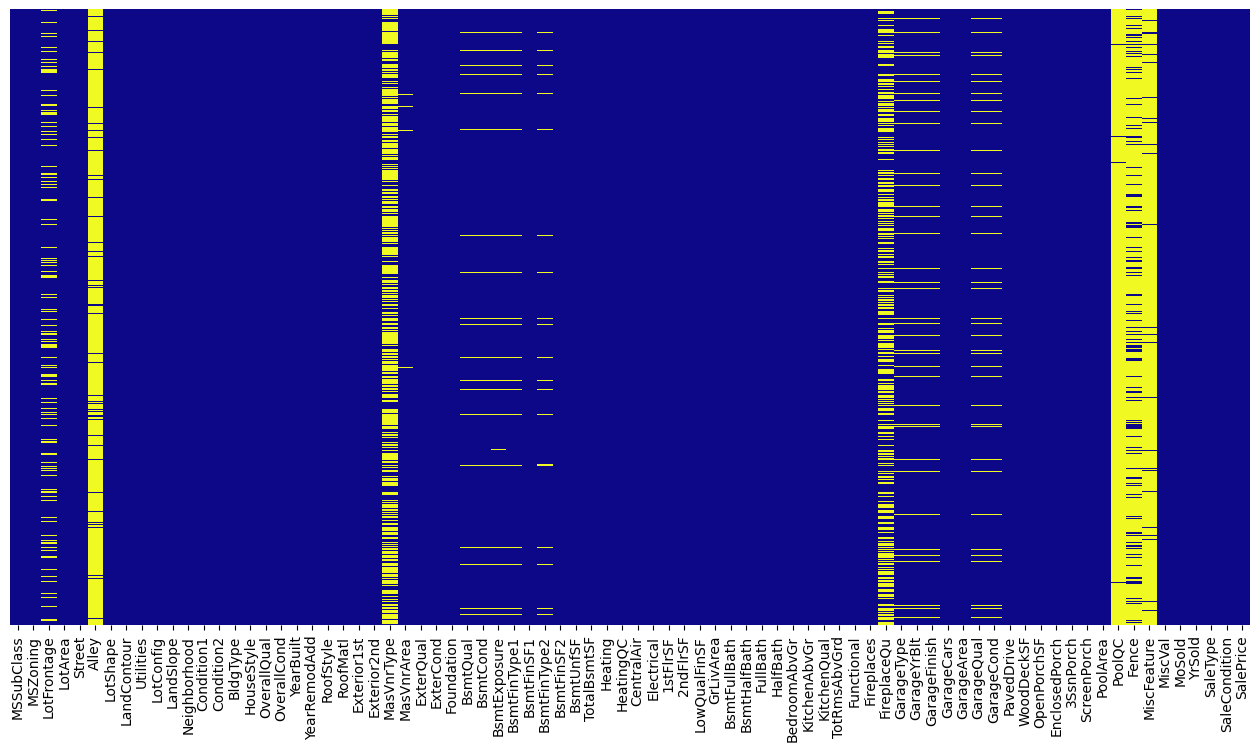

In [41]:
# Set the figure size for the heatmap
mpl.rcParams["figure.figsize"] = (16, 8)

# Create a heatmap to visually represent missing values in the DataFrame "df_train"
# Yellow lines indicate missing values (True in the heatmap), while non-missing values are represented in blue
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap="plasma");


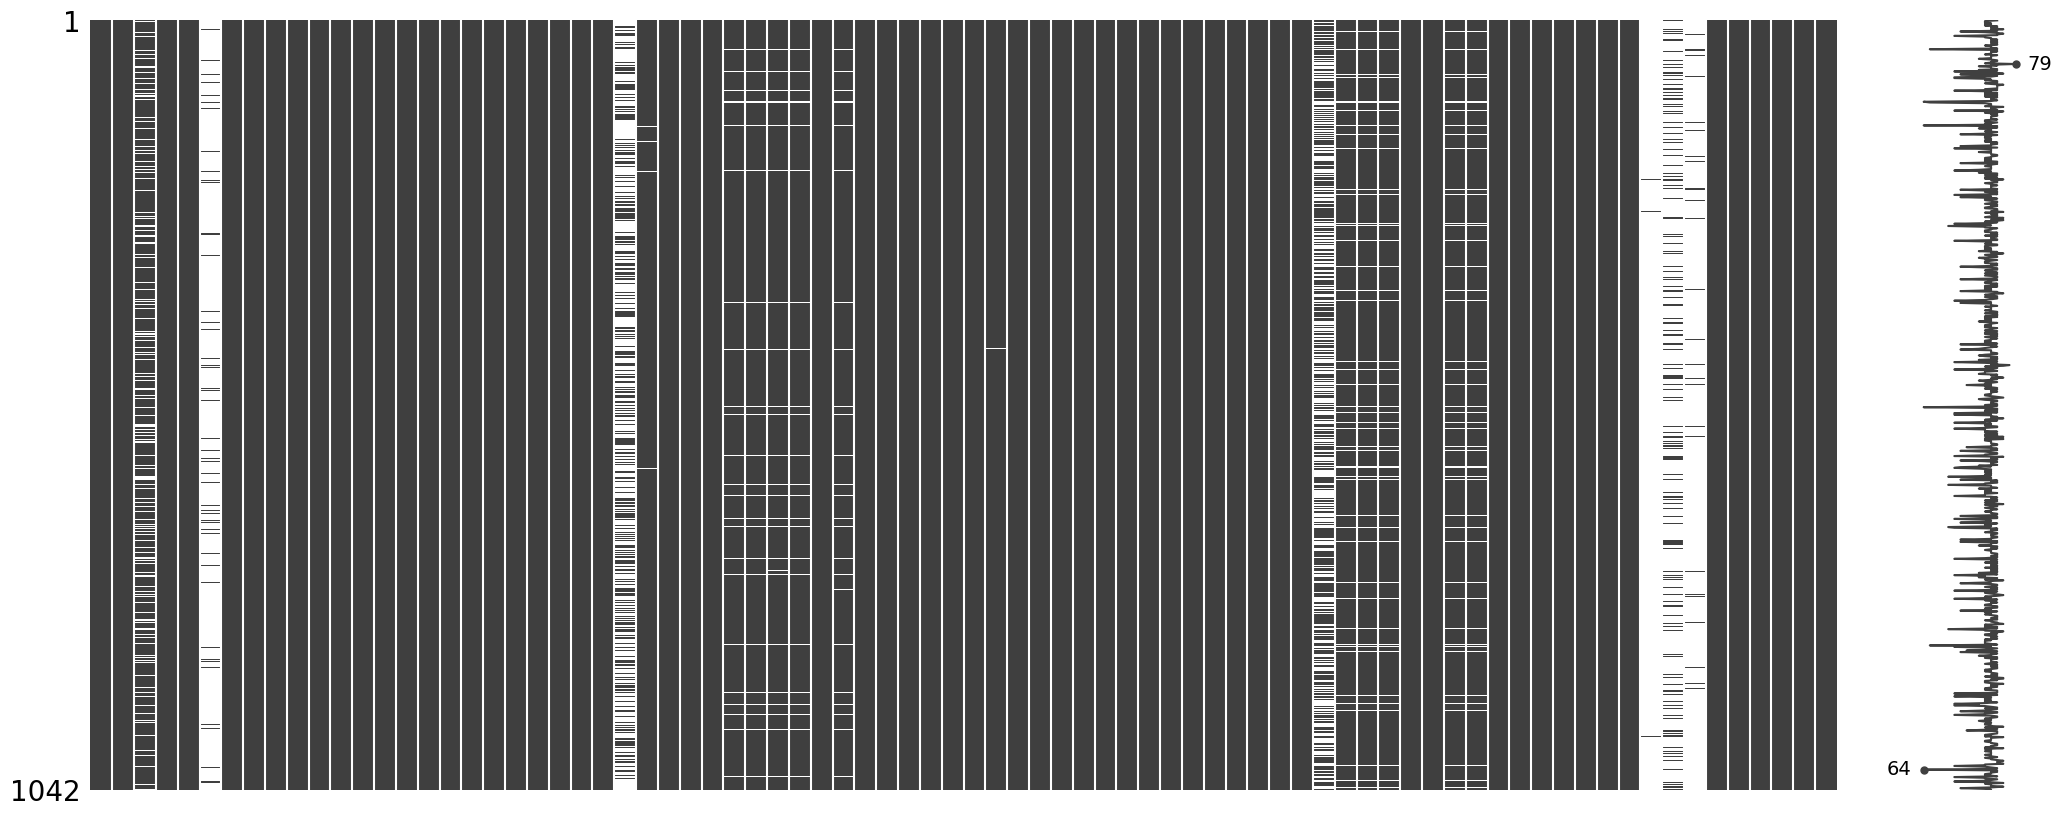

In [42]:
# Another way to observe missing values in the train dataset via matrix 
msno.matrix(df_train);

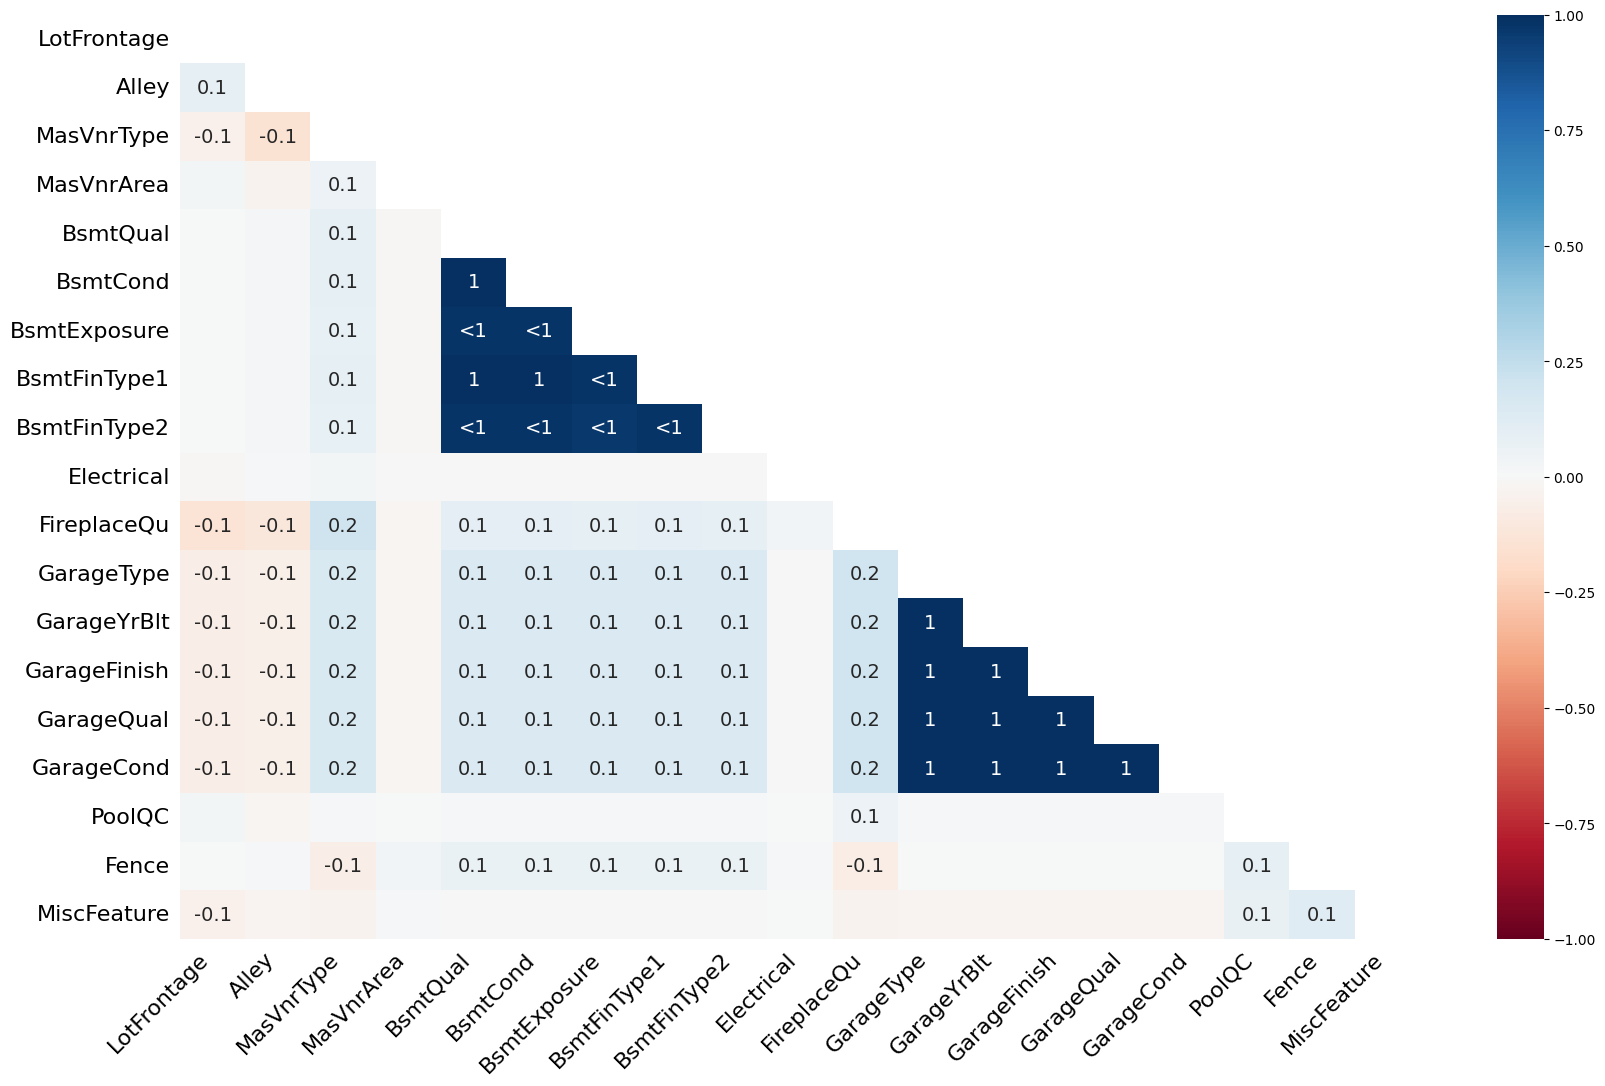

In [43]:
# Nullity Correlation
# Create a heatmap visualization of missing values in the train dataset
msno.heatmap(df_train);


According to the above heatmap, the missing values of the garage variables (GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond) are related to each other (their correlation is 1). Therefore, the absence of a garage is associated with all garage variables. The same situation applies to basement variables (BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2) (their correlation is closer to 1).

In [44]:
# Examine the mean and median values of LotFrontage (in the train dataset)
LotFrontage_mean_t = df_train["LotFrontage"].mean()
LotFrontage_median_t = df_train["LotFrontage"].median()
print("LotFrontage Mean (in the train dataset): ", LotFrontage_mean_t)
print("LotFrontage Median (in the train dataset): ", LotFrontage_median_t)

# Since the mean and median values of LotFrontage are very close to each other, 
# It does not matter which one fills in the missing values in this field.

LotFrontage Mean (in the train dataset):  69.83060747663552
LotFrontage Median (in the train dataset):  69.0


In [45]:
# Function to fill missing values in specified columns of the DataFrame "dataset"
def fill_missing_values(dataset):
    # Fill missing values some categorical columns with "NA" (Columns that do not have that feature)
    dataset["Fence"] = dataset["Fence"].fillna("NA")
    dataset["FireplaceQu"] = dataset["FireplaceQu"].fillna("NA")
    dataset["PoolQC"] = dataset["PoolQC"].fillna("NA")
    dataset["MiscFeature"] = dataset["MiscFeature"].fillna("NA")
    dataset["Alley"] = dataset["Alley"].fillna("NA")
    dataset["MasVnrType"] = dataset["MasVnrType"].fillna("NA")

    # Fill missing values in specified garage-related columns with "NA"
    garage_columns_t = ["GarageCond", "GarageType", "GarageFinish", "GarageQual"]
    for column in garage_columns_t:
        dataset[column] = dataset[column].fillna("NA")

    # Fill missing values in specified basement-related columns with "NA"
    basement_columns_t = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
    for column in basement_columns_t:
        dataset[column] = dataset[column].fillna("NA")    

    # Fill missing values in the "LotFrontage" column (continuous variable) with the median value
    Lotfrontage_series_t = dataset["LotFrontage"]
    median_value_t = Lotfrontage_series_t.median()
    dataset["LotFrontage"].fillna(median_value_t, inplace=True)

    # Fill missing values in the "Electrical" column with the mode value (only 1 value)
    dataset["Electrical"] = dataset["Electrical"].fillna(dataset["Electrical"].mode()[0])

    # Fill missing values in the "GarageYrBlt" column with 0
    dataset["GarageYrBlt"] = dataset["GarageYrBlt"].fillna(0)

    # Fill missing values in the "MasVnrArea" column with 0
    dataset["MasVnrArea"] = dataset["MasVnrArea"].fillna(0)

    # Return the DataFrame with filled missing values
    return dataset

In [46]:
df_train = fill_missing_values(df_train)

In [47]:
# Display information about missing values in the DataFrame "df_train" after the missing values have been filled.
# This step is to verify that the missing values have been successfully addressed.
missing_data(df_train, 30)

# Missing values have been filled.

               Missing Values  Missing Values Percentage  Unique Values
PavedDrive                  0                        0.0              3
WoodDeckSF                  0                        0.0            225
OpenPorchSF                 0                        0.0            177
EnclosedPorch               0                        0.0            100
3SsnPorch                   0                        0.0             19
ScreenPorch                 0                        0.0             65
PoolArea                    0                        0.0              5
PoolQC                      0                        0.0              4
Utilities                   0                        0.0              2
LotConfig                   0                        0.0              5
LandSlope                   0                        0.0              3
Neighborhood                0                        0.0             24
Condition1                  0                        0.0        

### 3.1. Normalizing Continuous Numerical Variables That Are Not Normally Distributed
Since the numerical variables are skewed, we will perform the log normal distribution

In [48]:
# Remove "SalePrice" from the list of continuous_features_t because it is the taget variable
continuous_features_t.remove("SalePrice")

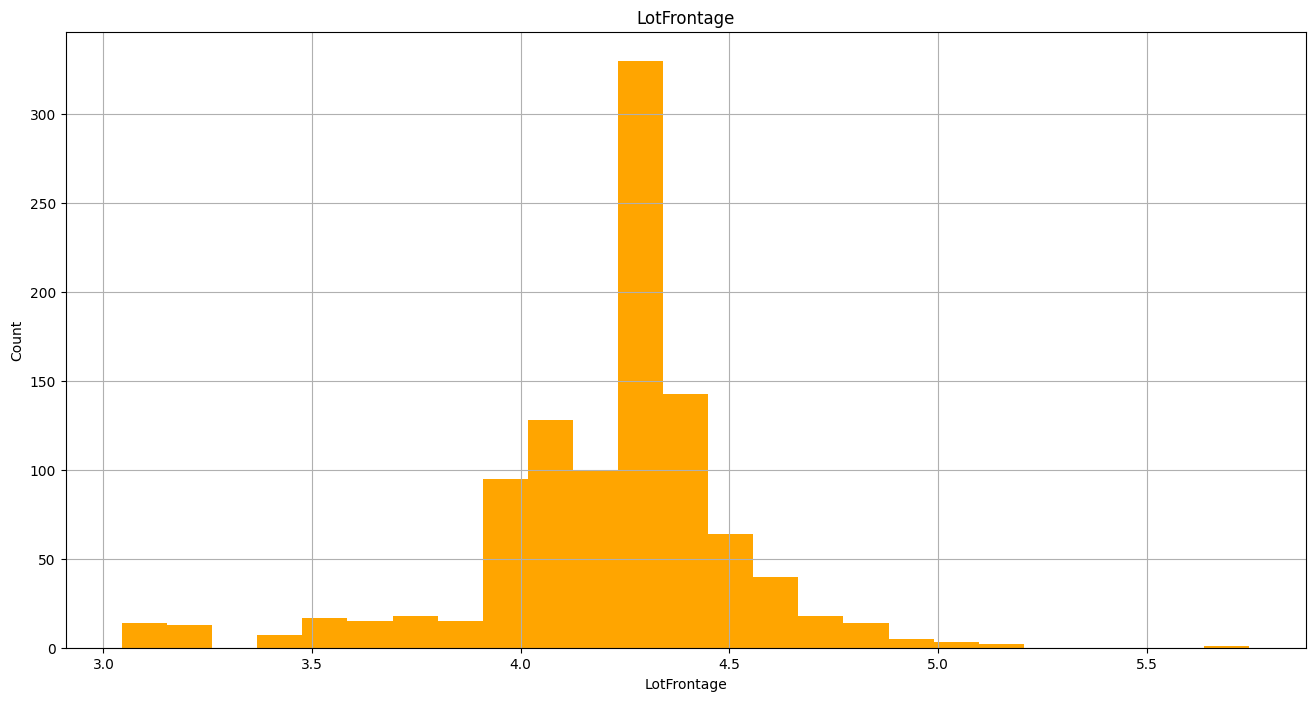

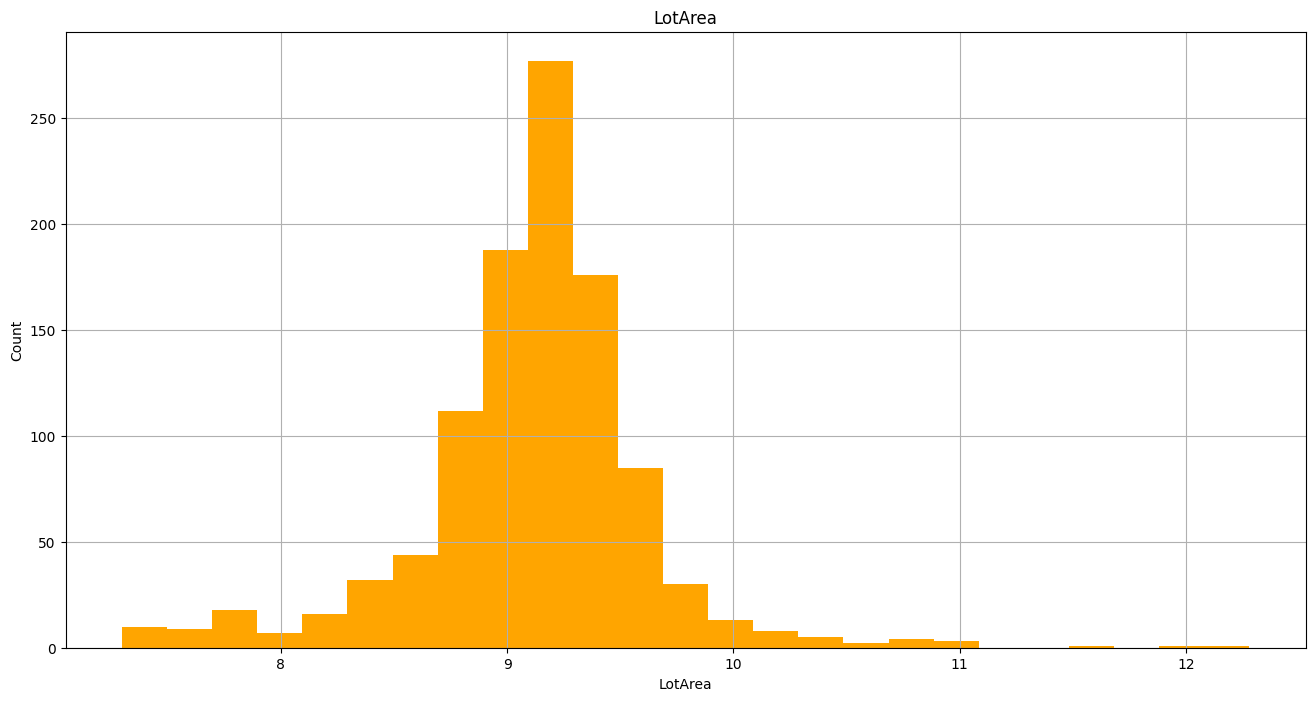

Skipped! Feature 'MasVnrArea' contains zero.
Skipped! Feature 'BsmtFinSF1' contains zero.
Skipped! Feature 'BsmtFinSF2' contains zero.
Skipped! Feature 'BsmtUnfSF' contains zero.
Skipped! Feature 'TotalBsmtSF' contains zero.


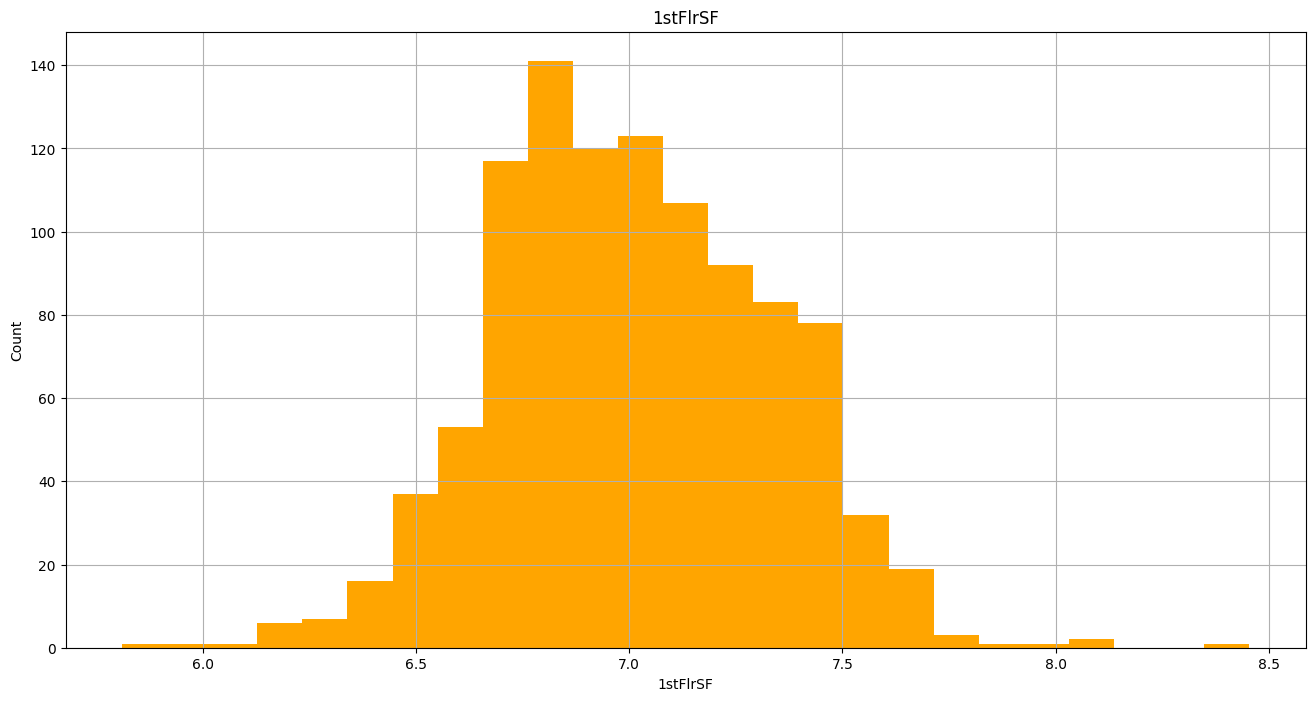

Skipped! Feature '2ndFlrSF' contains zero.
Skipped! Feature 'LowQualFinSF' contains zero.


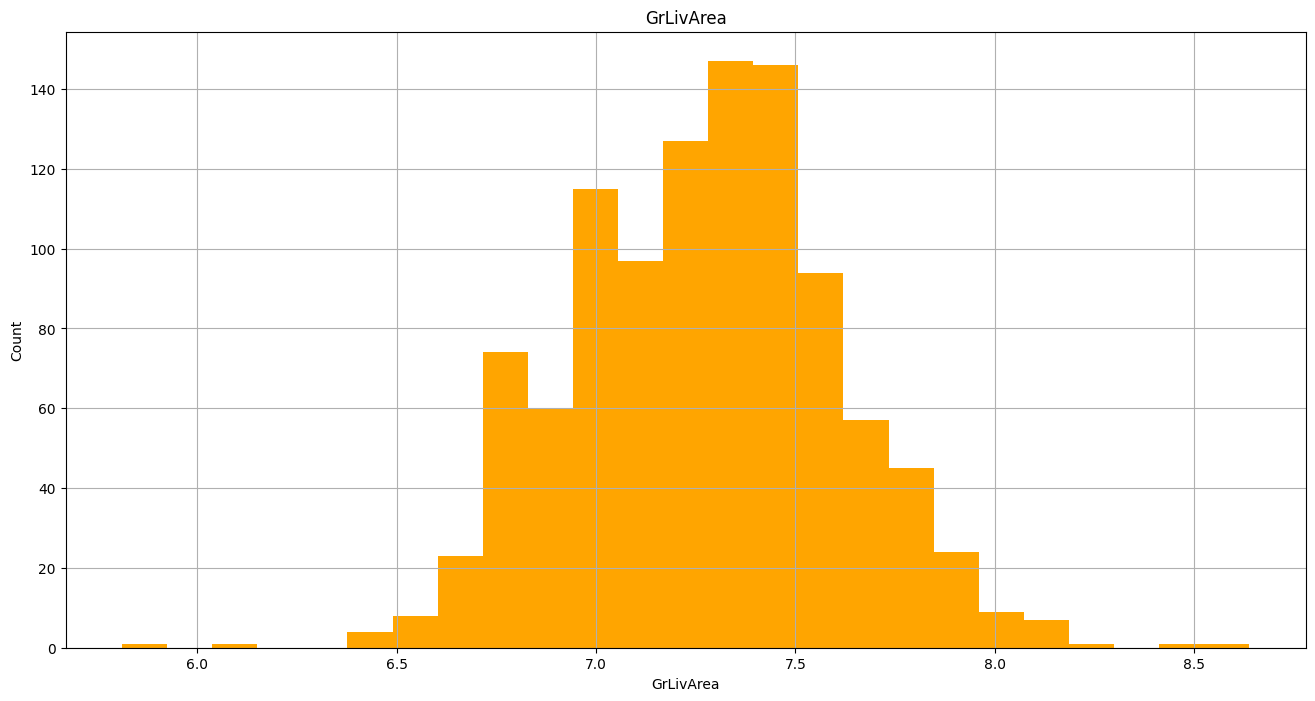

Skipped! Feature 'GarageArea' contains zero.
Skipped! Feature 'WoodDeckSF' contains zero.
Skipped! Feature 'OpenPorchSF' contains zero.
Skipped! Feature 'EnclosedPorch' contains zero.
Skipped! Feature '3SsnPorch' contains zero.
Skipped! Feature 'ScreenPorch' contains zero.
Skipped! Feature 'PoolArea' contains zero.
Skipped! Feature 'MiscVal' contains zero.


In [49]:
# For each continuous feature, apply the natural logarithm transformation if the feature contains non-zero values

for feature in continuous_features_t:
    # Create a copy of the dataset to avoid modifying the original
    df_t = df_train.copy()
    
    # Check if the feature contains zero
    if 0 in df_t[feature].unique():
        pass
        print("Skipped! Feature '{}' contains zero.".format(feature))
    else:
        # Apply the natural logarithm transformation
        df_t[feature] = np.log(df_t[feature])
        
        # Plot a histogram for the transformed feature with 25 bins
        df_t[feature].hist(bins=25, color="orange")
        
        # Set the labels for the x and y axes
        plt.xlabel(feature)
        plt.ylabel("Count")
        
        # Set the title of the plot
        plt.title(feature)
        
        # Display the histogram
        plt.show()

### 4. Handling Outliers

In [50]:
# Create a list of numerical variables § year variables § discrete variables in the train dataset
numerical_features_t = [feature for feature in df_t.columns if df_t[feature].dtypes != 'O']
year_feature_t = [feature for feature in numerical_features_t if "Yr" in feature or "Year" in feature]
discrete_features_t = [feature for feature in numerical_features_t if len(df_t[feature].unique()) < 25 and feature not in year_feature_t + ['index']]

# Print the number of numerical variables in the train dataset
print('Number of numerical variables (in the train dataset): ', len(numerical_features_t))

Number of numerical variables (in the train dataset):  36


In [51]:
# Identify continuous numerical features by excluding discrete, year-related, and 'index' variables
continuous_features_t = [feature for feature in numerical_features_t if feature not in discrete_features_t + year_feature_t + ["index"]]

# Print the count of continuous features
print("Continuous Feature Count (in the train dataset): {}".format(len(continuous_features_t)))

Continuous Feature Count (in the train dataset): 16


In [52]:
# Remove "SalePrice" from the list of continuous_features_t because it is the taget variable
continuous_features_t.remove("SalePrice")

In [53]:
continuous_features_t

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

Observe the outliers in the train dataset by drawing Box Plots:

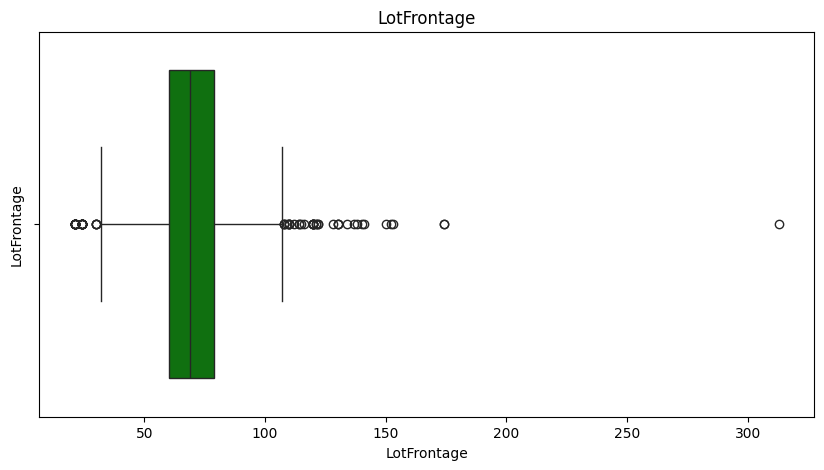

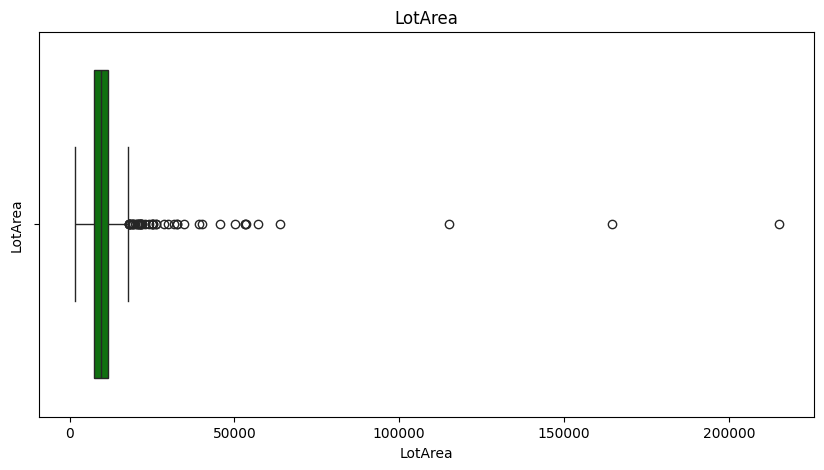

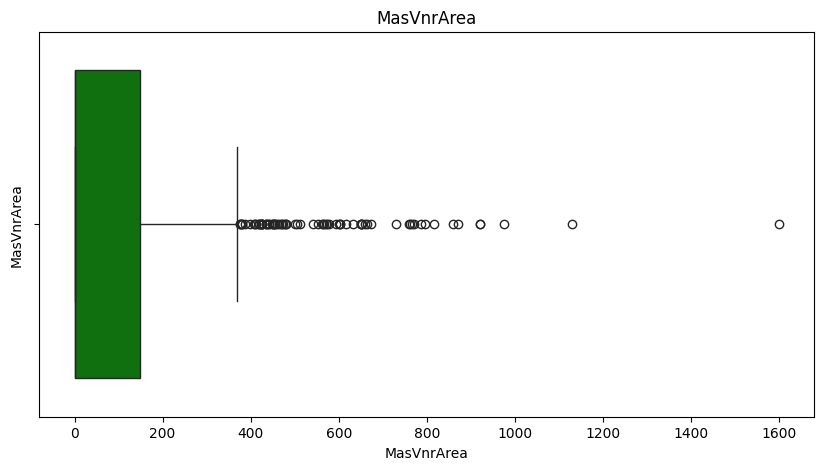

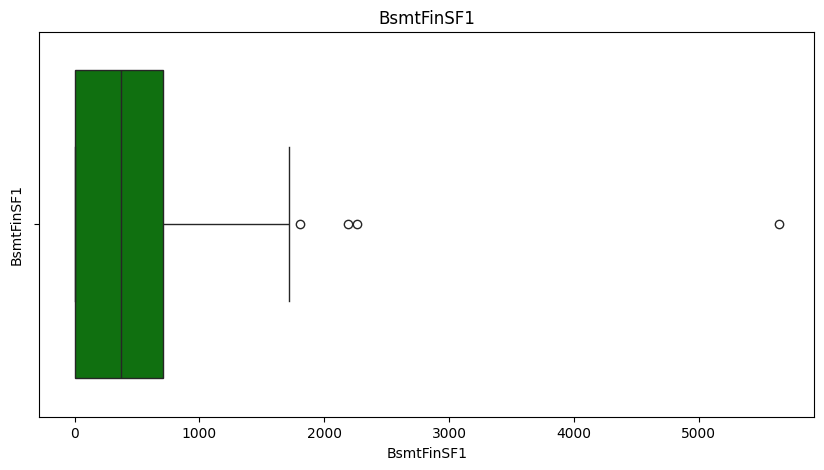

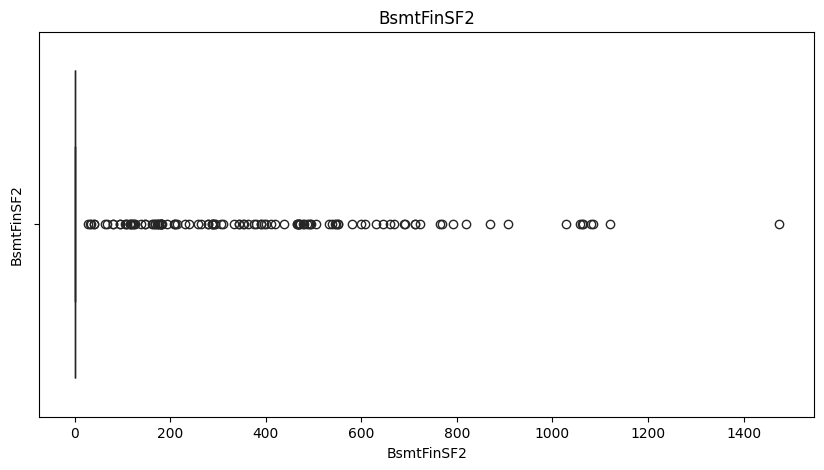

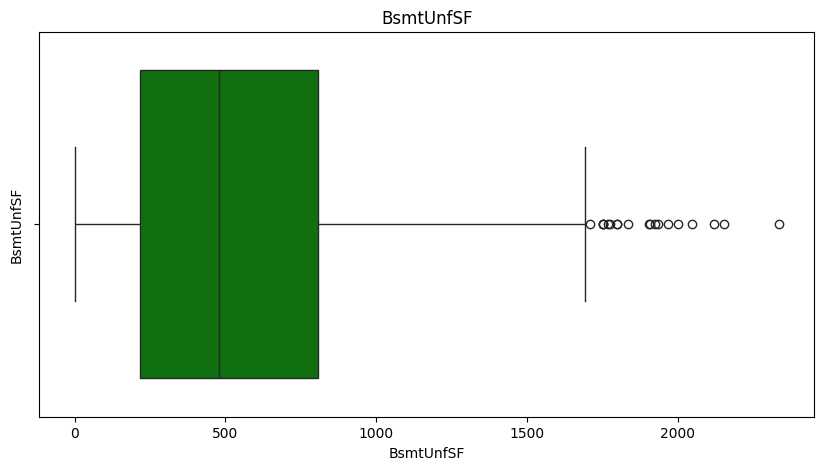

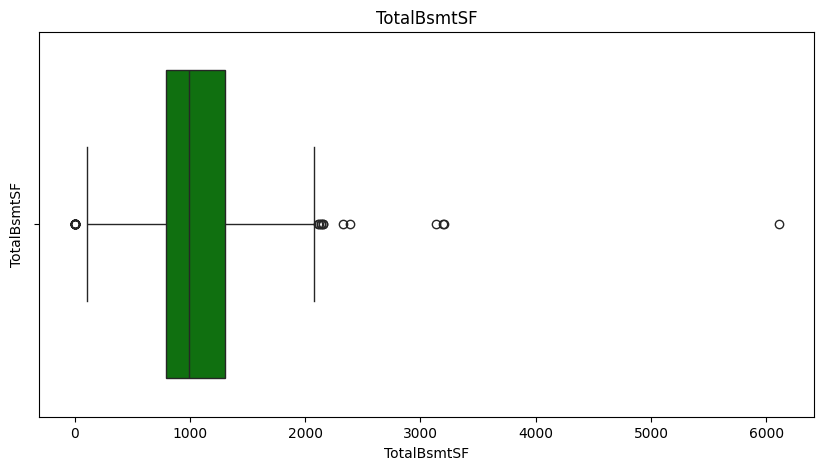

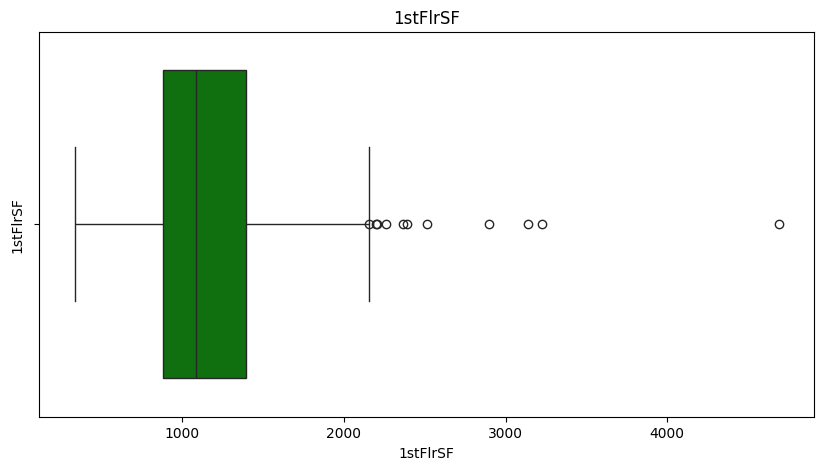

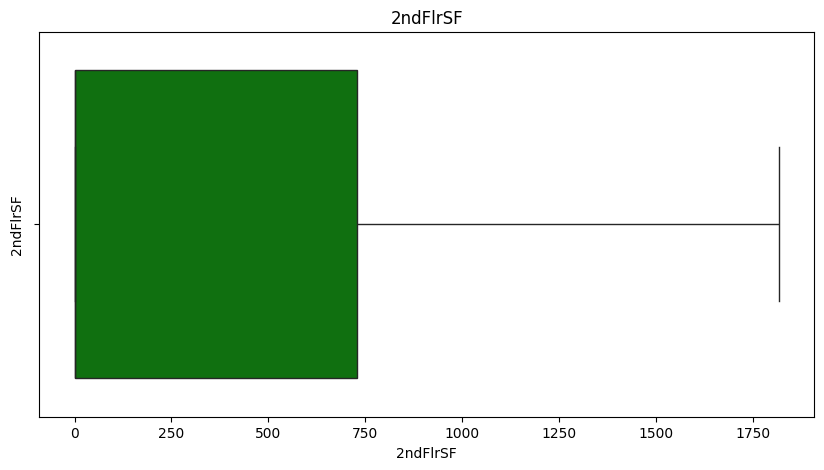

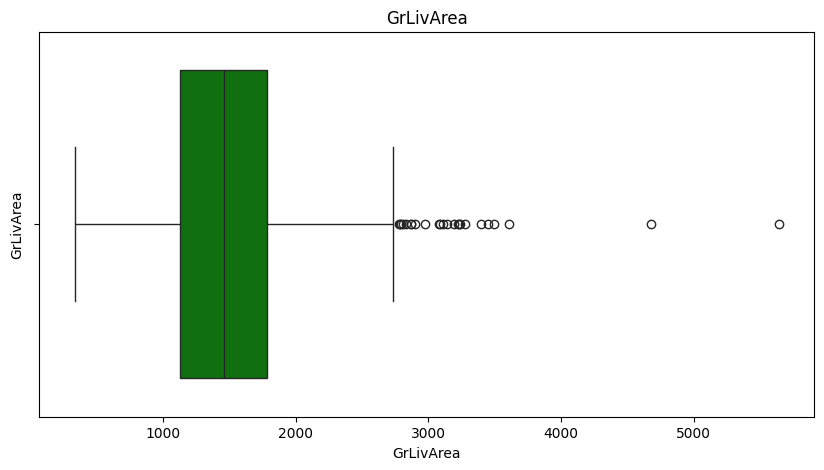

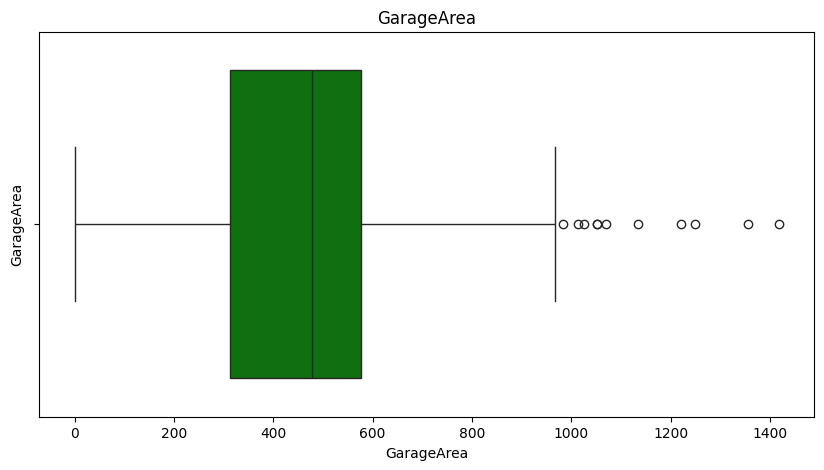

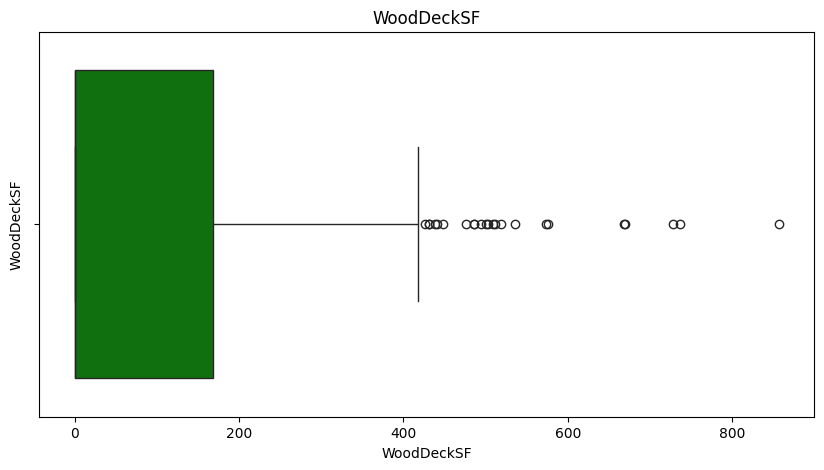

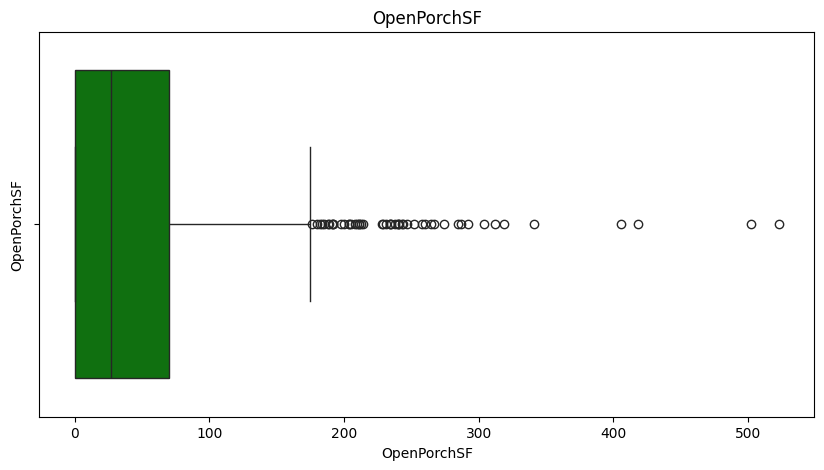

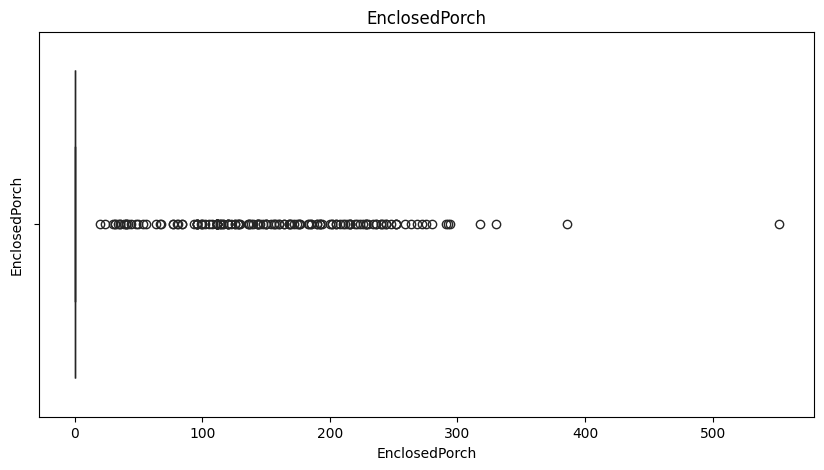

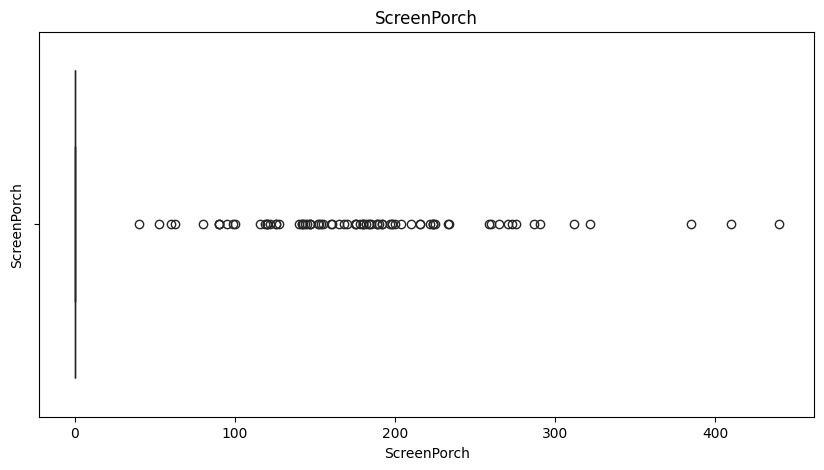

In [54]:
# Set the default figure size for plots using Matplotlib
plt.rcParams["figure.figsize"] = (10, 5)

# Iterate over each continuous feature in the list 'continuous_feature'
for feature in continuous_features_t:
    # Create a horizontal box plot (box-and-whisker plot) for the current feature
    sns.boxplot(df_t[feature], orient='h', color="green")
    
    # Set the y-axis label to the name of the current feature
    plt.ylabel(feature)
    
    # Set the title of the plot to the name of the current feature
    plt.title(feature)
    
    # Display the plot
    plt.show()


Cap the outliers in the train dataset via min-max method:

In [55]:
# For each continuous numerical variable in the train dataset
for column in continuous_features_t:
    # Calculate the lower and upper limits (e.g., 5th and 95th percentiles)
    q1 = df_t[column].quantile(0.25)
    q3 = df_t[column].quantile(0.75)

    IQR = q3 - q1

    lower_limit = q1 - 1.5*IQR
    upper_limit = q3 + 1.5*IQR

    # Print(column, lower_limit, upper_limit)

    # Cap values below the lower limit to the lower limit
    df_t[column] = df_t[column].apply(lambda x: lower_limit if x < lower_limit else x)
    
    # Cap values above the upper limit to the upper limit
    df_t[column] = df_t[column].apply(lambda x: upper_limit if x > upper_limit else x)

# Show the results
df_t[continuous_features_t].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,65.0,7804.0,0.0,622.0,0.0,500.0,1122.0,1328.0,653,1981.0,576.0,420.0,44.0,0.0,0.0
1,107.5,10859.0,0.0,0.0,0.0,1097.0,1097.0,1097.0,0,1097.0,672.0,392.0,64.0,0.0,0.0
2,69.0,12394.0,0.0,0.0,0.0,847.0,847.0,847.0,886,1733.0,433.0,100.0,48.0,0.0,0.0
3,60.0,7500.0,0.0,0.0,0.0,698.0,698.0,698.0,430,1128.0,528.0,30.0,0.0,0.0,0.0
4,41.0,12393.0,0.0,0.0,0.0,847.0,847.0,847.0,1101,1948.0,434.0,100.0,48.0,0.0,0.0


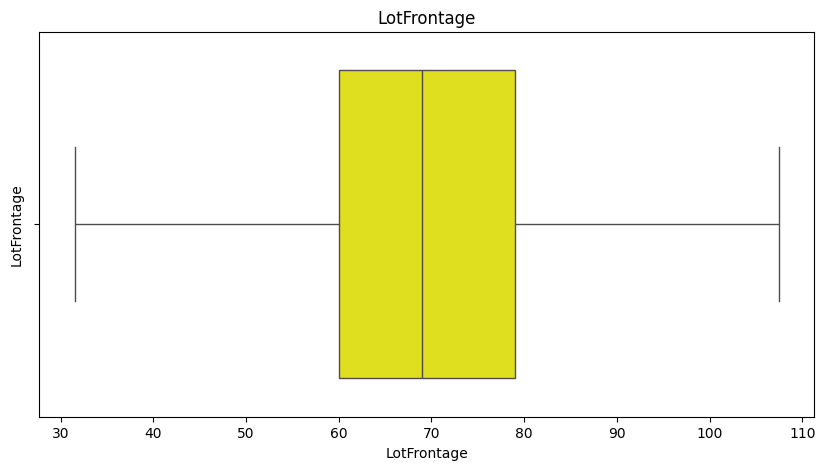

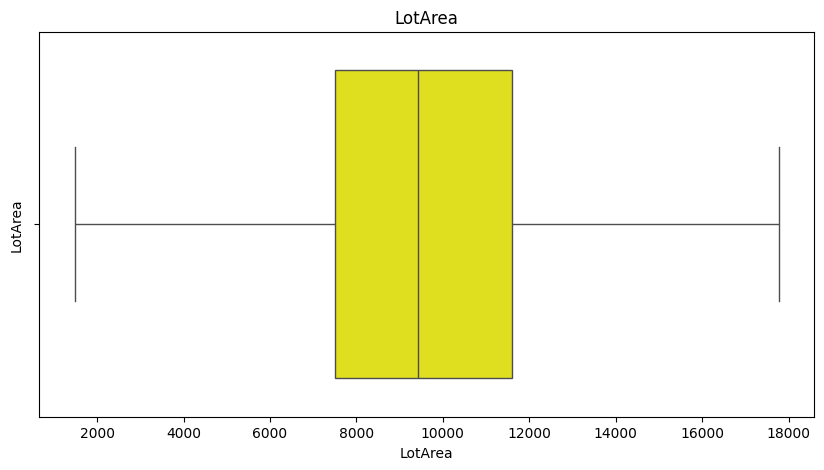

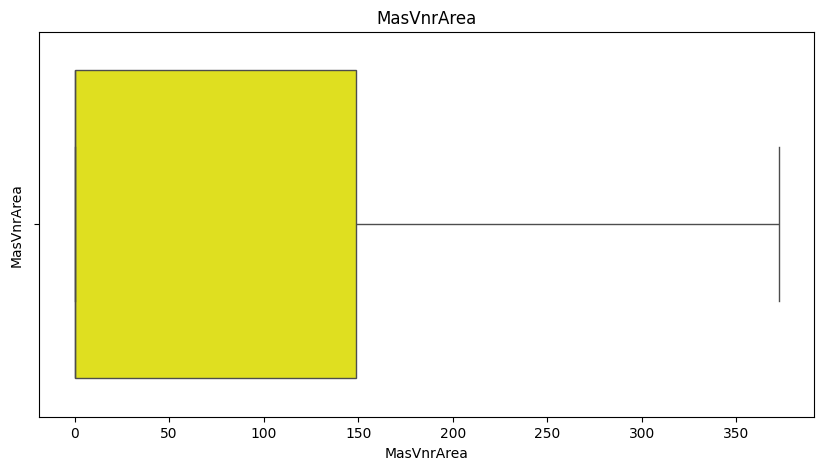

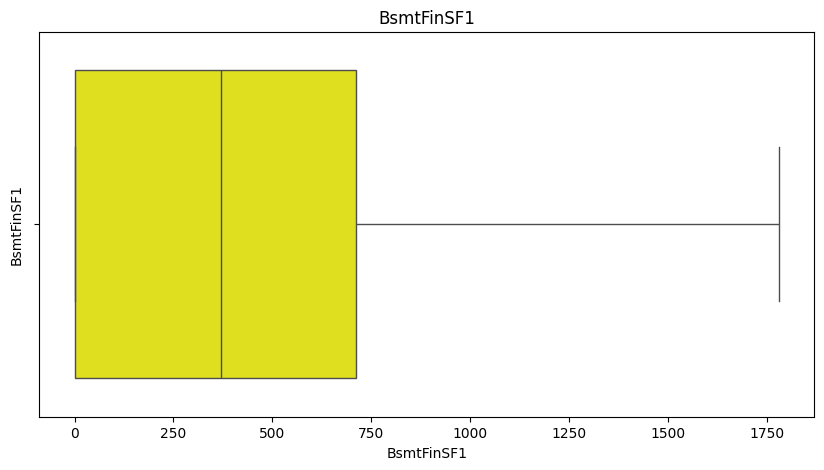

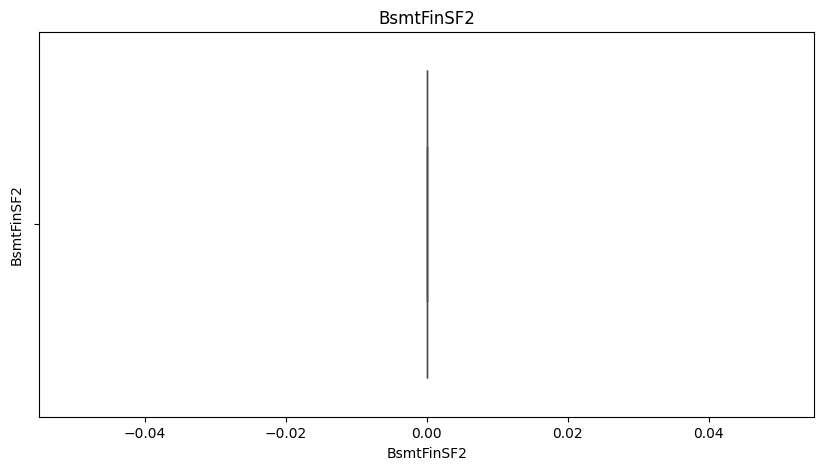

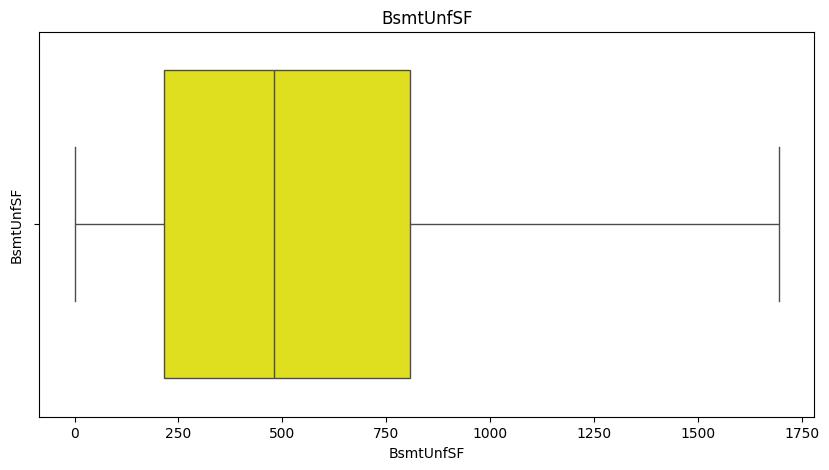

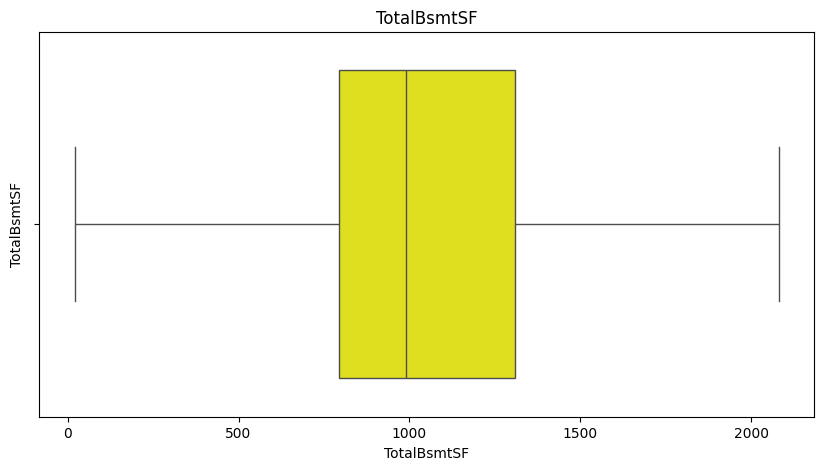

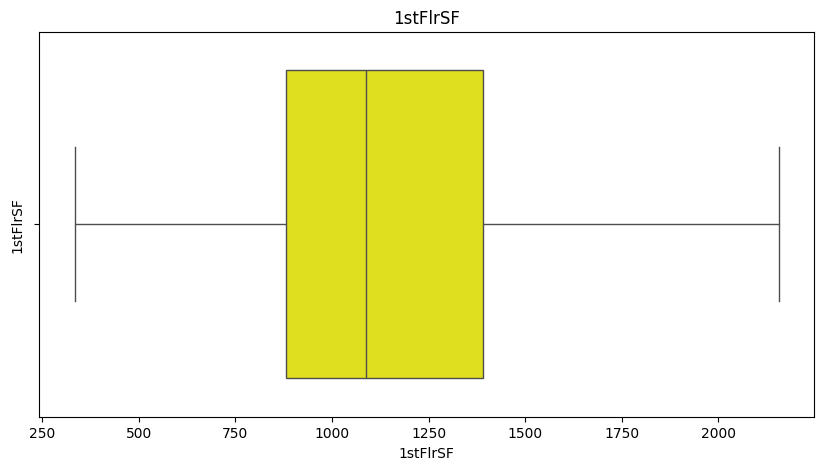

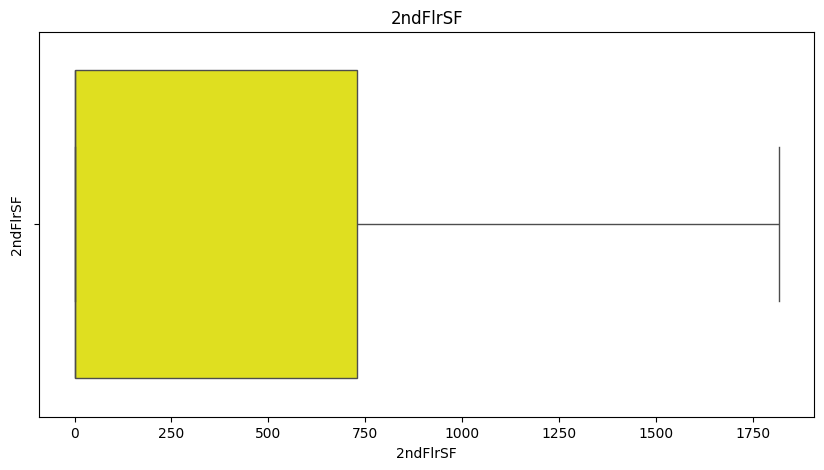

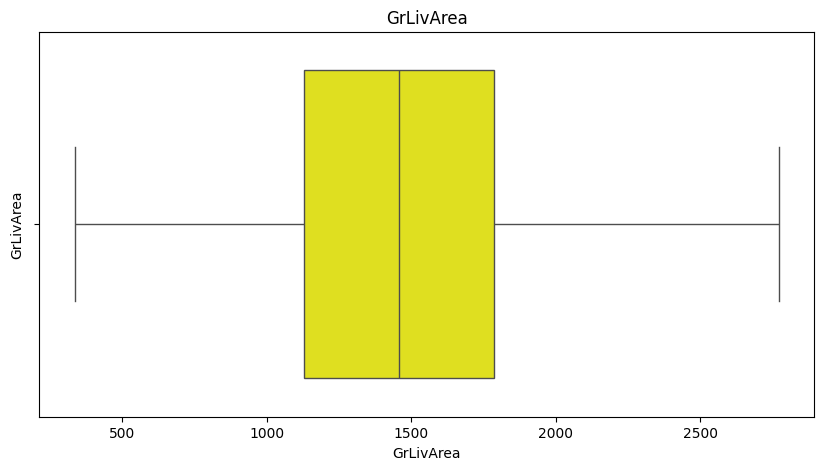

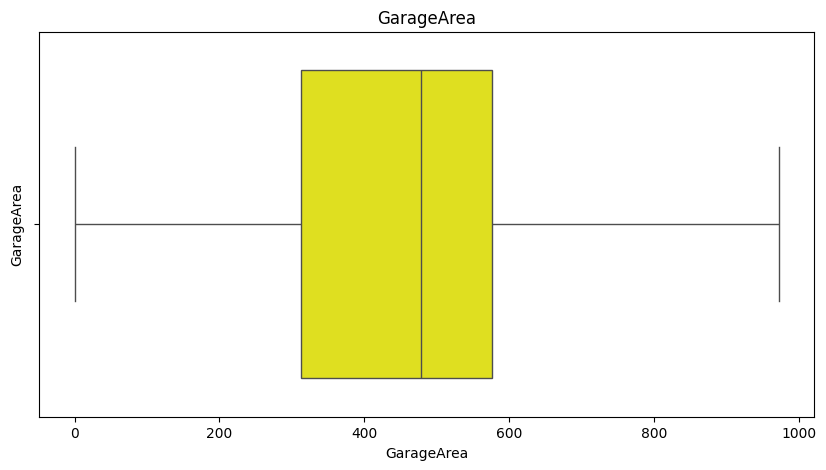

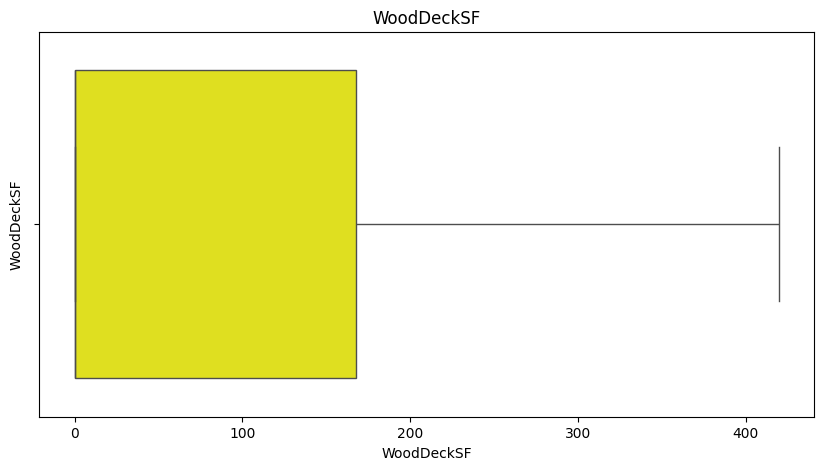

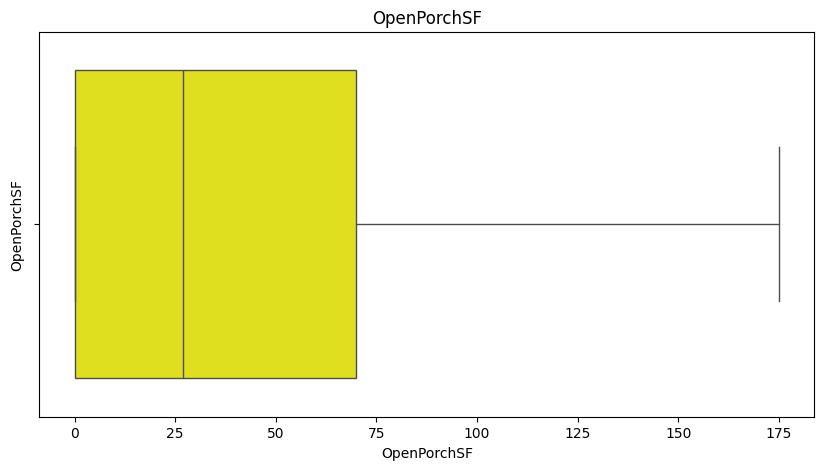

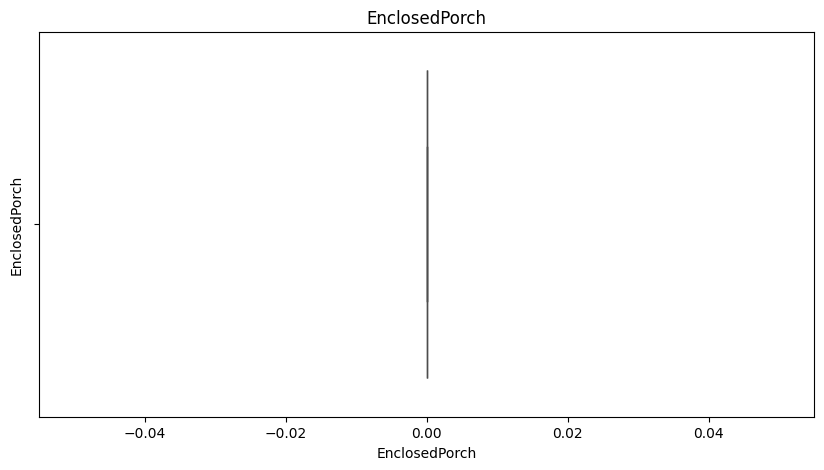

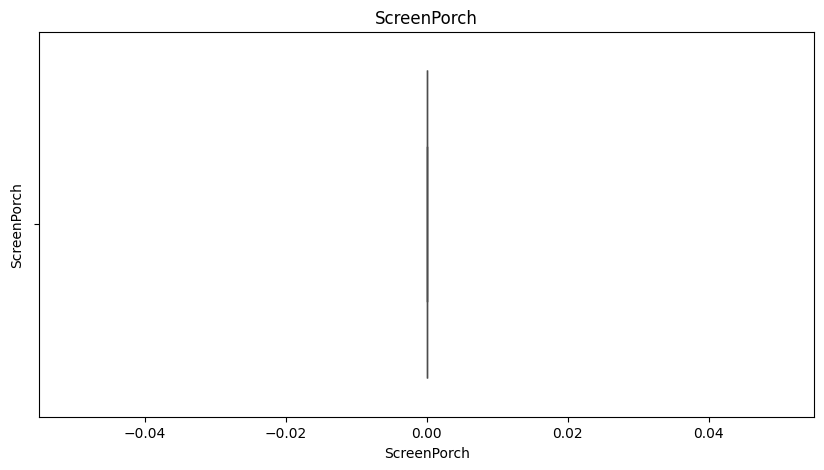

In [56]:
# Observe outliers after capping
# Set the default figure size for plots using Matplotlib
plt.rcParams["figure.figsize"] = (10, 5)

# Iterate over each continuous feature in the list 'continuous_features_t'
for feature in continuous_features_t:
    # Define the color you want to use for the box plot
    boxplot_color = 'yellow'  # Change this to the desired color
    
    # Create a horizontal box plot (box-and-whisker plot) for the current feature with the specified color
    sns.boxplot(df_t[feature], orient='h', color=boxplot_color)
    
    # Set the y-axis label to the name of the current feature
    plt.ylabel(feature)
    
    # Set the title of the plot to the name of the current feature
    plt.title(feature)
    
    # Display the plot
    plt.show()

### 5. Encoding Categorical Variables

In [57]:
# Use len to get the number of categorical features
len(categorical_features_t)

44

In [58]:
df_t[categorical_features_t].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,50,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,WdShing,Plywood,NA,TA,TA,BrkTil,TA,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,Gd,Min2,TA,Detchd,Unf,TA,TA,Y,NA,MnPrv,NA,WD,Normal
1,20,RL,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,NA,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NA,Attchd,Unf,TA,TA,Y,NA,NA,NA,WD,Normal
2,60,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NA,Gd,TA,PConc,Gd,TA,Gd,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,NA,NA,NA,WD,Family
3,50,C (all),Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,NA,TA,Gd,CBlock,TA,TA,No,Unf,Unf,GasA,TA,Y,FuseA,TA,Typ,NA,Detchd,RFn,TA,TA,Y,NA,NA,NA,COD,Abnorml
4,60,RL,Pave,NA,IR2,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NA,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,NA,NA,NA,WD,Normal


0-1 Encoding:

In [59]:
# 'Street' 0-1 Encoding
#Since the 'Street' variable has 2 categories (Gravel and Pave),  0-1 transformation was used.
lbe = LabelEncoder()
lbe.fit_transform(df_t["Street"])
df_t["new_Street"] = lbe.fit_transform(df_t["Street"])

In [60]:
# 'CentralAir' 0-1 Encoding
lbe = LabelEncoder() 
lbe.fit_transform(df_t["CentralAir"])
df_t["new_CentralAir"] = lbe.fit_transform(df_t["CentralAir"])

In [61]:
df_t.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,new_Street,new_CentralAir
0,50,RL,65.0,7804.0,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,4,3,1928,1950,Gable,CompShg,WdShing,Plywood,NA,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,622.0,Unf,0.0,500.0,1122.0,GasA,TA,Y,SBrkr,1328.0,653,0,1981.0,1,0,2,0,4,1,Gd,7,Min2,2,TA,Detchd,1981.0,Unf,2,576.0,TA,TA,Y,420.0,44.0,0.0,0,0.0,0,NA,MnPrv,NA,0,12,2009,WD,Normal,135000,1,1
1,20,RL,107.5,10859.0,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1097.0,1097.0,GasA,Ex,Y,SBrkr,1097.0,0,0,1097.0,0,0,1,1,3,1,TA,6,Typ,0,NA,Attchd,1995.0,Unf,2,672.0,TA,TA,Y,392.0,64.0,0.0,0,0.0,0,NA,NA,NA,0,6,2009,WD,Normal,145000,1,1
2,60,RL,69.0,12394.0,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NA,0.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0.0,Unf,0.0,847.0,847.0,GasA,Ex,Y,SBrkr,847.0,886,0,1733.0,0,0,2,1,3,1,Gd,7,Typ,1,Gd,BuiltIn,2003.0,Fin,2,433.0,TA,TA,Y,100.0,48.0,0.0,0,0.0,0,NA,NA,NA,0,10,2007,WD,Family,225000,1,1
3,50,C (all),60.0,7500.0,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,4,1920,1950,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,698.0,698.0,GasA,TA,Y,FuseA,698.0,430,0,1128.0,0,0,1,0,2,1,TA,6,Typ,0,NA,Detchd,1980.0,RFn,2,528.0,TA,TA,Y,30.0,0.0,0.0,0,0.0,0,NA,NA,NA,0,4,2010,COD,Abnorml,68400,1,1
4,60,RL,41.0,12393.0,Pave,NA,IR2,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,NA,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,847.0,847.0,GasA,Ex,Y,SBrkr,847.0,1101,0,1948.0,0,0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2004.0,Fin,2,434.0,TA,TA,Y,100.0,48.0,0.0,0,0.0,0,NA,NA,NA,0,9,2006,WD,Normal,195000,1,1


Ordinal Encoding:

In ordinal encoding method, all features that contains NA are started from 0.

In [62]:
# 'LotShape' Ordinal Encoding
ordinal_mapping = {"IR3": 1, "IR2": 2, "IR1": 3, "Reg": 4}
df_t["new_LotShape"] = df_t["LotShape"].map(ordinal_mapping)

In [63]:
# 'LandContour' Ordinal Encoding
ordinal_mapping = {"Low": 1, "HLS": 2, "Bnk": 3, "Lvl": 4}
df_t["new_LandContour"] = df_t["LandContour"].map(ordinal_mapping)

In [64]:
# 'LandSlope' Ordinal Encoding
ordinal_mapping = {"Gtl": 1, "Mod": 2, "Sev": 3}
df_t["new_LandSlope"] = df_t["LandSlope"].map(ordinal_mapping)

In [65]:
# 'ExterQual' Ordinal Encoding
ordinal_mapping = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df_t["new_ExterQual"] = df_t["ExterQual"].map(ordinal_mapping)

In [66]:
# 'ExterCond' Ordinal Encoding
ordinal_mapping = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df_t["new_ExterCond"] = df_t["ExterCond"].map(ordinal_mapping)

In [67]:
# 'BsmtQual' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df_t["new_BsmtQual"] = df_t["BsmtQual"].map(ordinal_mapping)

In [68]:
# 'BsmtCond' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df_t["new_BsmtCond"] = df_t["BsmtCond"].map(ordinal_mapping)

In [69]:
# 'BsmtExposure' Ordinal Encoding
ordinal_mapping = {"NA": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}
df_t["new_BsmtExposure"] = df_t["BsmtExposure"].map(ordinal_mapping)

In [70]:
# 'BsmtFinType1' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
df_t["new_BsmtFinType1"] = df_t["BsmtFinType1"].map(ordinal_mapping)

In [71]:
# 'BsmtFinType2' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
df_t["new_BsmtFinType2"] = df_t["BsmtFinType2"].map(ordinal_mapping)

In [72]:
# 'HeatingQC' Ordinal Encoding
ordinal_mapping = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df_t["new_HeatingQC"] = df_t["HeatingQC"].map(ordinal_mapping)

In [73]:
# 'KitchenQual' Ordinal Encoding
ordinal_mapping = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df_t["new_KitchenQual"] = df_t["KitchenQual"].map(ordinal_mapping)

In [74]:
# 'Functional' Ordinal Encoding
ordinal_mapping = {"Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 7}
df_t["new_Functional"] = df_t["Functional"].map(ordinal_mapping)

In [75]:
# 'FireplaceQu' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df_t["new_FireplaceQu"] = df_t["FireplaceQu"].map(ordinal_mapping)

In [76]:
# 'GarageFinish' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Unf": 1, "RFn": 2, "Fin": 3}
df_t["new_GarageFinish"] = df_t["GarageFinish"].map(ordinal_mapping)

In [77]:
# 'GarageQual' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df_t["new_GarageQual"] = df_t["GarageQual"].map(ordinal_mapping)

In [78]:
# 'GarageCond' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df_t["new_GarageCond"] = df_t["GarageCond"].map(ordinal_mapping)

In [79]:
# 'PavedDrive' Ordinal Encoding
ordinal_mapping = {"N": 1, "P": 2, "Y": 3}
df_t["new_PavedDrive"] = df_t["PavedDrive"].map(ordinal_mapping)

In [80]:
# 'PoolQC' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}
df_t["new_PoolQC"] = df_t["PoolQC"].map(ordinal_mapping)

In [81]:
# 'Utilities' Ordinal Encoding
ordinal_mapping = {"ELO": 1, "NoSeWa": 2, "NoSewr": 3, "AllPub": 4}
df_t["new_Utilities"] = df_t["Utilities"].map(ordinal_mapping)

Label Encoding:

In [82]:
def label_encode_columns(dataset, columns):
    le = LabelEncoder()

    for column in columns:
        dataset[f"new_{column}"] = le.fit_transform(dataset[column])

label_encode_columns(df_t, ["Fence", "MSSubClass", "MSZoning", "Alley", "LotConfig", "Neighborhood",
            "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", 
            "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation",
            "Heating", "Electrical", "GarageType", "MiscFeature", "SaleType", "SaleCondition"])


In [83]:
df_t.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,new_Street,new_CentralAir,new_LotShape,new_LandContour,new_LandSlope,new_ExterQual,new_ExterCond,new_BsmtQual,new_BsmtCond,new_BsmtExposure,new_BsmtFinType1,new_BsmtFinType2,new_HeatingQC,new_KitchenQual,new_Functional,new_FireplaceQu,new_GarageFinish,new_GarageQual,new_GarageCond,new_PavedDrive,new_PoolQC,new_Utilities,new_Fence,new_MSSubClass,new_MSZoning,new_Alley,new_LotConfig,new_Neighborhood,new_Condition1,new_Condition2,new_BldgType,new_HouseStyle,new_RoofStyle,new_RoofMatl,new_Exterior1st,new_Exterior2nd,new_MasVnrType,new_Foundation,new_Heating,new_Electrical,new_GarageType,new_MiscFeature,new_SaleType,new_SaleCondition
0,50,RL,65.0,7804.0,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,4,3,1928,1950,Gable,CompShg,WdShing,Plywood,NA,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,622.0,Unf,0.0,500.0,1122.0,GasA,TA,Y,SBrkr,1328.0,653,0,1981.0,1,0,2,0,4,1,Gd,7,Min2,2,TA,Detchd,1981.0,Unf,2,576.0,TA,TA,Y,420.0,44.0,0.0,0,0.0,0,NA,MnPrv,NA,0,12,2009,WD,Normal,135000,1,1,4,4,1,3,3,3,3,1,4,1,3,4,6,3,1,3,3,3,0,4,2,8,3,1,4,17,2,1,0,0,1,1,13,9,2,0,1,4,5,1,8,4
1,20,RL,107.5,10859.0,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1097.0,1097.0,GasA,Ex,Y,SBrkr,1097.0,0,0,1097.0,0,0,1,1,3,1,TA,6,Typ,0,NA,Attchd,1995.0,Unf,2,672.0,TA,TA,Y,392.0,64.0,0.0,0,0.0,0,NA,NA,NA,0,6,2009,WD,Normal,145000,1,1,4,4,1,3,3,4,3,1,1,1,5,3,7,0,1,3,3,3,0,4,4,4,3,1,0,4,2,1,0,2,1,1,11,12,2,2,1,4,1,1,8,4
2,60,RL,69.0,12394.0,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NA,0.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0.0,Unf,0.0,847.0,847.0,GasA,Ex,Y,SBrkr,847.0,886,0,1733.0,0,0,2,1,3,1,Gd,7,Typ,1,Gd,BuiltIn,2003.0,Fin,2,433.0,TA,TA,Y,100.0,48.0,0.0,0,0.0,0,NA,NA,NA,0,10,2007,WD,Family,225000,1,1,3,4,1,4,3,4,3,4,1,1,5,4,7,4,3,3,3,3,0,4,4,9,3,1,0,7,2,1,0,5,1,1,11,12,2,2,1,4,3,1,8,3
3,50,C (all),60.0,7500.0,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,4,1920,1950,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,698.0,698.0,GasA,TA,Y,FuseA,698.0,430,0,1128.0,0,0,1,0,2,1,TA,6,Typ,0,NA,Detchd,1980.0,RFn,2,528.0,TA,TA,Y,30.0,0.0,0.0,0,0.0,0,NA,NA,NA,0,4,2010,COD,Abnorml,68400,1,1,4,4,1,3,4,3,3,1,1,1,3,3,7,0,2,3,3,3,0,4,4,8,0,1,4,8,2,1,0,0,1,1,7,7,2,1,1,0,5,1,0,0
4,60,RL,41.0,12393.0,Pave,NA,IR2,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,NA,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,847.0,847.0,GasA,Ex,Y,SBrkr,847.0,1101,0,1948.0,0,0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2004.0,Fin,2,434.0,TA,TA,Y,100.0,48.0,0.0,0,0.0,0,NA,NA,NA,0,9,2006,WD,Normal,195000,1,1,2,4,1,4,3,4,3,1,1,1,5,4,7,4,3,3,3,3,0,4,4,9,3,1,2,4,2,1,0,5,1,1,11,12,2,2,1,4,3,1,8,4


In [84]:
# Print the shape of the dataset, which represents the number of rows and columns
print(df_t.shape)

# Observe that 44 new columns have been added

(1042, 124)


In [85]:
# 'GarageQual','GarageCond'

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Garage


# 'ExterQual','ExterCond','HeatingQC','KitchenQual'

#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor

# 'PoolQC'

#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        NA	No Pool

# 'BsmtQual','BsmtCond'

#        Ex	Excellent (100+ inches)	
#        Gd	Good (90-99 inches)
#        TA	Typical (80-89 inches)
#        Fa	Fair (70-79 inches)
#        Po	Poor (<70 inches
#        NA	No Basement

# 'FireplaceQu'

#        Ex	Excellent - Exceptional Masonry Fireplace
#        Gd	Good - Masonry Fireplace in main level
#        TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#        Fa	Fair - Prefabricated Fireplace in basement
#        Po	Poor - Ben Franklin Stove
#        NA	No Fireplace

# 'PavedDrive'

#     Y	Paved 
#     P	Partial Pavement
#     N	Dirt/Gravel

# 'LandSlope'

#        Gtl	Gentle slope
#        Mod	Moderate Slope	
#        Sev	Severe Slope



# 'BsmtFinType1','BsmtFinType2'

#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement

# 'BsmtExposure'

#        Gd	Good Exposure
#        Av	Average Exposure (split levels or foyers typically score average or above)	
#        Mn	Mimimum Exposure
#        No	No Exposure
#        NA	No Basement


# 'Fence'

#        GdPrv	Good Privacy
#        MnPrv	Minimum Privacy
#        GdWo	Good Wood
#        MnWw	Minimum Wood/Wire
#        NA	No Fence

# 'LotShape'

#       Reg	Regular	
#        IR1	Slightly irregular
#        IR2	Moderately Irregular
#        IR3	Irregular

# 'LandContour'

#        Lvl	Near Flat/Level	
#        Bnk	Banked - Quick and significant rise from street grade to building
#        HLS	Hillside - Significant slope from side to side
#        Low	Depression

# 'Utilities'

#        AllPub	All public Utilities (E,G,W,& S)	
#        NoSewr	Electricity, Gas, and Water (Septic Tank)
#        NoSeWa	Electricity and Gas Only
#        ELO	Electricity only


# 'GarageFinish'

#        Fin	Finished
#        RFn	Rough Finished	
#        Unf	Unfinished
#        NA	No Garage
    

# 'MSSubClass','MSZoning','LotConfig','Neighborhood', 'Condition1', 'CentralAir', 'Alley',
#                   'Condition2', 'GarageType','Functional','SaleCondition','SaleType','Electrical' , 'Street',
#                   'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd', 'BldgType',
#                   'MasVnrType','Foundation','Heating','MiscFeature'

### 6. Exploring Distribution Situations (Skewness & Kurtosis)

BsmtFinSF2, EnclosedPorch, ScreenPorch these columns output nan values. Therefore, Skewness and Kurtosis will not be applied.

In [86]:
# Remove "BsmtFinSF2" from the list
continuous_features_t.remove("BsmtFinSF2")

# Remove "EnclosedPorch" from the list
continuous_features_t.remove("EnclosedPorch")

# Remove "ScreenPorch" from the list
continuous_features_t.remove("ScreenPorch")

# The updated list of continuous features
continuous_features_t

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

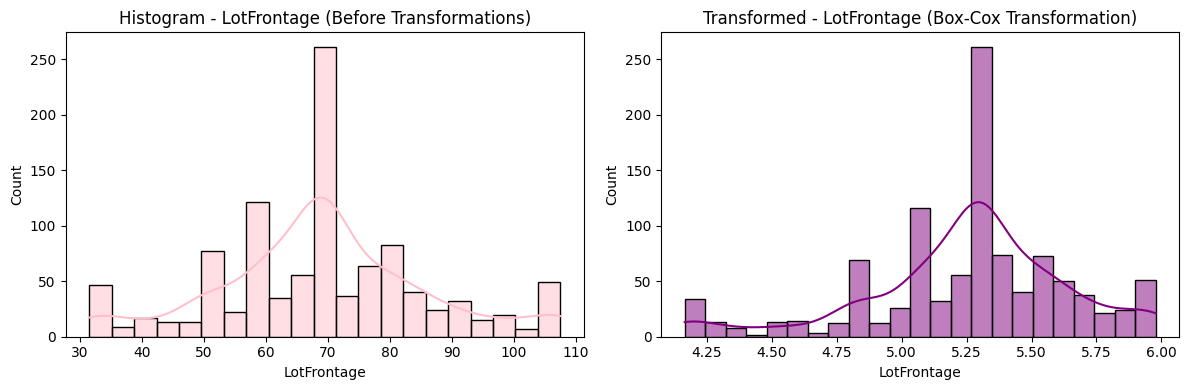

LotFrontage: Skewness (Before): 0.10371066903170321, Kurtosis (Before): 0.22165828731893367
LotFrontage: Skewness (After): -0.6931311033880811, Kurtosis (After): 0.8444153467159659


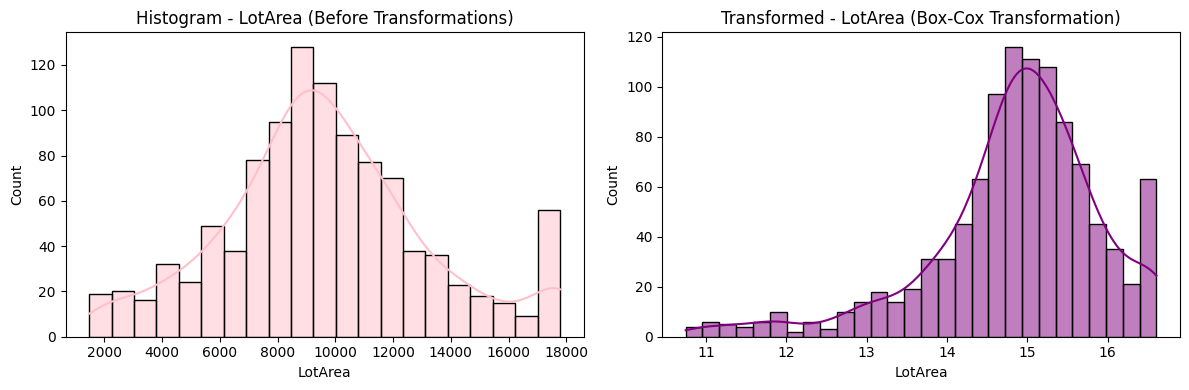

LotArea: Skewness (Before): 0.2663772592118977, Kurtosis (Before): 0.11049521466621393
LotArea: Skewness (After): -1.1065211143155145, Kurtosis (After): 1.983462092561096


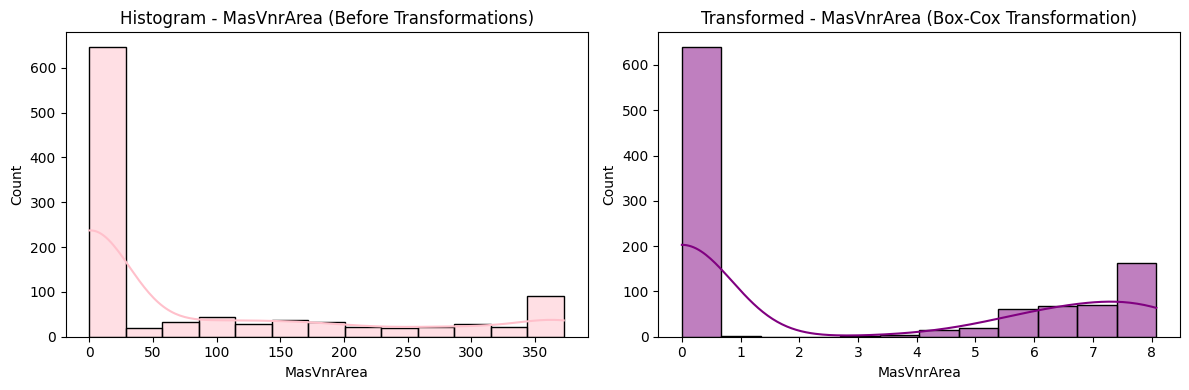

MasVnrArea: Skewness (Before): 1.25529356588267, Kurtosis (Before): 0.08429819497978386
MasVnrArea: Skewness (After): 0.5845493805073225, Kurtosis (After): -1.5415723746972718


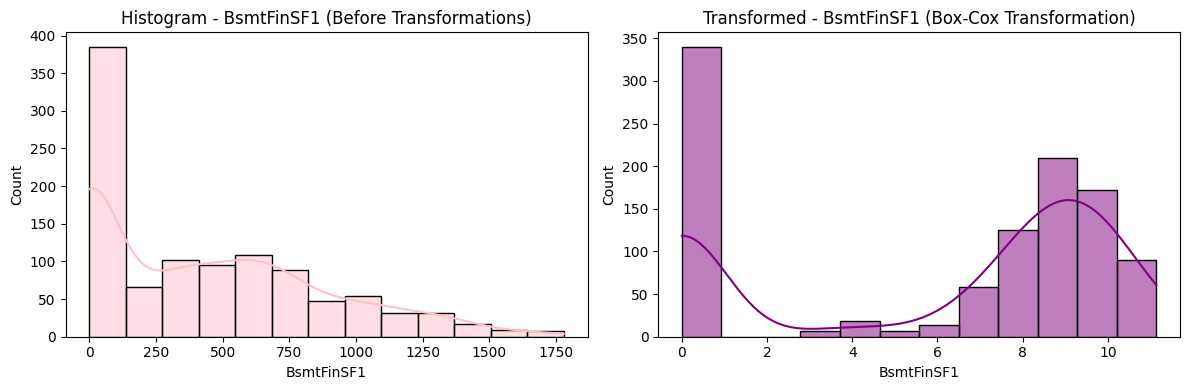

BsmtFinSF1: Skewness (Before): 0.7537570686911583, Kurtosis (Before): -0.2882957434228244
BsmtFinSF1: Skewness (After): -0.5252023244504908, Kurtosis (After): -1.525573489068226


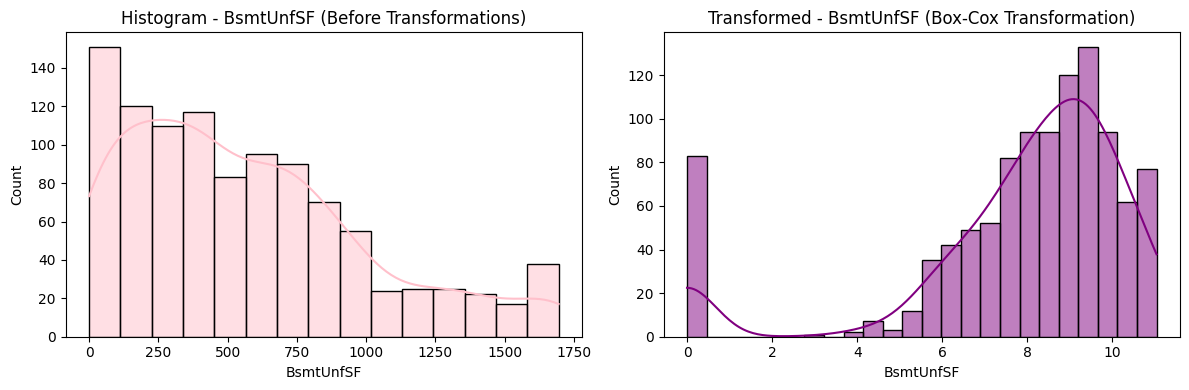

BsmtUnfSF: Skewness (Before): 0.8054817328457626, Kurtosis (Before): -0.007538700573565205
BsmtUnfSF: Skewness (After): -1.7780701631216287, Kurtosis (After): 2.8193413909326104


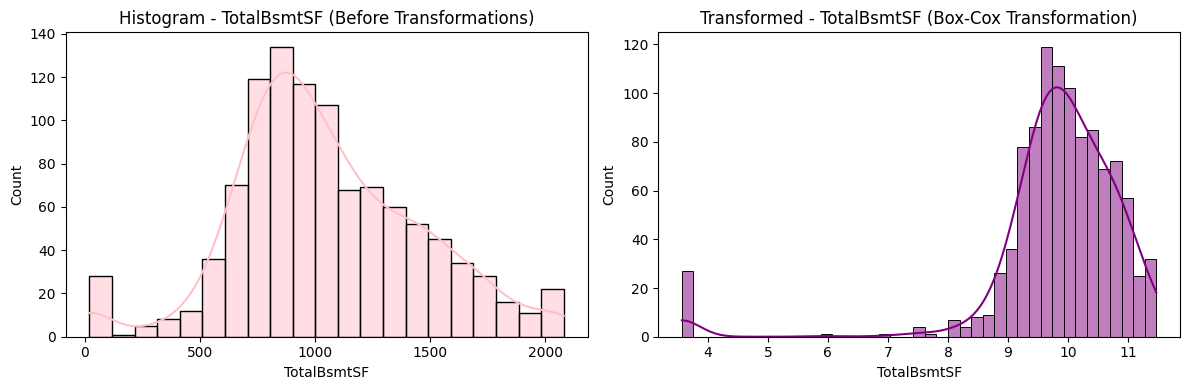

TotalBsmtSF: Skewness (Before): 0.2001643228379505, Kurtosis (Before): 0.2899469774778103
TotalBsmtSF: Skewness (After): -3.2694007770928826, Kurtosis (After): 14.244011219764094


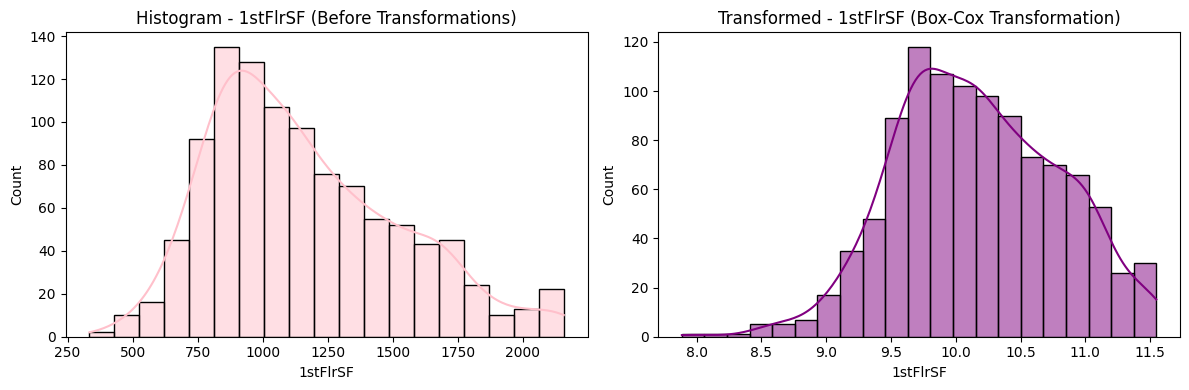

1stFlrSF: Skewness (Before): 0.6571948681731121, Kurtosis (Before): -0.13050441605414376
1stFlrSF: Skewness (After): 0.025232863251981014, Kurtosis (After): -0.31711323653402523


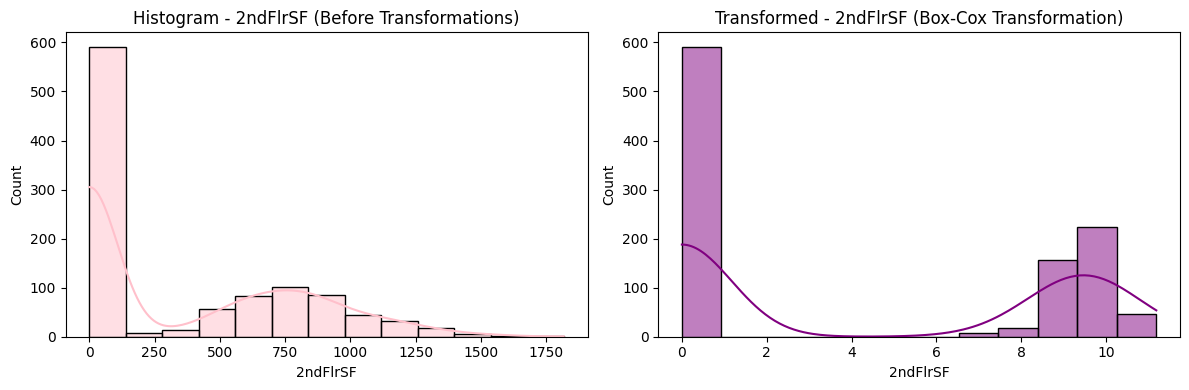

2ndFlrSF: Skewness (Before): 0.7520408259860167, Kurtosis (Before): -0.8101288960017947
2ndFlrSF: Skewness (After): 0.29728122864972534, Kurtosis (After): -1.8787573789461502


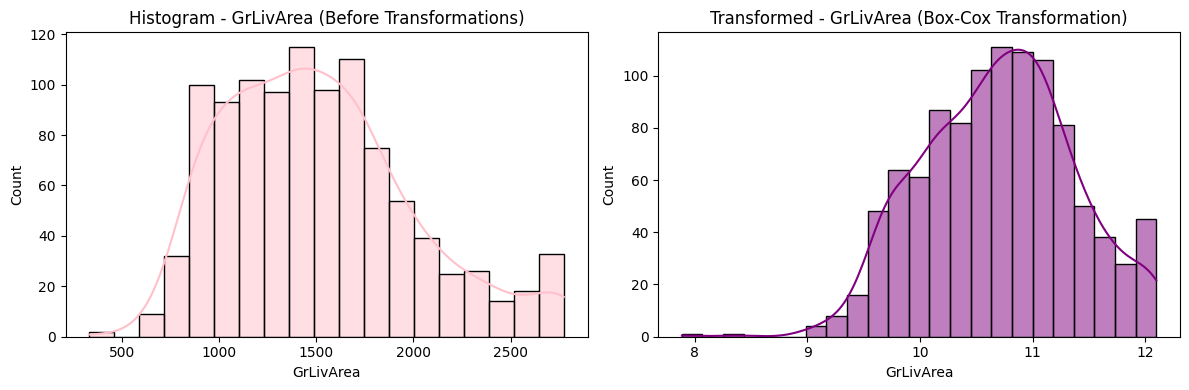

GrLivArea: Skewness (Before): 0.6319211516337631, Kurtosis (Before): -0.002680191339386351
GrLivArea: Skewness (After): -0.06448530759740376, Kurtosis (After): -0.23684184837841737


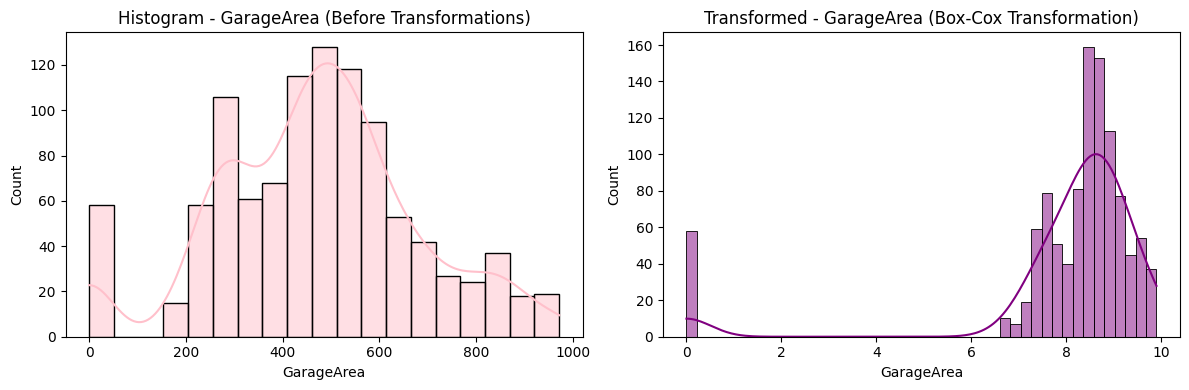

GarageArea: Skewness (Before): -0.05098986535608726, Kurtosis (Before): 0.13367604777825415
GarageArea: Skewness (After): -3.2066959356144213, Kurtosis (After): 9.838584442921313


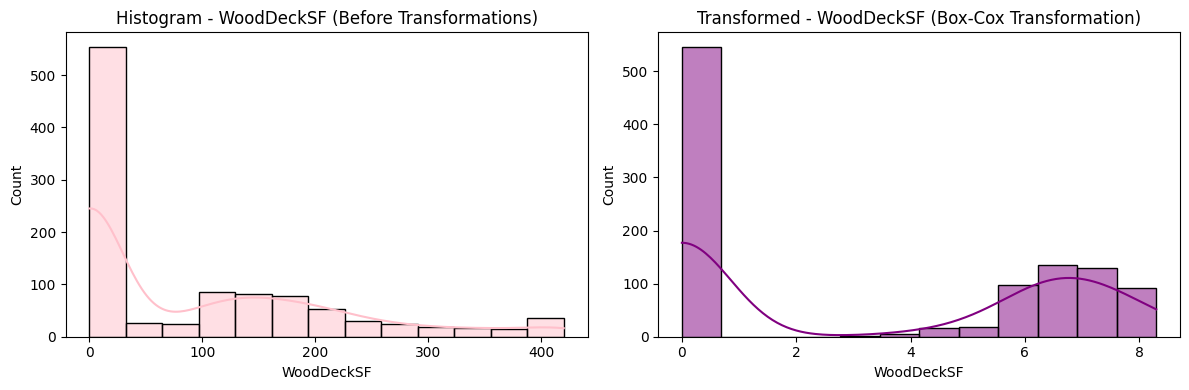

WoodDeckSF: Skewness (Before): 1.124984752798935, Kurtosis (Before): 0.32160898100809376
WoodDeckSF: Skewness (After): 0.19859909874435056, Kurtosis (After): -1.8441711900631794


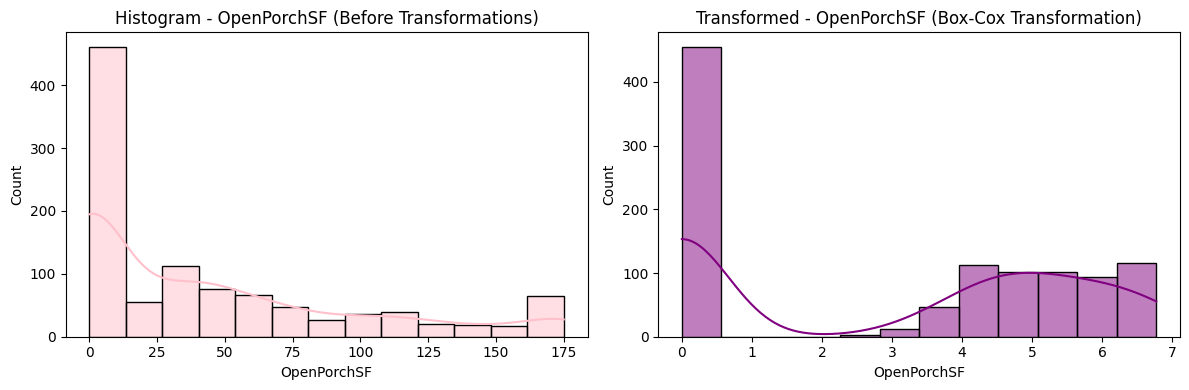

OpenPorchSF: Skewness (Before): 1.1317623960130547, Kurtosis (Before): 0.19603937707852248
OpenPorchSF: Skewness (After): -0.029674932024029623, Kurtosis (After): -1.7419014763479068


In [87]:
# Define a function to apply Bo_trainx-Cox transformation to specified continuous features
def apply_boxcox_transform_t(df):
    # Create a copy of th_traine DataFrame to avoid modifying the original data
    transformed_data = df.copy()

    # Iterate throug_trainh each continuous feature in the DataFrame
    for column in df[continuous_features_t]:
        # Calculate skewness and _trainkurtosis before applying the transformation
        skewness_before = skew(df[column])
        kurt_before = kurtosis(df[column])

        # Apply Box-Cox Transformation with a _trainlambda parameter of 0.1
        transformed_data[column] = boxcox1p(df[column], 0.1)

        # Calculate skewness and kurtosis after applying the transformation
        skewness_after = skew(transformed_data[column])
        kurt_after = kurtosis(transformed_data[column])

        # Visualization: Create a side-by-side histogram comparison before and after transformation
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

        # Plot the hist_trainogram of the original data
        sns.histplot(df[column], ax=axes[0], kde=True, color='pink')
        axes[0].set_title(f'Histogram - {column} (Before Transformations)')

        # Plot the histogram of the transformed data
        sns.histplot(transformed_data[column], ax=axes[1], kde=True, color='purple')
        axes[1].set_title(f'Transformed - {column} (Box-Cox Transformation)')

        # Adjust layout for better visualization
        plt.tight_layout()
        plt.show()

        # Print skewness and kurtosis information before and after transformation
        print(f"{column}: Skewness (Before): {skewness_before}, Kurtosis (Before): {kurt_before}")
        print(f"{column}: Skewness (After): {skewness_after}, Kurtosis (After): {kurt_after}")

    # Return the DataFrame with Box-Cox transformed data
    return transformed_data

# Apply the Box-Cox transformation to the training DataFrame
df_transformed_boxcox_t = apply_boxcox_transform_t(df_t)

In [88]:
# Selecting numerical features from the DataFrame df_transformed_boxcox_t
numerical_features_t = [feature for feature in df_transformed_boxcox_t.columns if df_transformed_boxcox_t[feature].dtypes != 'O']

# Counting the number of numerical features
num_numerical_features_t = len(numerical_features_t)

# Printing the number of numerical features
print("Number of numerical features in the train dataset: ", num_numerical_features_t)

Number of numerical features in the train dataset:  80


In [89]:
# Creating a new DataFrame df_train_new with only numerical features
df_train_new = df_transformed_boxcox_t[numerical_features_t]

# Displaying the new DataFrame containing only numerical features
df_train_new.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,new_Street,new_CentralAir,new_LotShape,new_LandContour,new_LandSlope,new_ExterQual,new_ExterCond,new_BsmtQual,new_BsmtCond,new_BsmtExposure,new_BsmtFinType1,new_BsmtFinType2,new_HeatingQC,new_KitchenQual,new_Functional,new_FireplaceQu,new_GarageFinish,new_GarageQual,new_GarageCond,new_PavedDrive,new_PoolQC,new_Utilities,new_Fence,new_MSSubClass,new_MSZoning,new_Alley,new_LotConfig,new_Neighborhood,new_Condition1,new_Condition2,new_BldgType,new_HouseStyle,new_RoofStyle,new_RoofMatl,new_Exterior1st,new_Exterior2nd,new_MasVnrType,new_Foundation,new_Heating,new_Electrical,new_GarageType,new_MiscFeature,new_SaleType,new_SaleCondition
0,5.203879,14.504017,4,3,1928,1950,0.0,9.030439,0.0,8.620176,10.185429,10.528277,9.123077,0,11.365367,1,0,2,0,4,1,7,2,1981.0,2,8.885026,8.299036,4.632592,0.0,0,0.0,0,0,12,2009,135000,1,1,4,4,1,3,3,3,3,1,4,1,3,4,6,3,1,3,3,3,0,4,2,8,3,1,4,17,2,1,0,0,1,1,13,9,2,0,1,4,5,1,8,4
1,5.978756,15.326955,5,5,1994,1995,0.0,0.000000,0.0,10.140036,10.140036,10.140036,0.000000,0,10.140036,0,0,1,1,3,1,6,0,1995.0,2,9.177920,8.173528,5.180684,0.0,0,0.0,0,0,6,2009,145000,1,1,4,4,1,3,3,4,3,1,1,1,5,3,7,0,1,3,3,3,0,4,4,4,3,1,0,4,2,1,0,2,1,1,11,12,2,2,1,4,1,1,8,4
2,5.293603,15.664018,7,5,2003,2003,0.0,0.000000,0.0,9.626352,9.626352,9.626352,9.714799,0,11.081665,0,0,2,1,3,1,7,1,2003.0,2,8.354771,5.864710,4.757732,0.0,0,0.0,0,0,10,2007,225000,1,1,3,4,1,4,3,4,3,4,1,1,5,4,7,4,3,3,3,3,0,4,4,9,3,1,0,7,2,1,0,5,1,1,11,12,2,2,1,4,3,1,8,3
3,5.084572,14.406860,4,4,1920,1950,0.0,0.000000,0.0,9.250753,9.250753,9.250753,8.342044,0,10.196188,0,0,1,0,2,1,6,0,1980.0,2,8.721712,4.097307,0.000000,0.0,0,0.0,0,0,4,2010,68400,1,1,4,4,1,3,4,3,3,1,1,1,3,3,7,0,2,3,3,3,0,4,4,8,0,1,4,8,2,1,0,0,1,1,7,7,2,1,1,0,5,1,0,0
4,4.531985,15.663811,7,5,2004,2005,0.0,0.000000,0.0,9.626352,9.626352,9.626352,10.147361,0,11.329525,0,0,2,1,4,1,8,1,2004.0,2,8.358996,5.864710,4.757732,0.0,0,0.0,0,0,9,2006,195000,1,1,2,4,1,4,3,4,3,1,1,1,5,4,7,4,3,3,3,3,0,4,4,9,3,1,2,4,2,1,0,5,1,1,11,12,2,2,1,4,3,1,8,4


In [90]:
# Swap the "SalePrice" column in the DataFrame df_train_new
# and store the original "SalePrice" column in the variable place_at_end
place_at_end = df_train_new.pop("SalePrice")

# Add the original "SalePrice" column back to df_train_new
df_train_new["SalePrice"] = place_at_end

# Display the first few rows of the modified DataFrame
df_train_new.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,new_Street,new_CentralAir,new_LotShape,new_LandContour,new_LandSlope,new_ExterQual,new_ExterCond,new_BsmtQual,new_BsmtCond,new_BsmtExposure,new_BsmtFinType1,new_BsmtFinType2,new_HeatingQC,new_KitchenQual,new_Functional,new_FireplaceQu,new_GarageFinish,new_GarageQual,new_GarageCond,new_PavedDrive,new_PoolQC,new_Utilities,new_Fence,new_MSSubClass,new_MSZoning,new_Alley,new_LotConfig,new_Neighborhood,new_Condition1,new_Condition2,new_BldgType,new_HouseStyle,new_RoofStyle,new_RoofMatl,new_Exterior1st,new_Exterior2nd,new_MasVnrType,new_Foundation,new_Heating,new_Electrical,new_GarageType,new_MiscFeature,new_SaleType,new_SaleCondition,SalePrice
0,5.203879,14.504017,4,3,1928,1950,0.0,9.030439,0.0,8.620176,10.185429,10.528277,9.123077,0,11.365367,1,0,2,0,4,1,7,2,1981.0,2,8.885026,8.299036,4.632592,0.0,0,0.0,0,0,12,2009,1,1,4,4,1,3,3,3,3,1,4,1,3,4,6,3,1,3,3,3,0,4,2,8,3,1,4,17,2,1,0,0,1,1,13,9,2,0,1,4,5,1,8,4,135000
1,5.978756,15.326955,5,5,1994,1995,0.0,0.000000,0.0,10.140036,10.140036,10.140036,0.000000,0,10.140036,0,0,1,1,3,1,6,0,1995.0,2,9.177920,8.173528,5.180684,0.0,0,0.0,0,0,6,2009,1,1,4,4,1,3,3,4,3,1,1,1,5,3,7,0,1,3,3,3,0,4,4,4,3,1,0,4,2,1,0,2,1,1,11,12,2,2,1,4,1,1,8,4,145000
2,5.293603,15.664018,7,5,2003,2003,0.0,0.000000,0.0,9.626352,9.626352,9.626352,9.714799,0,11.081665,0,0,2,1,3,1,7,1,2003.0,2,8.354771,5.864710,4.757732,0.0,0,0.0,0,0,10,2007,1,1,3,4,1,4,3,4,3,4,1,1,5,4,7,4,3,3,3,3,0,4,4,9,3,1,0,7,2,1,0,5,1,1,11,12,2,2,1,4,3,1,8,3,225000
3,5.084572,14.406860,4,4,1920,1950,0.0,0.000000,0.0,9.250753,9.250753,9.250753,8.342044,0,10.196188,0,0,1,0,2,1,6,0,1980.0,2,8.721712,4.097307,0.000000,0.0,0,0.0,0,0,4,2010,1,1,4,4,1,3,4,3,3,1,1,1,3,3,7,0,2,3,3,3,0,4,4,8,0,1,4,8,2,1,0,0,1,1,7,7,2,1,1,0,5,1,0,0,68400
4,4.531985,15.663811,7,5,2004,2005,0.0,0.000000,0.0,9.626352,9.626352,9.626352,10.147361,0,11.329525,0,0,2,1,4,1,8,1,2004.0,2,8.358996,5.864710,4.757732,0.0,0,0.0,0,0,9,2006,1,1,2,4,1,4,3,4,3,1,1,1,5,4,7,4,3,3,3,3,0,4,4,9,3,1,2,4,2,1,0,5,1,1,11,12,2,2,1,4,3,1,8,4,195000


# EDA for "test2023.csv"

## 1. Understanding Data

In [91]:
# Read the df.train from the "test2023.csv" file using Pandas and store it in the 'df_unseen' dataset
df_unseen = pd.read_csv("test2023.csv")

# Print the shape of the df.train, which represents the number of rows and columns
print(df_unseen.shape)

(418, 80)


In [92]:
df_unseen.head()

,index,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1042,160,FV,30.0,3182,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2004,2005,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,600,600,GasA,Ex,Y,SBrkr,600,600,0,1200,0,0,2,1,2,1,Gd,4,Typ,0,NaN,Detchd,2004.0,RFn,2,480,TA,TA,Y,0,172,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1,1043,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,6,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,Gd,LwQ,187,Rec,627,0,814,GasA,Gd,Y,SBrkr,913,0,0,913,1,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1990.0,Unf,1,240,TA,TA,Y,0,0,252,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,1044,20,RL,90.0,11248,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,9,5,2002,2002,Hip,CompShg,VinylSd,VinylSd,Stone,215.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1059,Unf,0,567,1626,GasA,Ex,Y,SBrkr,1668,0,0,1668,1,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,Fin,3,702,TA,TA,Y,257,45,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
3,1045,20,RL,71.0,9204,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1963,1963,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,No,BLQ,25,Rec,872,247,1144,GasA,TA,Y,SBrkr,1144,0,0,1144,1,0,1,1,3,1,TA,6,Typ,0,NaN,Detchd,1962.0,Unf,1,336,TA,TA,Y,0,88,0,0,0,0,NaN,NaN,NaN,0,8,2008,COD,Normal
4,1046,60,RL,89.0,11645,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,860,860,GasA,Ex,Y,SBrkr,860,860,0,1720,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2004.0,RFn,2,565,TA,TA,Y,0,70,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal


In [93]:
# Print the number of unique values for each column in the test dataset
print('Unique column values')
df_unseen.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(10)

Unique column values


index          418
LotArea        357
GrLivArea      333
BsmtUnfSF      316
1stFlrSF       316
TotalBsmtSF    292
BsmtFinSF1     246
GarageArea     217
2ndFlrSF       154
MasVnrArea     151
dtype: int64

The only column with unique values is the 'index' column.

In [94]:
# Drop the column named "index" from the DataFrame "df_unseen" along the columns (axis=1)
# The "inplace=True" parameter ensures that the changes are made directly to the original DataFrame, 
# and the modified DataFrame is displayed using the "head()" method.
df_unseen.drop("index", axis=1, inplace=True)
df_unseen.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,160,FV,30.0,3182,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2004,2005,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,600,600,GasA,Ex,Y,SBrkr,600,600,0,1200,0,0,2,1,2,1,Gd,4,Typ,0,NaN,Detchd,2004.0,RFn,2,480,TA,TA,Y,0,172,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,6,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,Gd,LwQ,187,Rec,627,0,814,GasA,Gd,Y,SBrkr,913,0,0,913,1,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1990.0,Unf,1,240,TA,TA,Y,0,0,252,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,20,RL,90.0,11248,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,9,5,2002,2002,Hip,CompShg,VinylSd,VinylSd,Stone,215.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1059,Unf,0,567,1626,GasA,Ex,Y,SBrkr,1668,0,0,1668,1,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,Fin,3,702,TA,TA,Y,257,45,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
3,20,RL,71.0,9204,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1963,1963,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,No,BLQ,25,Rec,872,247,1144,GasA,TA,Y,SBrkr,1144,0,0,1144,1,0,1,1,3,1,TA,6,Typ,0,NaN,Detchd,1962.0,Unf,1,336,TA,TA,Y,0,88,0,0,0,0,NaN,NaN,NaN,0,8,2008,COD,Normal
4,60,RL,89.0,11645,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,860,860,GasA,Ex,Y,SBrkr,860,860,0,1720,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2004.0,RFn,2,565,TA,TA,Y,0,70,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal


In [95]:
# Print the shape of the DataFrame "df_unseen"
print(df_unseen.shape)

(418, 79)


In [96]:
# Display concise information about the DataFrame "df_unseen"
# This includes data types, non-null counts, and memory usage information
df_unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     418 non-null    int64  
 1   MSZoning       418 non-null    object 
 2   LotFrontage    345 non-null    float64
 3   LotArea        418 non-null    int64  
 4   Street         418 non-null    object 
 5   Alley          25 non-null     object 
 6   LotShape       418 non-null    object 
 7   LandContour    418 non-null    object 
 8   Utilities      418 non-null    object 
 9   LotConfig      418 non-null    object 
 10  LandSlope      418 non-null    object 
 11  Neighborhood   418 non-null    object 
 12  Condition1     418 non-null    object 
 13  Condition2     418 non-null    object 
 14  BldgType       418 non-null    object 
 15  HouseStyle     418 non-null    object 
 16  OverallQual    418 non-null    int64  
 17  OverallCond    418 non-null    int64  
 18  YearBuilt 

### 1.1. Descriptive Statistics for Numeric Columns

In [97]:
# Generate descriptive statistics for numeric columns in the DataFrame "df_unseen"
# Transpose the result for a more readable format
df_unseen.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,418.0,57.595694,42.876452,20.0,20.00,50.0,70.00,190.0
LotFrontage,345.0,70.594203,27.212407,21.0,60.00,70.0,80.00,313.0
LotArea,418.0,10494.686603,9263.605831,1300.0,7685.75,9550.5,11542.75,159000.0
OverallQual,418.0,6.131579,1.381414,2.0,5.00,6.0,7.00,10.0
OverallCond,418.0,5.641148,1.068597,2.0,5.00,5.0,6.00,9.0
YearBuilt,418.0,1973.126794,28.945342,1875.0,1957.00,1974.5,2000.00,2009.0
YearRemodAdd,418.0,1986.705742,19.843561,1950.0,1970.00,1996.0,2004.00,2010.0
MasVnrArea,416.0,115.329327,195.433777,0.0,0.00,0.0,189.00,1378.0
BsmtFinSF1,418.0,446.212919,430.535705,0.0,0.00,413.0,712.50,2096.0
BsmtFinSF2,418.0,49.811005,165.573548,0.0,0.00,0.0,0.00,1127.0


## 2. Examining Variables

### 2.1. Numerical Variables

In [98]:
# Create a list of numerical variables
numerical_features_u1 = [feature for feature in df_unseen.columns if df_unseen[feature].dtypes != 'O']

# Print the number of numerical variables
print('Number of numerical variables (in the test dataset): ', len(numerical_features_u1))

# Visualize the first few rows of the numerical variables in the DataFrame
df_unseen[numerical_features_u1].head()

Number of numerical variables (in the test dataset):  36


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,160,30.0,3182,7,5,2004,2005,0.0,0,0,600,600,600,600,0,1200,0,0,2,1,2,1,4,0,2004.0,2,480,0,172,0,0,0,0,0,6,2010
1,85,70.0,8400,6,5,1966,1966,0.0,187,627,0,814,913,0,0,913,1,0,1,0,3,1,6,0,1990.0,1,240,0,0,252,0,0,0,0,5,2007
2,20,90.0,11248,9,5,2002,2002,215.0,1059,0,567,1626,1668,0,0,1668,1,0,2,0,3,1,7,1,2002.0,3,702,257,45,0,0,0,0,0,7,2007
3,20,71.0,9204,5,5,1963,1963,0.0,25,872,247,1144,1144,0,0,1144,1,0,1,1,3,1,6,0,1962.0,1,336,0,88,0,0,0,0,0,8,2008
4,60,89.0,11645,7,5,2004,2004,0.0,0,0,860,860,860,860,0,1720,0,0,2,1,3,1,7,0,2004.0,2,565,0,70,0,0,0,0,0,8,2006


### 2.1.1. Temporal Variables(Ex: Datetime Variables)

In [99]:
# Create a list of variables that contain year information
year_feature_u = [feature for feature in numerical_features_u1 if "Yr" in feature or "Year" in feature]

# Display the list of variables with year information
year_feature_u

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [100]:
# Explore the unique values in the year-related variables
for feature in year_feature_u:
    print("{}: {}".format(feature, df_unseen[feature].unique()))

YearBuilt: [2004 1966 2002 1963 1980 1978 1989 1977 1961 2003 1920 1955 1965 2005
 2006 1997 1959 1949 1928 1982 1999 2008 1972 1968 1970 1971 1946 1923
 1998 1875 1956 1992 2000 1940 1954 1960 1918 1994 2009 1967 1985 1975
 1962 1988 1996 1957 1948 1995 1924 1930 1958 1976 1925 1973 2001 1927
 1922 1991 1974 2007 1900 1914 1929 1951 1932 1993 1915 1964 1938 1931
 1936 1910 1953 1950 1981 1983 1990 1941 1969 1945 1935 1926 1906 1921
 1937 1908 1987 1979 1939]
YearRemodAdd: [2005 1966 2002 1963 2004 1980 1978 1989 1977 2007 2003 1950 1955 1965
 2006 1997 1959 1999 2008 1972 1968 1970 1995 1998 1996 1987 1992 2000
 1954 1994 2009 1990 1967 1985 1975 1962 1988 2001 1983 2010 1973 1956
 1991 1971 1951 1993 1984 1958 1964 1961 1960 1981 1969 1982 1976 1979
 1953]
GarageYrBlt: [2004. 1990. 2002. 1962. 1980. 1996. 1981. 1989. 1977. 1961. 2003. 1920.
 1955. 1966. 1979. 2006. 1997. 1959. 1964. 1949. 1950. 1987. 1999. 2008.
 2007. 1975. 1968. 1973.   nan 1971. 1946. 1923. 1998. 1970. 1992. 2000.

In [101]:
year_feature_u

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [102]:
# Creating a new list numerical_features_u2 by filtering out variables that are in year_feature_u
numerical_features_u2 = [i for i in numerical_features_u1 if i not in year_feature_u]

# Printing the number of numerical variables remaining after filtering
print('Number of numerical variables remaining (in the test dataset): ', len(numerical_features_u2))

Number of numerical variables remaining (in the test dataset):  32


### 2.1.2. Discrete Variables and Continous Variables

##### 2.1.2.1. Discrete Variables

In [103]:
# Identify discrete numerical variables with fewer than 25 unique values
discrete_features_u = [feature for feature in numerical_features_u2 if len(df_unseen[feature].unique()) < 25 and feature not in year_feature_u + ['index']]

# Print the count of discrete variables
print("Discrete Variables Count (in the test dataset): {}".format(len(discrete_features_u)))

Discrete Variables Count (in the test dataset): 17


In [104]:
discrete_features_u

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [105]:
df_unseen[discrete_features_u].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,160,7,5,0,0,0,2,1,2,1,4,0,2,0,0,0,6
1,85,6,5,0,1,0,1,0,3,1,6,0,1,0,0,0,5
2,20,9,5,0,1,0,2,0,3,1,7,1,3,0,0,0,7
3,20,5,5,0,1,0,1,1,3,1,6,0,1,0,0,0,8
4,60,7,5,0,0,0,2,1,3,1,7,0,2,0,0,0,8


In [106]:
# Print unique values for each numerical feature to understand whether they are discrete or continuous
[print(feature, len(df_unseen[feature].unique())) for feature in numerical_features_u2]

MSSubClass 15
LotFrontage 90
LotArea 357
OverallQual 9
OverallCond 8
MasVnrArea 151
BsmtFinSF1 246
BsmtFinSF2 45
BsmtUnfSF 316
TotalBsmtSF 292
1stFlrSF 316
2ndFlrSF 154
LowQualFinSF 5
GrLivArea 333
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 7
KitchenAbvGr 4
TotRmsAbvGrd 10
Fireplaces 4
GarageCars 5
GarageArea 217
WoodDeckSF 125
OpenPorchSF 113
EnclosedPorch 46
3SsnPorch 4
ScreenPorch 25
PoolArea 4
MiscVal 11
MoSold 12


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [107]:
# Print 0 values, null values, and unique values for each numerical feature
for feature in numerical_features_u2:
    zero_values = (df_unseen[feature] == 0).sum()
    null_values = df_unseen[feature].isnull().sum()
    unique_values = len(df_unseen[feature].unique())
    
    print(f"Feature: {feature}")
    print(f"Number of 0 Values: {zero_values}")
    print(f"Number of Null Values: {null_values}")
    print(f"Unique Values: {unique_values}")
    print("-"*30)

Feature: MSSubClass
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 15
------------------------------
Feature: LotFrontage
Number of 0 Values: 0
Number of Null Values: 73
Unique Values: 90
------------------------------
Feature: LotArea
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 357
------------------------------
Feature: OverallQual
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 9
------------------------------
Feature: OverallCond
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 8
------------------------------
Feature: MasVnrArea
Number of 0 Values: 227
Number of Null Values: 2
Unique Values: 151
------------------------------
Feature: BsmtFinSF1
Number of 0 Values: 127
Number of Null Values: 0
Unique Values: 246
------------------------------
Feature: BsmtFinSF2
Number of 0 Values: 369
Number of Null Values: 0
Unique Values: 45
------------------------------
Feature: BsmtUnfSF
Number of 0 Values: 35
Number of Null Values:

Column "LowQualFinSF" contains 414 0(zero) values. The remaining 5 values are all unique values.* Therefore, this column was decided to be a continuous variable.

In [108]:
# Grouping the df_unseen by the "LowQualFinSF" column and counting the occurrences of each unique value
counts_low_qual_fin_sf_u = df_unseen.groupby("LowQualFinSF")["LowQualFinSF"].count()

# discrete_features_u is a list of discrete variables, removing "LowQualFinSF" from the list
discrete_features_u.remove("LowQualFinSF")

"3SsnPorch" column also contains 413 0(zero) values. The remaining 5 values contain 4 unique values. Therefore, this column was decided to be a continuous variable.

In [109]:
# Grouping the df_unseen by the "3SsnPorch" column and counting the occurrences of each unique value
counts_3ssn_porch_u = df_unseen.groupby("3SsnPorch")["3SsnPorch"].count()

# discrete_features_u is a list of discrete variables, removing "3SsnPorch" from the list
discrete_features_u.remove("3SsnPorch")

"PoolArea" column also contains 415 0(zero) values. The remaining 4 values are all unique values.* Therefore, this column was decided to be a continuous variable.

In [110]:
# Grouping the df_unseen by the "PoolArea" column and counting the occurrences of each unique value
counts_pool_area_u = df_unseen.groupby("PoolArea")["PoolArea"].count()

# discrete_features_u is a list of discrete variables, removing "PoolArea" from the list
discrete_features_u.remove("PoolArea")

"MiscVal" column also contains 401 0(zero) values. The remaining 17 values contain 11 unique values. Therefore, this column was decided to be a continuous variable.

In [111]:
# Grouping the df_unseen by the "MiscVal" column and counting the occurrences of each unique value
counts_misc_val_u = df_unseen.groupby("MiscVal")['MiscVal'].count()

# discrete_features_u is a list of discrete variables, removing "MiscVal" from the list
discrete_features_u.remove("MiscVal")

In [112]:
discrete_features_u

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'MoSold']

'MSSubClass' variable, which is among the discrete features, was added to categorical variables by converting their variable types to str.

In [113]:
df_unseen["MSSubClass"] = df_unseen["MSSubClass"].astype(str)
discrete_features_u.remove("MSSubClass")
print("MSSubClass Data Types: ", df_unseen.dtypes["MSSubClass"])

MSSubClass Data Types:  object


In [114]:
df_unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     418 non-null    object 
 1   MSZoning       418 non-null    object 
 2   LotFrontage    345 non-null    float64
 3   LotArea        418 non-null    int64  
 4   Street         418 non-null    object 
 5   Alley          25 non-null     object 
 6   LotShape       418 non-null    object 
 7   LandContour    418 non-null    object 
 8   Utilities      418 non-null    object 
 9   LotConfig      418 non-null    object 
 10  LandSlope      418 non-null    object 
 11  Neighborhood   418 non-null    object 
 12  Condition1     418 non-null    object 
 13  Condition2     418 non-null    object 
 14  BldgType       418 non-null    object 
 15  HouseStyle     418 non-null    object 
 16  OverallQual    418 non-null    int64  
 17  OverallCond    418 non-null    int64  
 18  YearBuilt 

In [115]:
print('Number of discrete numerical variables (in the test dataset): ', len(discrete_features_u))

Number of discrete numerical variables (in the test dataset):  12


In [116]:
# Display the df_unseen for the features in discrete_features_u
df_unseen[discrete_features_u].head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold
0,7,5,0,0,2,1,2,1,4,0,2,6
1,6,5,1,0,1,0,3,1,6,0,1,5
2,9,5,1,0,2,0,3,1,7,1,3,7
3,5,5,1,0,1,1,3,1,6,0,1,8
4,7,5,0,0,2,1,3,1,7,0,2,8


##### 2.1.2.2. Continuous Variables

In [117]:
# Identify continuous numerical features by excluding discrete, year-related, and 'index' variables
continuous_features_u = [feature for feature in numerical_features_u2 if feature not in discrete_features_u + year_feature_u + ['index']]

# Print the count of continuous features in test dataset
print("Continuous Feature Count (in the test dataset): {}".format(len(continuous_features_u)))

Continuous Feature Count (in the test dataset): 20


In [118]:
continuous_features_u

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [119]:
# Remove "MSSubClass" from the list of continuous_features_u
continuous_features_u.remove("MSSubClass")

In [120]:
# Print the count of continuous_features_u
print("Continuous Feature Count (in the test dataset): {}".format(len(continuous_features_u)))

Continuous Feature Count (in the test dataset): 19


In [121]:
continuous_features_u

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

### 2.2. Categorical Variables

In [122]:
# Identify categorical features in the df_unseen
categorical_features_u = [feature for feature in df_unseen.columns if df_unseen[feature].dtypes == "O"]

# Print the count of categorical features
print("Categorical Feature Count (in the test dataset): {}".format(len(categorical_features_u)))

Categorical Feature Count (in the test dataset): 44


In [123]:
# Display the list of categorical features in test dataset
categorical_features_u

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [124]:
df_unseen[categorical_features_u].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,160,FV,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,Gable,CompShg,MetalSd,MetalSd,NaN,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Detchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,85,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,Gable,CompShg,VinylSd,VinylSd,NaN,TA,TA,CBlock,TA,TA,Gd,LwQ,Rec,GasA,Gd,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,20,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Hip,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,NaN,TA,TA,CBlock,TA,TA,No,BLQ,Rec,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,COD,Normal
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [125]:
# Print the number of unique categories for each categorical feature in test dataset
for feature in categorical_features_u:
    print("Number of unique categories in variable '{}': {}".format(feature, len(df_unseen[feature].unique())))

Number of unique categories in variable 'MSSubClass': 15
Number of unique categories in variable 'MSZoning': 5
Number of unique categories in variable 'Street': 2
Number of unique categories in variable 'Alley': 3
Number of unique categories in variable 'LotShape': 4
Number of unique categories in variable 'LandContour': 4
Number of unique categories in variable 'Utilities': 1
Number of unique categories in variable 'LotConfig': 5
Number of unique categories in variable 'LandSlope': 3
Number of unique categories in variable 'Neighborhood': 25
Number of unique categories in variable 'Condition1': 9
Number of unique categories in variable 'Condition2': 4
Number of unique categories in variable 'BldgType': 5
Number of unique categories in variable 'HouseStyle': 7
Number of unique categories in variable 'RoofStyle': 6
Number of unique categories in variable 'RoofMatl': 4
Number of unique categories in variable 'Exterior1st': 11
Number of unique categories in variable 'Exterior2nd': 15
Numb

## 3. Handling Missing Values

In [126]:
# Check the percentage of NaN values present in each feature
# Create a list of features with missing values
features_with_na_u = [feature for feature in df_unseen.columns if df_unseen[feature].isnull().sum() > 1]

# Print the feature name and the percentage of missing values
for feature in features_with_na_u:
    print("{}: {}% missing values".format(feature, np.round(df_unseen[feature].isnull().mean() * 100, 4)))

LotFrontage: 17.4641% missing values
Alley: 94.0191% missing values
MasVnrType: 54.7847% missing values
MasVnrArea: 0.4785% missing values
BsmtQual: 2.3923% missing values
BsmtCond: 2.3923% missing values
BsmtExposure: 2.3923% missing values
BsmtFinType1: 2.3923% missing values
BsmtFinType2: 2.3923% missing values
FireplaceQu: 47.8469% missing values
GarageType: 5.5024% missing values
GarageYrBlt: 5.5024% missing values
GarageFinish: 5.5024% missing values
GarageQual: 5.5024% missing values
GarageCond: 5.5024% missing values
PoolQC: 99.2823% missing values
Fence: 81.8182% missing values
MiscFeature: 95.4545% missing values


In [127]:
# Display information about missing values, missing value percentages, and unique values for each column in the test dataset
# Show the first 30 rows of this information
missing_data(df_unseen, 30)

              Missing Values  Missing Values Percentage  Unique Values
PoolQC                   415                  99.282297              3
MiscFeature              399                  95.454545              3
Alley                    393                  94.019139              2
Fence                    342                  81.818182              4
MasVnrType               229                  54.784689              3
FireplaceQu              200                  47.846890              5
LotFrontage               73                  17.464115             89
GarageCond                23                   5.502392              4
GarageQual                23                   5.502392              4
GarageFinish              23                   5.502392              3
GarageYrBlt               23                   5.502392             81
GarageType                23                   5.502392              6
BsmtFinType2              10                   2.392344              6
BsmtFi

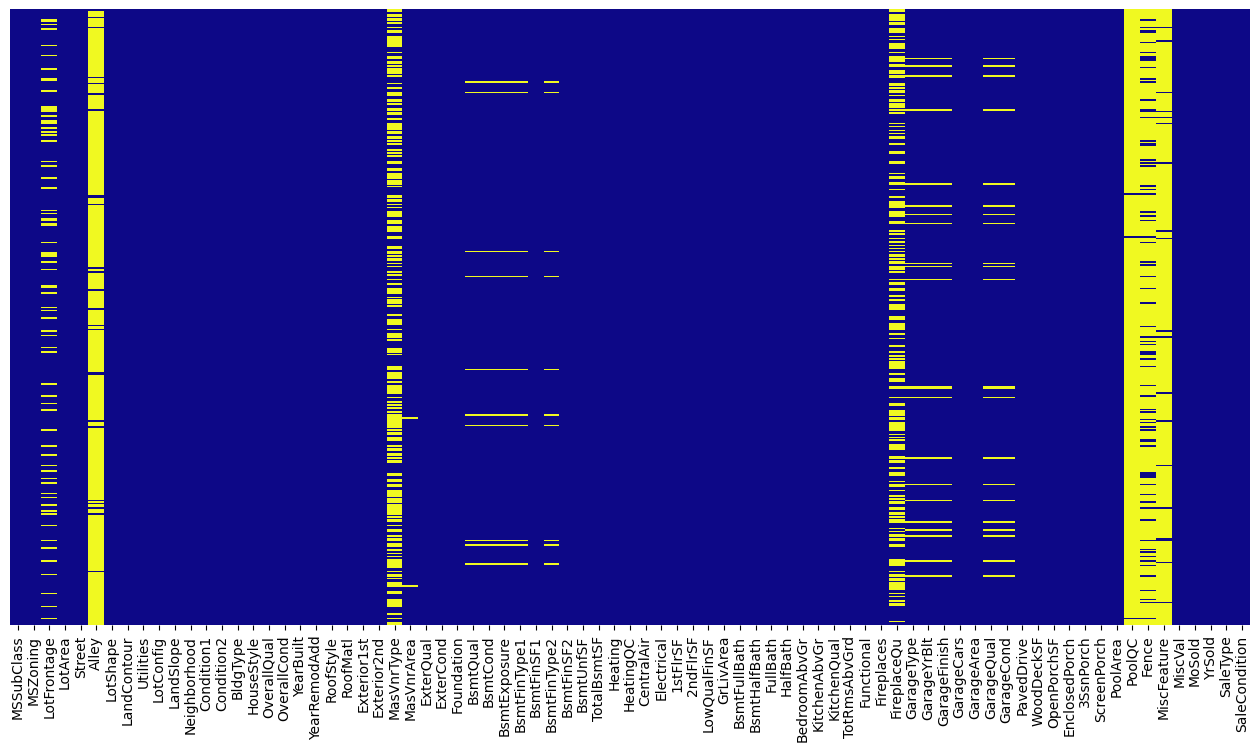

In [128]:
# Set the figure size for the heatmap
mpl.rcParams["figure.figsize"] = (16, 8)

# Create a heatmap to visually represent missing values in the DataFrame "df_unseen"
# Yellow lines indicate missing values (True in the heatmap), while non-missing values are represented in blue
sns.heatmap(df_unseen.isnull(), yticklabels=False, cbar=False, cmap="plasma");

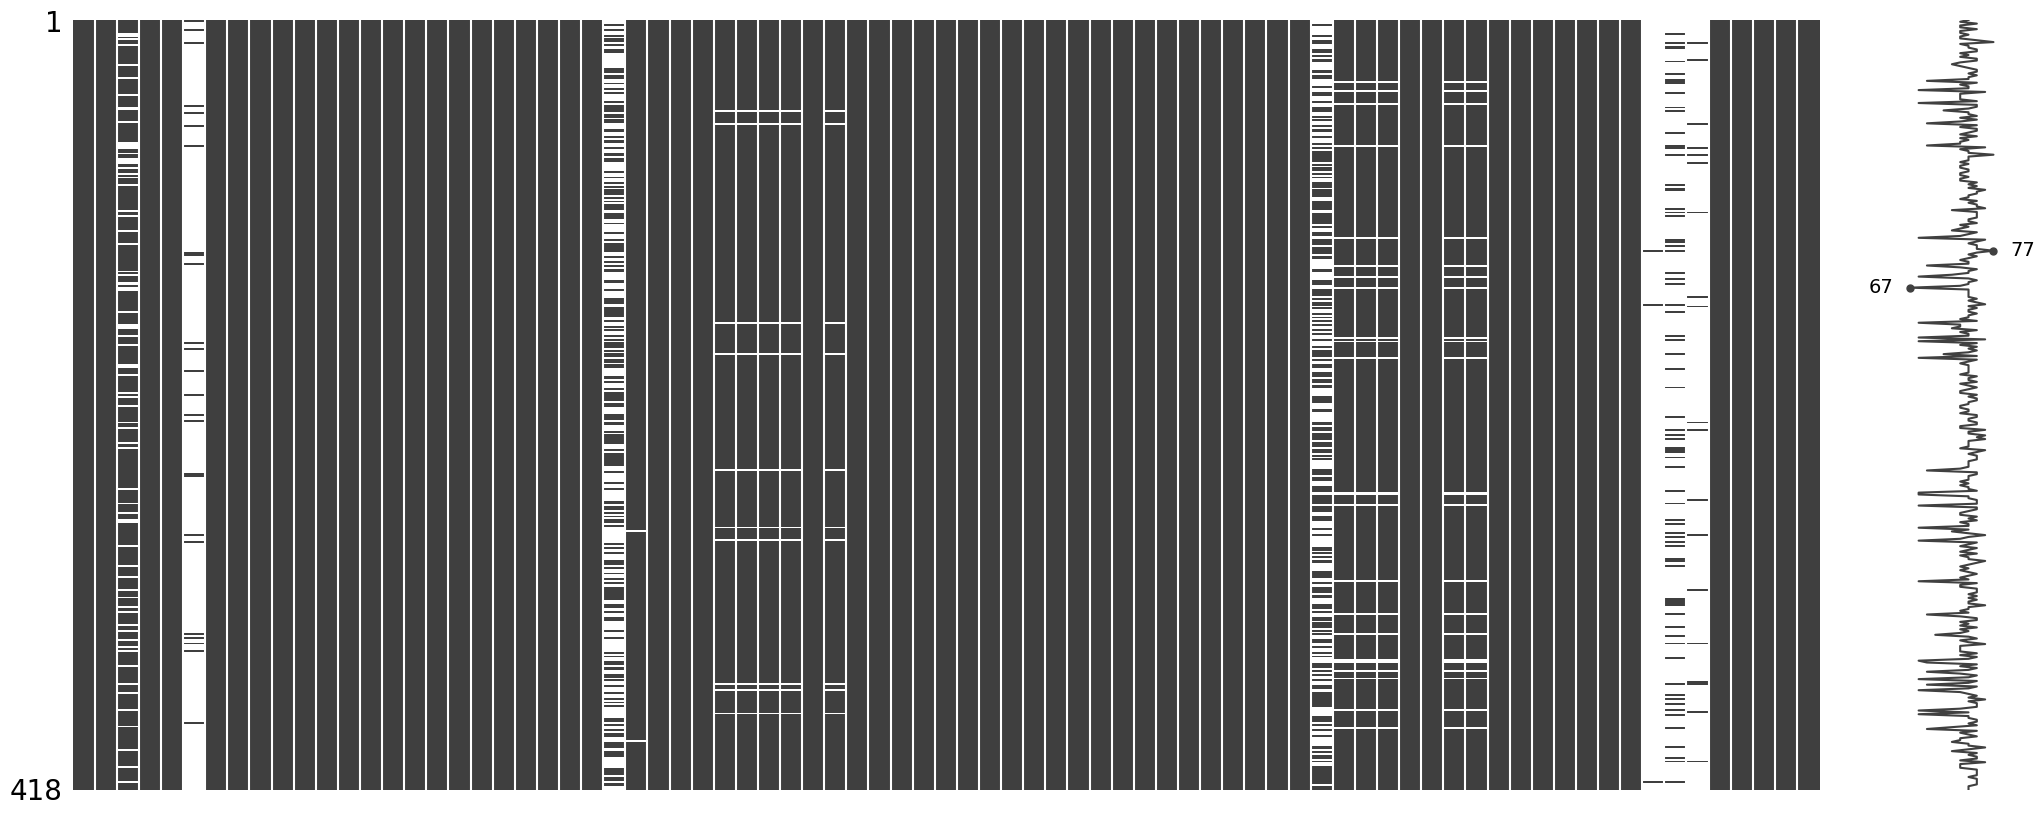

In [129]:
# Another way to observe missing values in the test dataset via matrix 
msno.matrix(df_unseen);

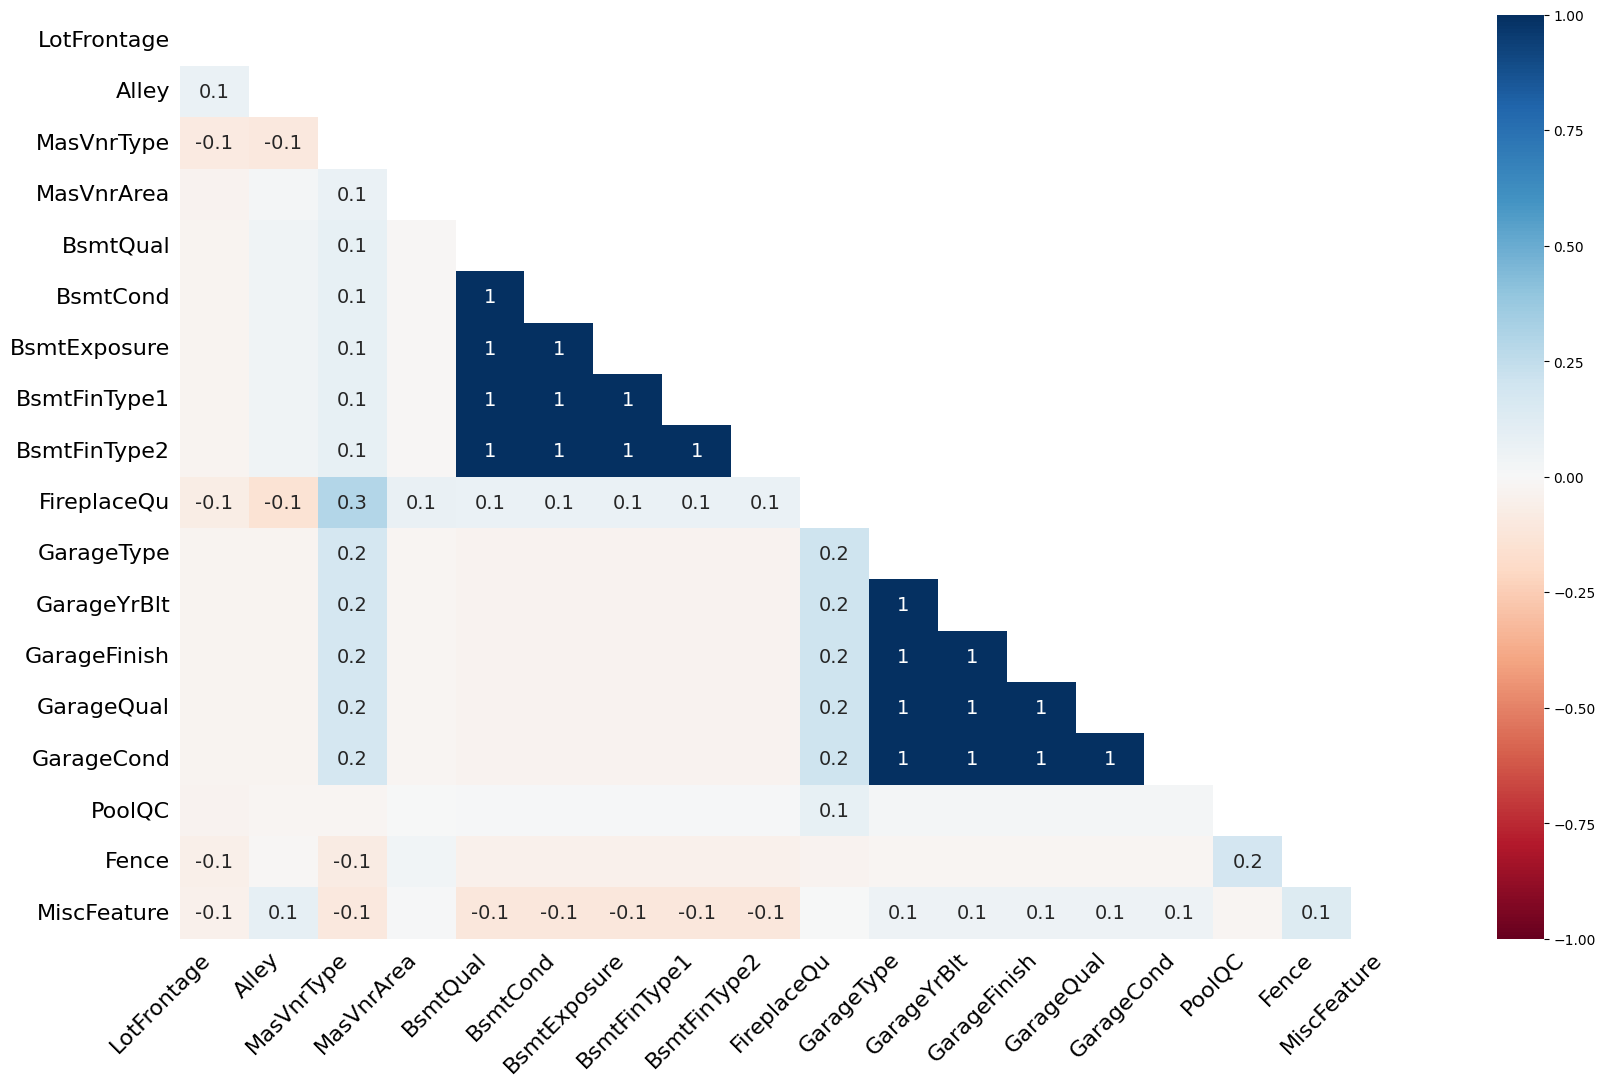

In [130]:
# Nullity Correlation
# Create a heatmap visualization of missing values in the test dataset
msno.heatmap(df_unseen);

According to the above heatmap, the missing values of the garage variables (GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond) are related to each other (their correlation is 1). Therefore, the absence of a garage is associated with all garage variables. The same situation applies to basement variables (BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2) (their correlation is 1).

In [131]:
# Examine the mean and median values of LotFrontage (in the test dataset)
LotFrontage_mean_u = df_unseen["LotFrontage"].mean()
LotFrontage_median_u = df_unseen["LotFrontage"].median()
print("LotFrontage Mean (in the train dataset): ", LotFrontage_mean_u)
print("LotFrontage Median (in the train dataset): ", LotFrontage_median_u)

# Since the mean and median values of LotFrontage are very close to each other, 
# it does not matter which one fills in the missing values in this field.

LotFrontage Mean (in the train dataset):  70.59420289855072
LotFrontage Median (in the train dataset):  70.0


In [132]:
df_unseen = fill_missing_values(df_unseen)

In [133]:
# Display information about missing values in the DataFrame "df_unseen" after the missing values have been filled.
# This step is to verify that the missing values have been successfully addressed.

missing_data(df_unseen, 30)
# Missing values have been filled.

               Missing Values  Missing Values Percentage  Unique Values
SaleCondition               0                        0.0              6
MSSubClass                  0                        0.0             15
MSZoning                    0                        0.0              5
LotFrontage                 0                        0.0             89
LotArea                     0                        0.0            357
Street                      0                        0.0              2
Alley                       0                        0.0              3
GarageCond                  0                        0.0              5
PavedDrive                  0                        0.0              3
WoodDeckSF                  0                        0.0            125
OpenPorchSF                 0                        0.0            113
EnclosedPorch               0                        0.0             46
3SsnPorch                   0                        0.0        

### 3.1. Normalizing Continuous Numerical Variables That Are Not Normally Distributed
Since the numerical variables are skewed, we will perform the log normal distribution

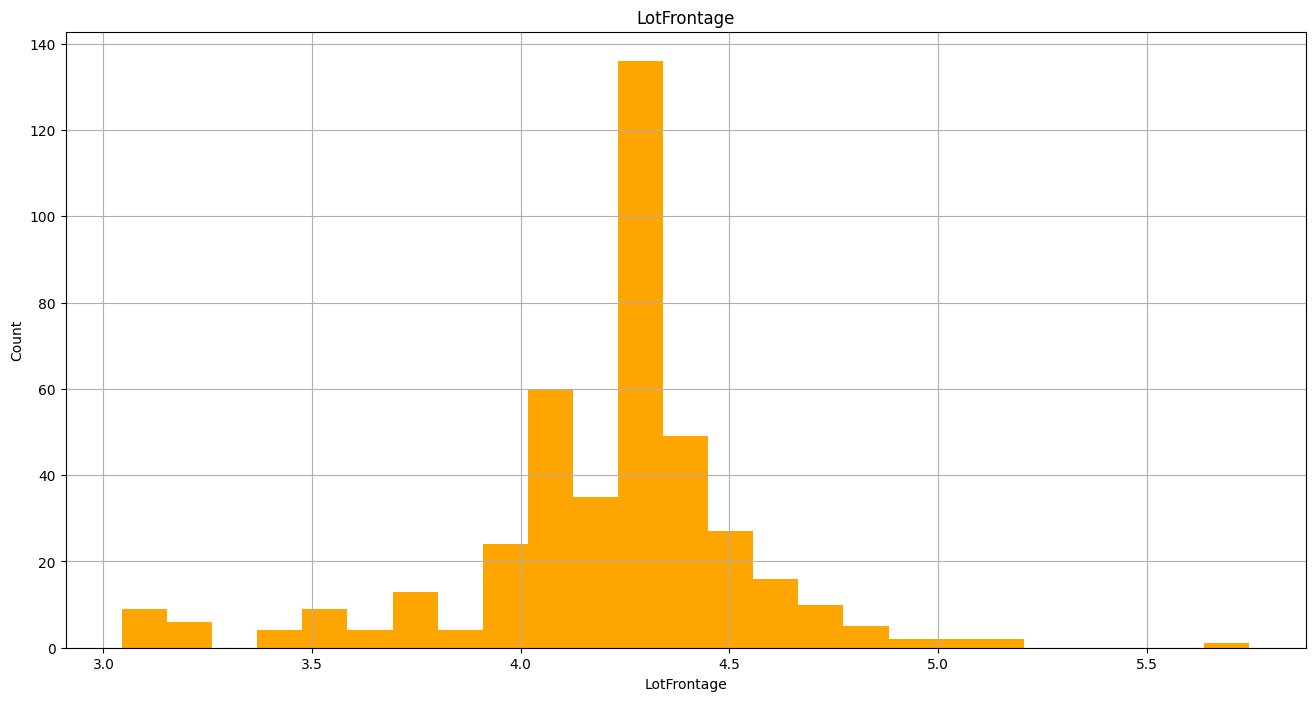

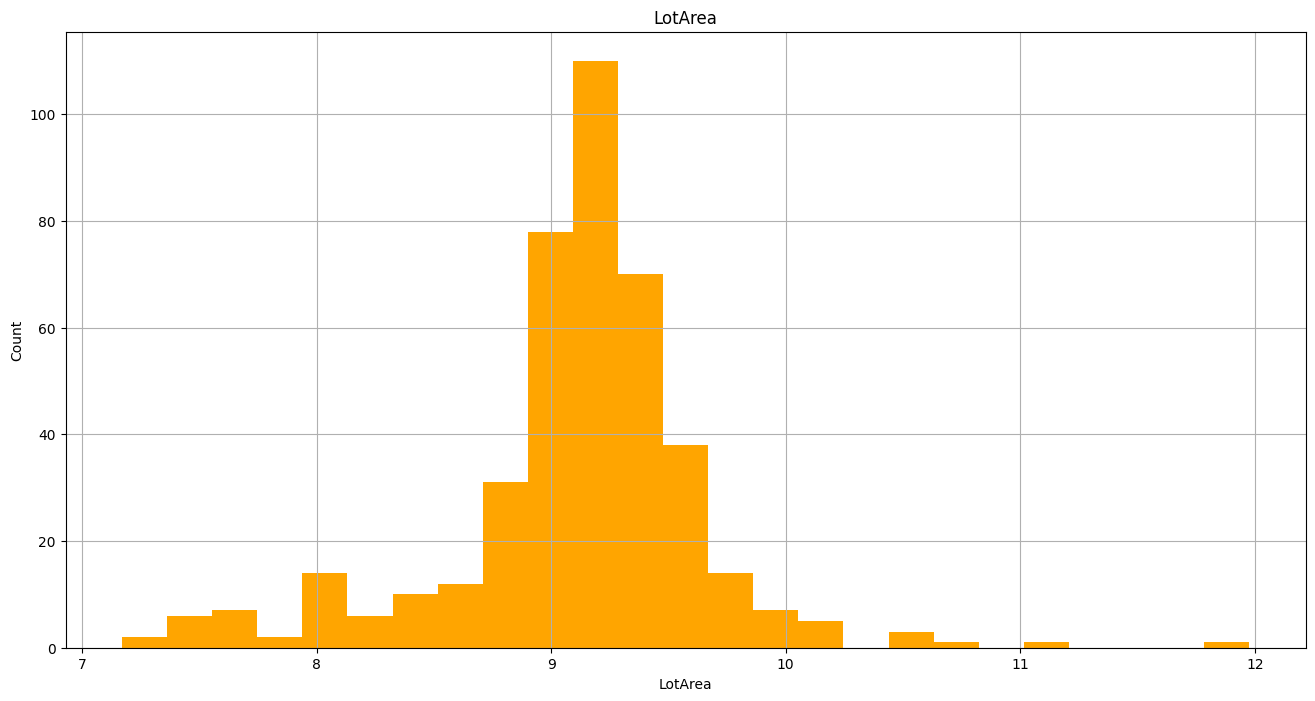

Skipped! Feature 'MasVnrArea' contains zero.
Skipped! Feature 'BsmtFinSF1' contains zero.
Skipped! Feature 'BsmtFinSF2' contains zero.
Skipped! Feature 'BsmtUnfSF' contains zero.
Skipped! Feature 'TotalBsmtSF' contains zero.


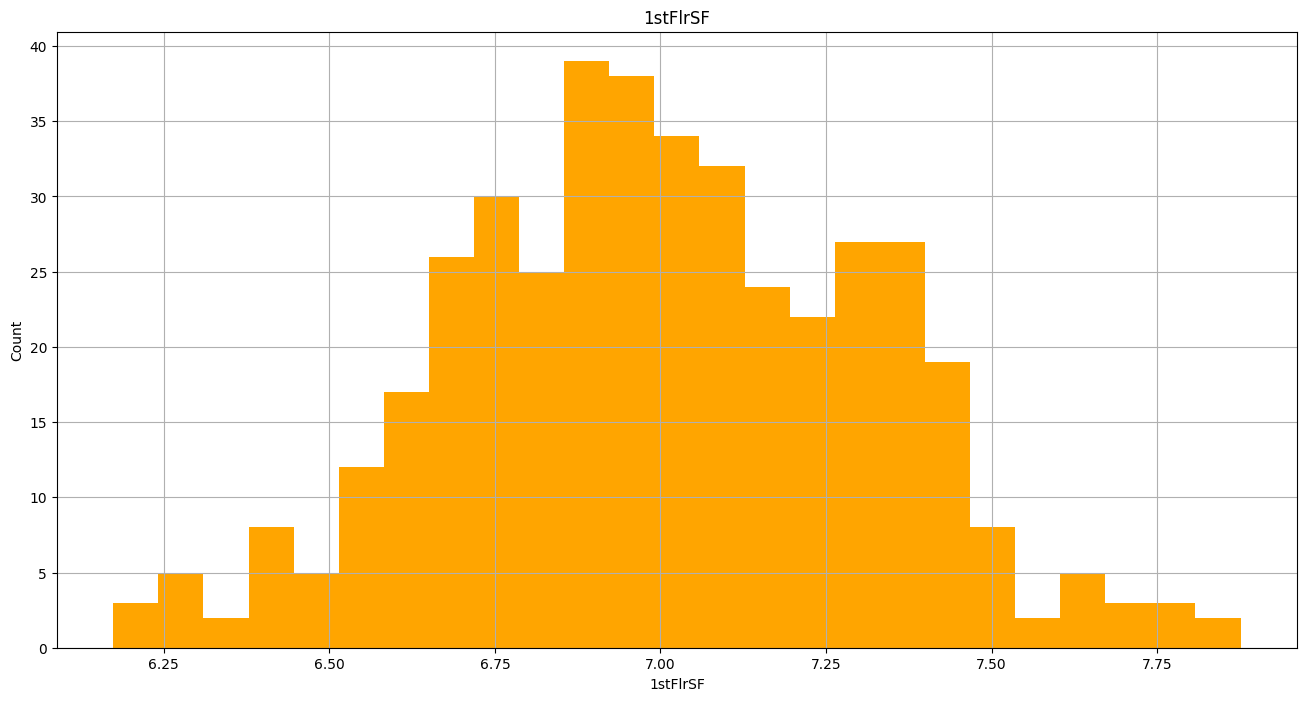

Skipped! Feature '2ndFlrSF' contains zero.
Skipped! Feature 'LowQualFinSF' contains zero.


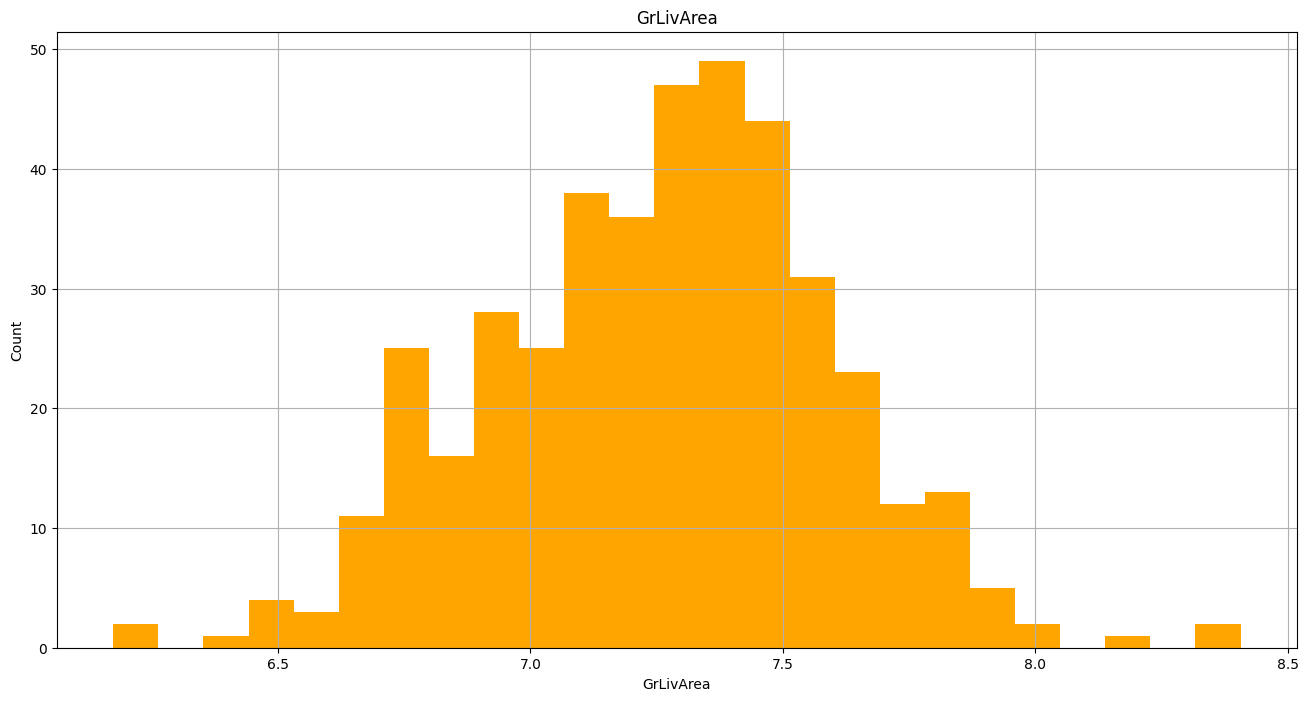

Skipped! Feature 'GarageArea' contains zero.
Skipped! Feature 'WoodDeckSF' contains zero.
Skipped! Feature 'OpenPorchSF' contains zero.
Skipped! Feature 'EnclosedPorch' contains zero.
Skipped! Feature '3SsnPorch' contains zero.
Skipped! Feature 'ScreenPorch' contains zero.
Skipped! Feature 'PoolArea' contains zero.
Skipped! Feature 'MiscVal' contains zero.


In [134]:
# For each continuous feature, apply the natural logarithm transformation if the feature contains non-zero values

for feature in continuous_features_u:
    # Create a copy of the dataset to avoid modifying the original
    df_u = df_unseen.copy()
    
    # Check if the feature contains zero
    if 0 in df_u[feature].unique():
        pass
        print("Skipped! Feature '{}' contains zero.".format(feature))
    else:
        # Apply the natural logarithm transformation
        df_u[feature] = np.log(df_u[feature])
        
        # Plot a histogram for the transformed feature with 25 bins
        df_u[feature].hist(bins=25, color="orange")
        
        # Set the labels for the x and y axes
        plt.xlabel(feature)
        plt.ylabel("Count")
        
        # Set the title of the plot
        plt.title(feature)
        
        # Display the histogram
        plt.show()

### 4. Handling Outliers

In [135]:
# Create a list of numerical variables § year variables § discrete variables in the train dataset
numerical_features_u = [feature for feature in df_u.columns if df_u[feature].dtypes != 'O']
year_feature_u = [feature for feature in numerical_features_u if "Yr" in feature or "Year" in feature]
discrete_features_u = [feature for feature in numerical_features_u if len(df_u[feature].unique()) < 25 and feature not in year_feature_u + ['Id']]

# Print the number of numerical variables in the train dataset
print('Number of numerical variables (in the test dataset): ', len(numerical_features_u))

Number of numerical variables (in the test dataset):  35


In [136]:
# Identify continuous numerical features by excluding discrete, year-related, and 'index' variables
continuous_features_u = [feature for feature in numerical_features_u if feature not in discrete_features_u + year_feature_u + ["index"]]

# Print the count of continuous features
print("Continuous Feature Count (in the test dataset): {}".format(len(continuous_features_u)))

Continuous Feature Count (in the test dataset): 15


Observe the outliers in the train dataset by drawing Box Plots:

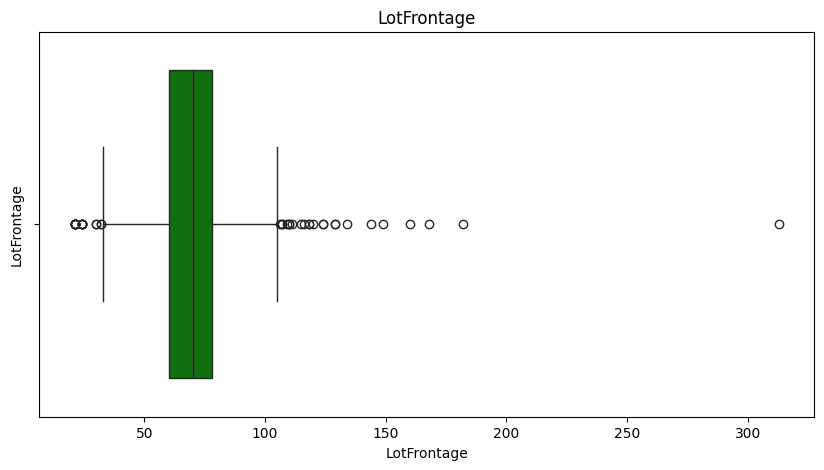

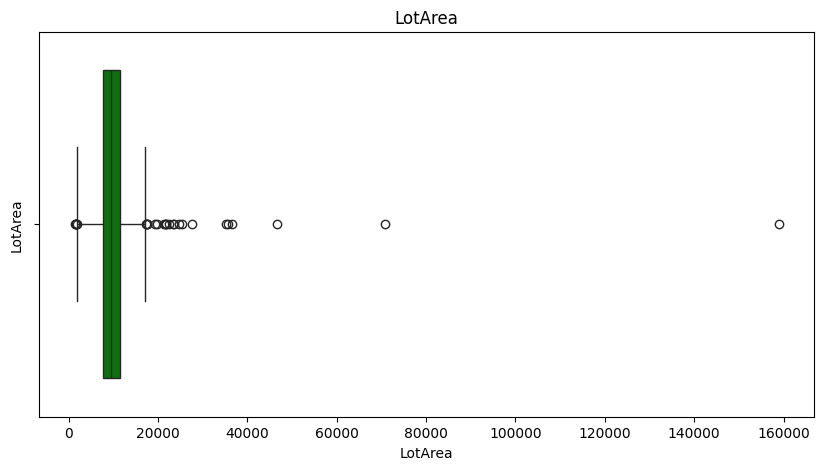

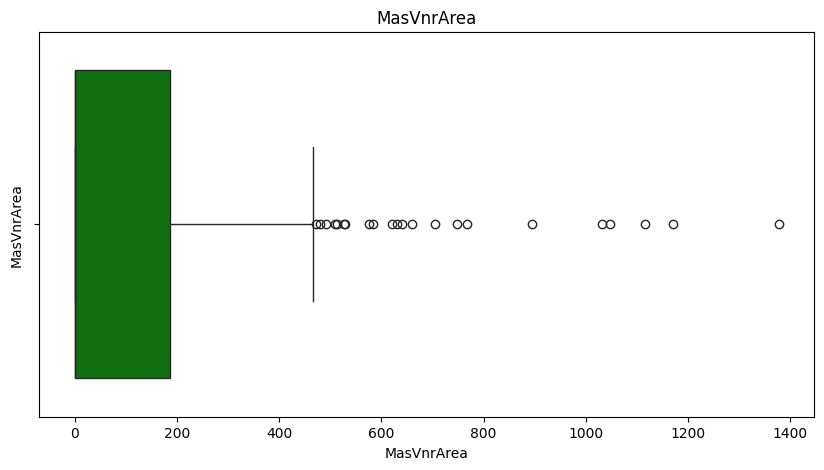

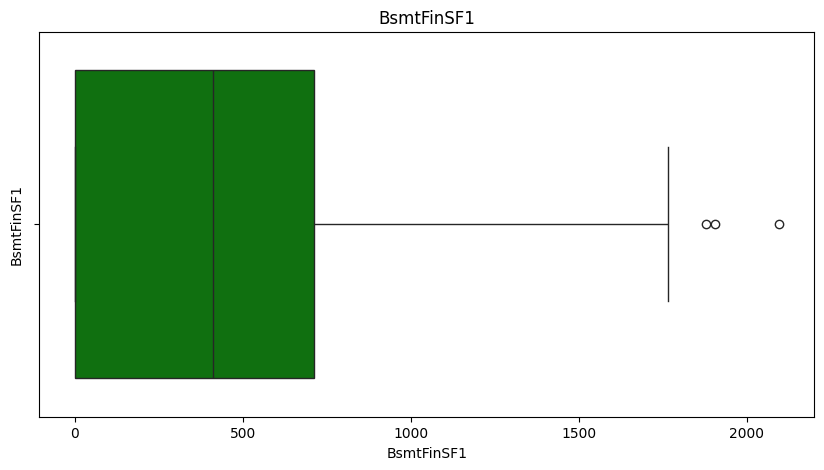

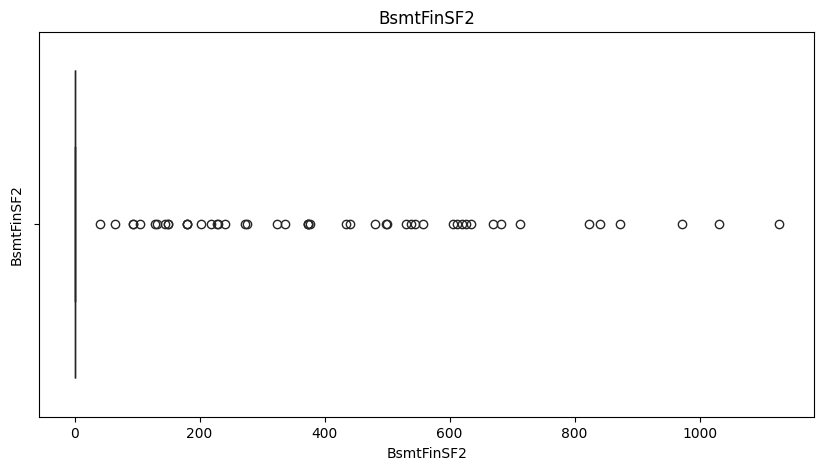

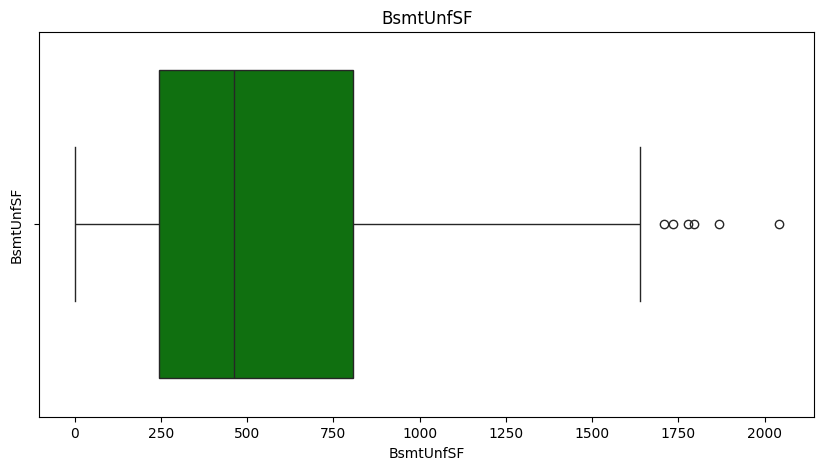

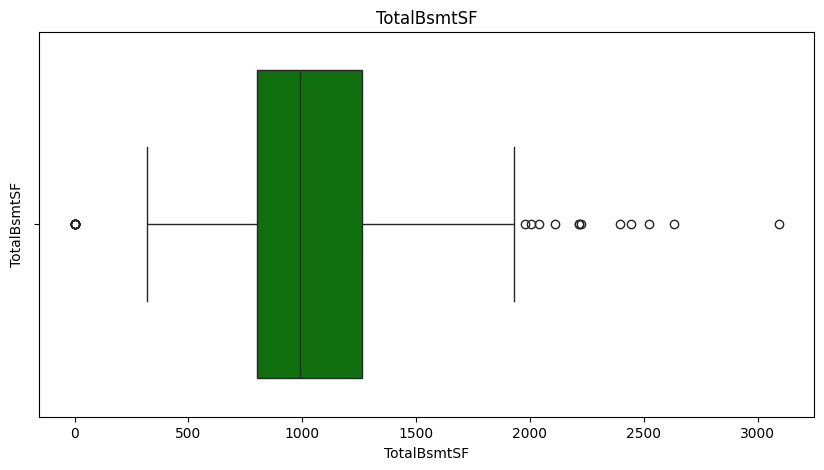

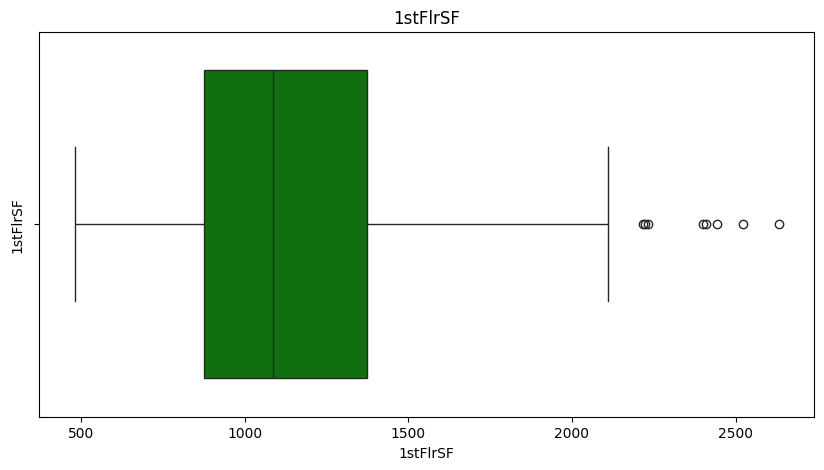

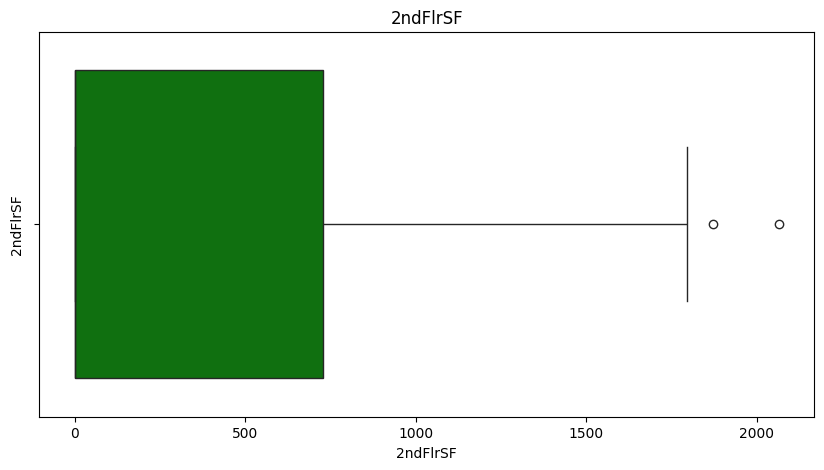

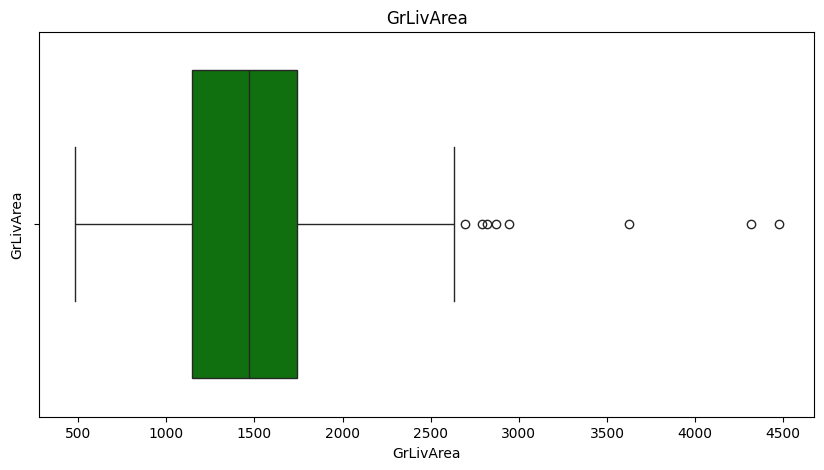

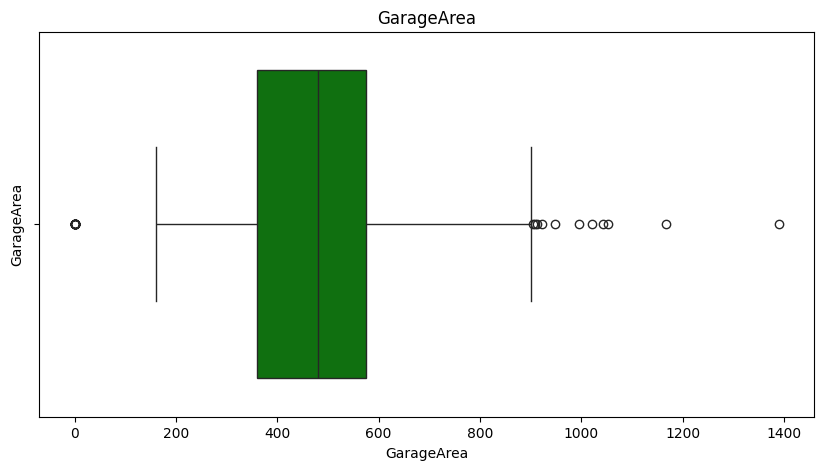

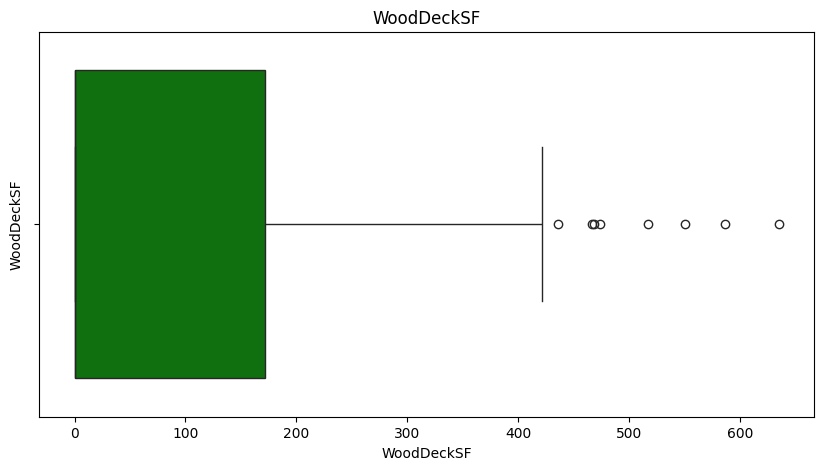

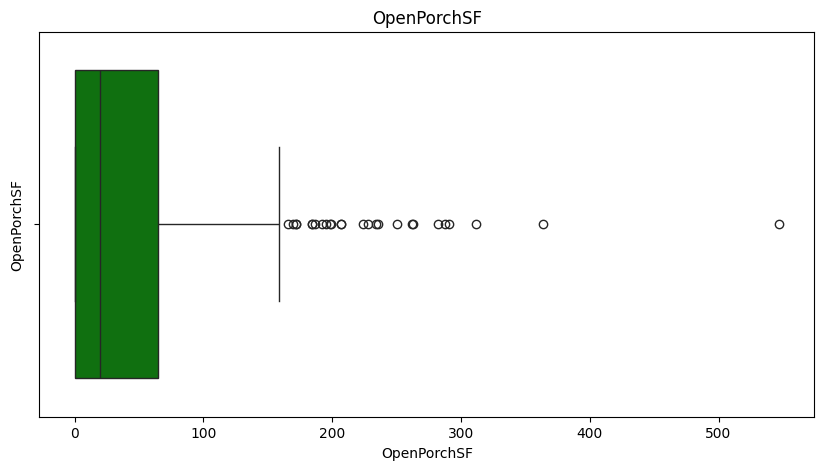

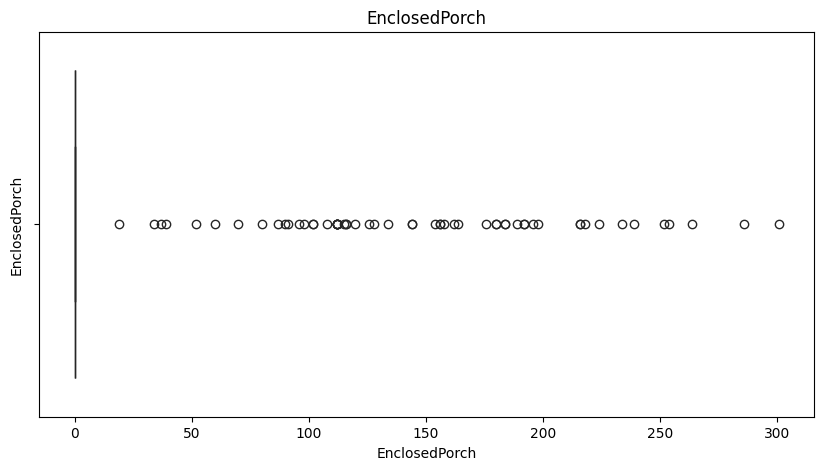

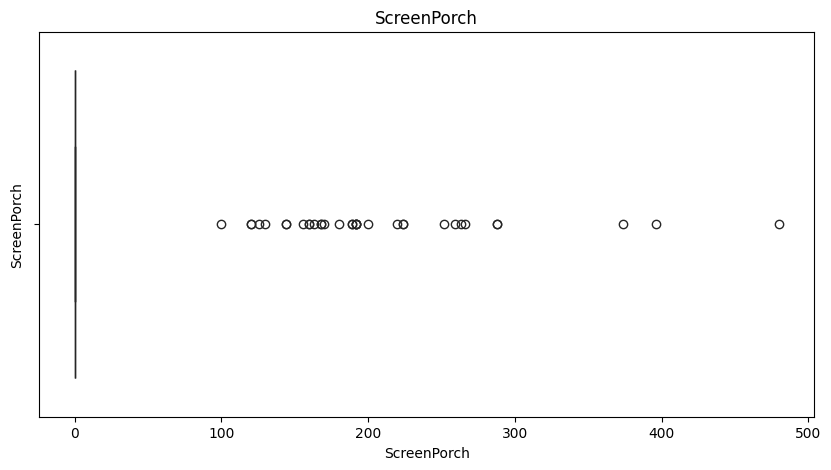

In [137]:
# Set the default figure size for plots using Matplotlib
plt.rcParams["figure.figsize"] = (10, 5)

# Iterate over each continuous feature in the list 'continuous_feature_u'
for feature in continuous_features_u:
    # Create a horizontal box plot (box-and-whisker plot) for the current feature
    sns.boxplot(df_u[feature], orient='h', color="green")
    
    # Set the y-axis label to the name of the current feature
    plt.ylabel(feature)
    
    # Set the title of the plot to the name of the current feature
    plt.title(feature)
    
    # Display the plot
    plt.show()


Cap the outliers in the test dataset via min-max method:

In [138]:
# For each continuous numerical variable in the train dataset
for column in continuous_features_u:
    # Calculate the lower and upper limits (e.g., 5th and 95th percentiles)
    q1 = df_u[column].quantile(0.25)
    q3 = df_u[column].quantile(0.75)

    IQR = q3 - q1

    lower_limit = q1 - 1.5*IQR
    upper_limit = q3 + 1.5*IQR

    # Print(column, lower_limit, upper_limit)

    # Cap values below the lower limit to the lower limit
    df_u[column] = df_u[column].apply(lambda x: lower_limit if x < lower_limit else x)
    
    # Cap values above the upper limit to the upper limit
    df_u[column] = df_u[column].apply(lambda x: upper_limit if x > upper_limit else x)

# Show the results
df_u[continuous_features_u].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,33.0,3182.0,0.0,0.0,0.0,600.0,600.0,600.0,600.0,1200.0,480.0,0.0,161.875,0.0,0.0
1,70.0,8400.0,0.0,187.0,0.0,0.0,814.0,913.0,0.0,913.0,240.0,0.0,0.000,0.0,0.0
2,90.0,11248.0,215.0,1059.0,0.0,567.0,1626.0,1668.0,0.0,1668.0,702.0,257.0,45.000,0.0,0.0
3,71.0,9204.0,0.0,25.0,0.0,247.0,1144.0,1144.0,0.0,1144.0,336.0,0.0,88.000,0.0,0.0
4,89.0,11645.0,0.0,0.0,0.0,860.0,860.0,860.0,860.0,1720.0,565.0,0.0,70.000,0.0,0.0


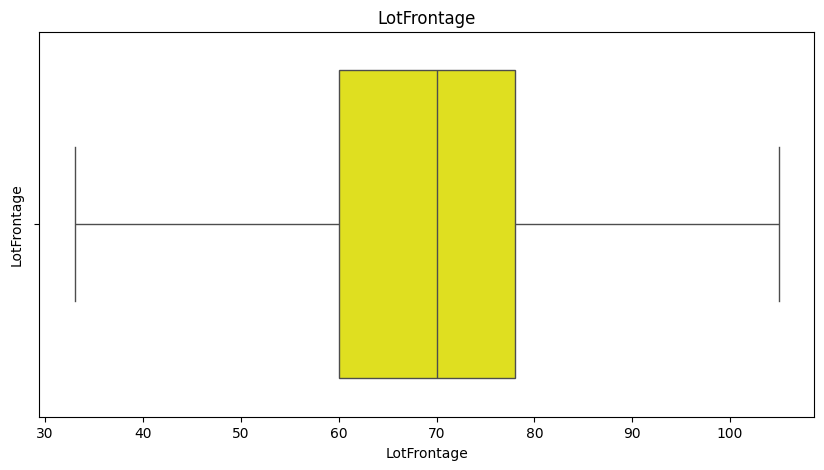

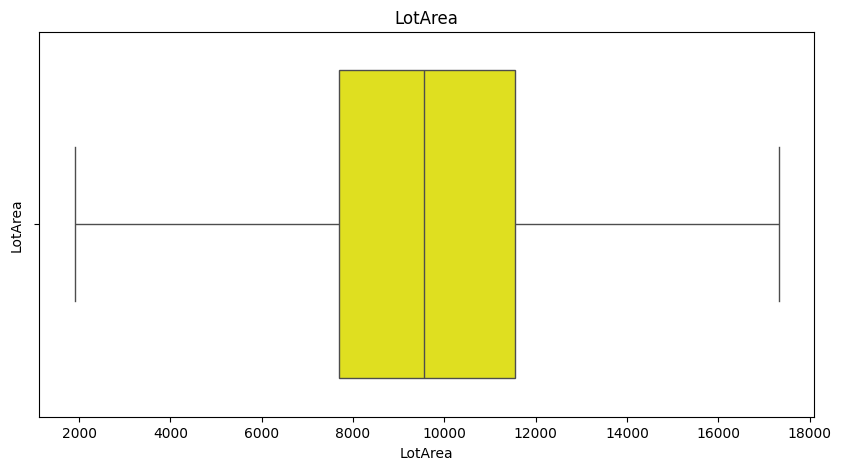

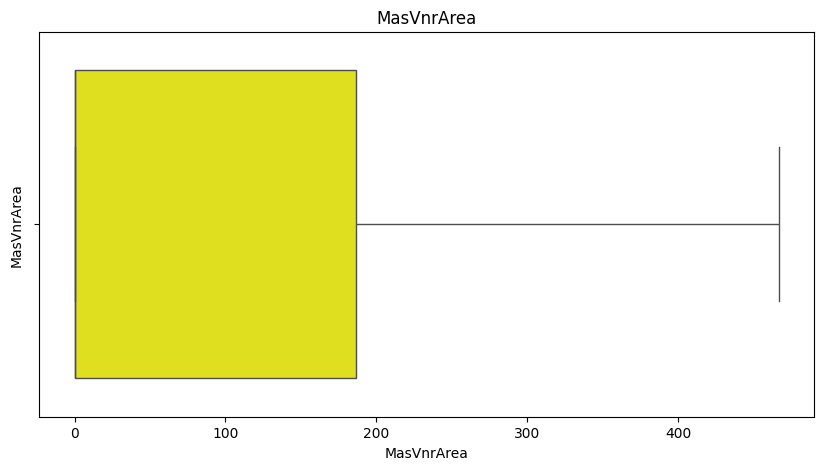

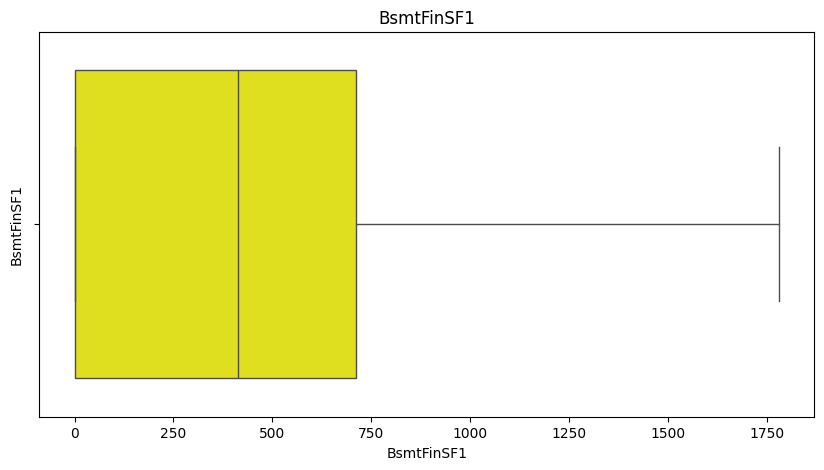

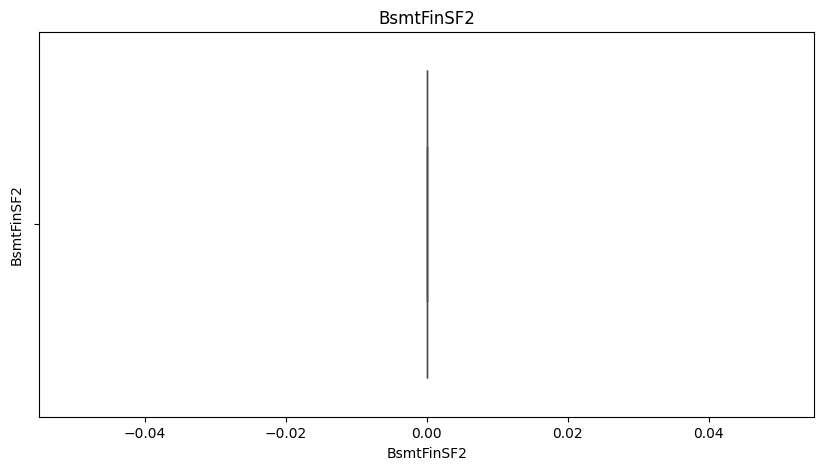

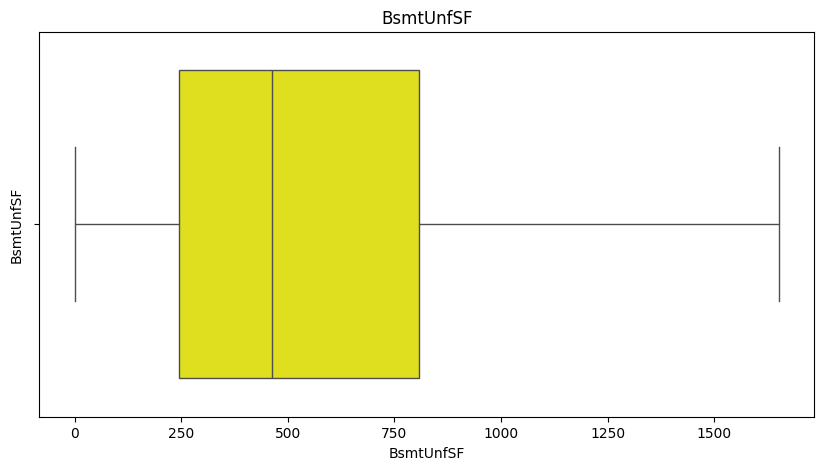

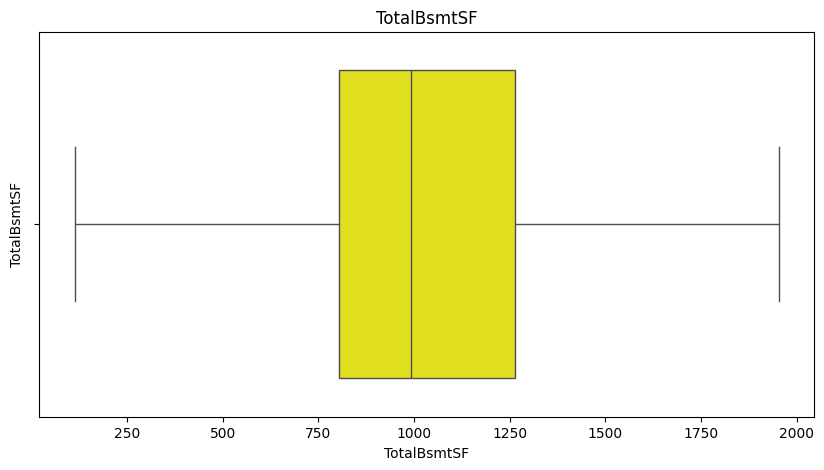

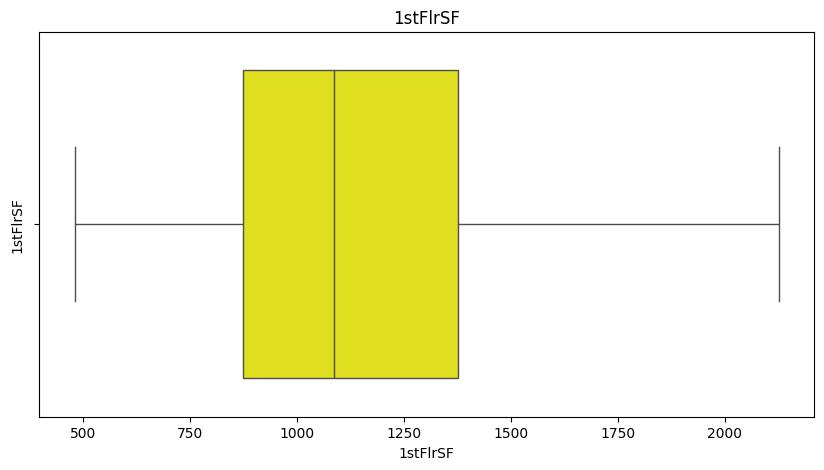

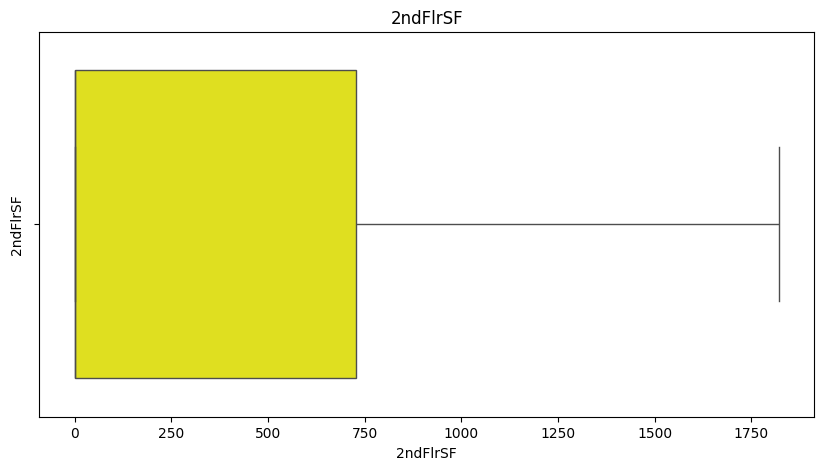

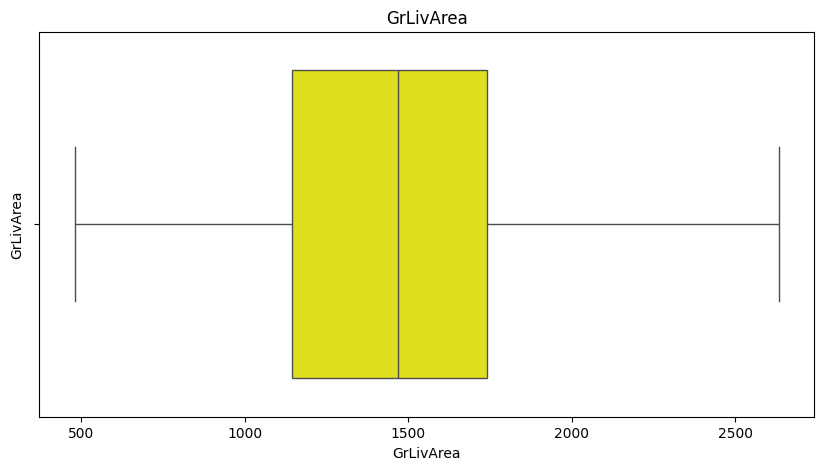

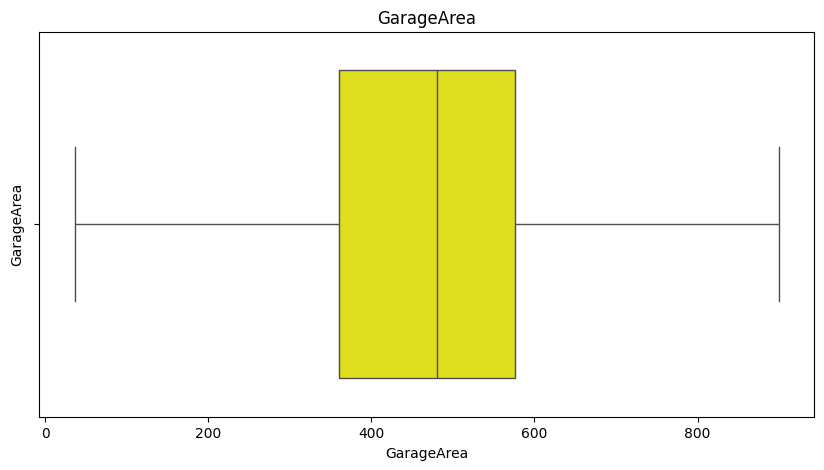

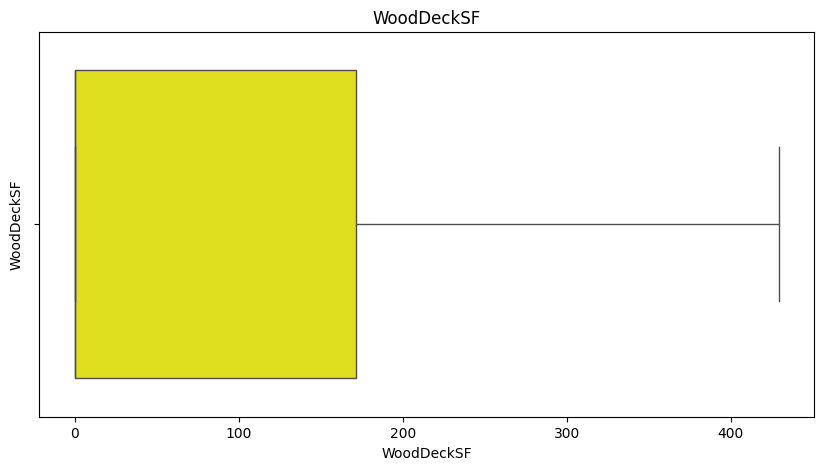

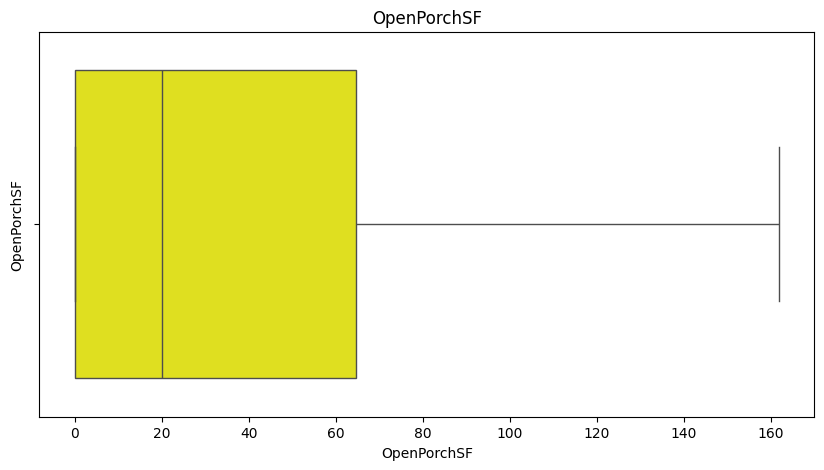

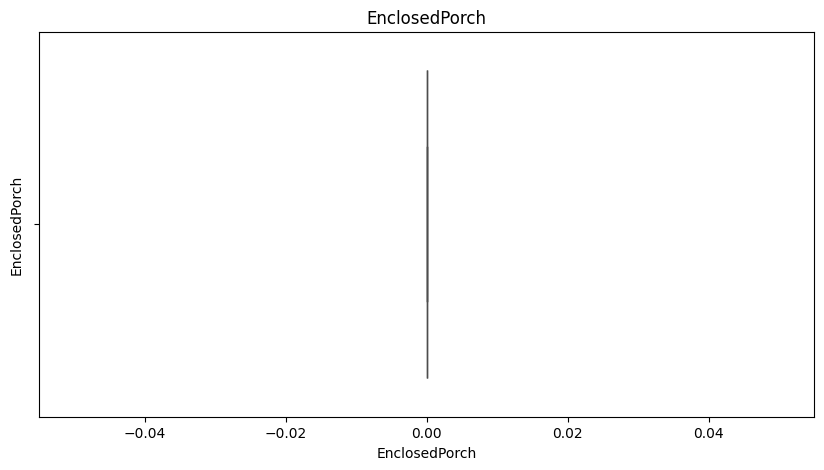

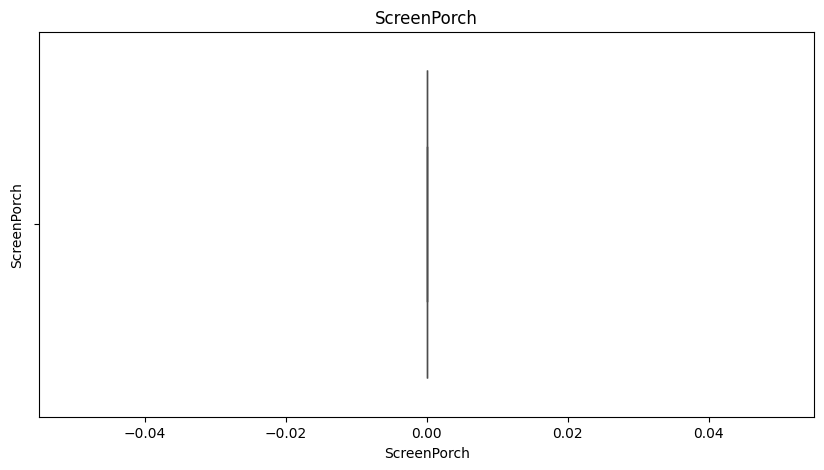

In [139]:
# Observe outliers after capping
# Set the default figure size for plots using Matplotlib
plt.rcParams["figure.figsize"] = (10, 5)

# Iterate over each continuous feature in the list 'continuous_features_t'
for feature in continuous_features_u:
    # Define the color you want to use for the box plot
    boxplot_color = 'yellow'  # Change this to the desired color
    
    # Create a horizontal box plot (box-and-whisker plot) for the current feature with the specified color
    sns.boxplot(df_u[feature], orient='h', color=boxplot_color)
    
    # Set the y-axis label to the name of the current feature
    plt.ylabel(feature)
    
    # Set the title of the plot to the name of the current feature
    plt.title(feature)
    
    # Display the plot
    plt.show()

### 5. Encoding Categorical Variables

In [140]:
# Use len to get the number of categorical features
len(categorical_features_u)

44

In [141]:
df_u[categorical_features_u].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,160,FV,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,Gable,CompShg,MetalSd,MetalSd,NA,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Detchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1,85,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,Gable,CompShg,VinylSd,VinylSd,NA,TA,TA,CBlock,TA,TA,Gd,LwQ,Rec,GasA,Gd,Y,SBrkr,TA,Typ,NA,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,Normal
2,20,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Hip,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,NA,NA,NA,WD,Normal
3,20,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,NA,TA,TA,CBlock,TA,TA,No,BLQ,Rec,GasA,TA,Y,SBrkr,TA,Typ,NA,Detchd,Unf,TA,TA,Y,NA,NA,NA,COD,Normal
4,60,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NA,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal


0-1 Encoding:

In [142]:
# 'Street' 0-1 Encoding
#Since the 'Street' variable has 2 categories (Gravel and Pave),  0-1 transformation was used.
lbe = LabelEncoder()
lbe.fit_transform(df_u["Street"])
df_u["new_Street"] = lbe.fit_transform(df_u["Street"])

In [143]:
# 'CentralAir' 0-1 Encoding
lbe = LabelEncoder() 
lbe.fit_transform(df_u["CentralAir"])
df_u["new_CentralAir"] = lbe.fit_transform(df_u["CentralAir"])

In [144]:
df_u.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,new_Street,new_CentralAir
0,160,FV,33.0,3182.0,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2004,2005,Gable,CompShg,MetalSd,MetalSd,NA,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,600.0,600.0,GasA,Ex,Y,SBrkr,600.0,600.0,0,1200.0,0,0,2,1,2,1,Gd,4,Typ,0,NA,Detchd,2004.0,RFn,2,480.0,TA,TA,Y,0.0,161.875,0.0,0,0.0,0,NA,NA,NA,0,6,2010,WD,Normal,1,1
1,85,RL,70.0,8400.0,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,6,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,CBlock,TA,TA,Gd,LwQ,187.0,Rec,0.0,0.0,814.0,GasA,Gd,Y,SBrkr,913.0,0.0,0,913.0,1,0,1,0,3,1,TA,6,Typ,0,NA,Detchd,1990.0,Unf,1,240.0,TA,TA,Y,0.0,0.000,0.0,0,0.0,0,NA,NA,NA,0,5,2007,WD,Normal,1,1
2,20,RL,90.0,11248.0,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,9,5,2002,2002,Hip,CompShg,VinylSd,VinylSd,Stone,215.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1059.0,Unf,0.0,567.0,1626.0,GasA,Ex,Y,SBrkr,1668.0,0.0,0,1668.0,1,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,Fin,3,702.0,TA,TA,Y,257.0,45.000,0.0,0,0.0,0,NA,NA,NA,0,7,2007,WD,Normal,1,1
3,20,RL,71.0,9204.0,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1963,1963,Gable,CompShg,HdBoard,HdBoard,NA,0.0,TA,TA,CBlock,TA,TA,No,BLQ,25.0,Rec,0.0,247.0,1144.0,GasA,TA,Y,SBrkr,1144.0,0.0,0,1144.0,1,0,1,1,3,1,TA,6,Typ,0,NA,Detchd,1962.0,Unf,1,336.0,TA,TA,Y,0.0,88.000,0.0,0,0.0,0,NA,NA,NA,0,8,2008,COD,Normal,1,1
4,60,RL,89.0,11645.0,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,NA,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,860.0,860.0,GasA,Ex,Y,SBrkr,860.0,860.0,0,1720.0,0,0,2,1,3,1,Gd,7,Typ,0,NA,Attchd,2004.0,RFn,2,565.0,TA,TA,Y,0.0,70.000,0.0,0,0.0,0,NA,NA,NA,0,8,2006,WD,Normal,1,1


Ordinal Encoding:

In ordinal encoding method, all features that contains NA are started from 0.

In [145]:
# 'LotShape' Ordinal Encoding
ordinal_mapping = {"IR3": 1, "IR2": 2, "IR1": 3, "Reg": 4}
df_u["new_LotShape"] = df_u["LotShape"].map(ordinal_mapping)

In [146]:
# 'LandContour' Ordinal Encoding
ordinal_mapping = {"Low": 1, "HLS": 2, "Bnk": 3, "Lvl": 4}
df_u["new_LandContour"] = df_u["LandContour"].map(ordinal_mapping)

In [147]:
# 'LandSlope' Ordinal Encoding
ordinal_mapping = {"Gtl": 1, "Mod": 2, "Sev": 3}
df_u["new_LandSlope"] = df_u["LandSlope"].map(ordinal_mapping)

In [148]:
# 'ExterQual' Ordinal Encoding
ordinal_mapping = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df_u["new_ExterQual"] = df_u["ExterQual"].map(ordinal_mapping)

In [149]:
# 'ExterCond' Ordinal Encoding
ordinal_mapping = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df_u["new_ExterCond"] = df_u["ExterCond"].map(ordinal_mapping)

In [150]:
# 'BsmtQual' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df_u["new_BsmtQual"] = df_u["BsmtQual"].map(ordinal_mapping)

In [151]:
# 'BsmtCond' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df_u["new_BsmtCond"] = df_u["BsmtCond"].map(ordinal_mapping)

In [152]:
# 'BsmtExposure' Ordinal Encoding
ordinal_mapping = {"NA": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}
df_u["new_BsmtExposure"] = df_u["BsmtExposure"].map(ordinal_mapping)

In [153]:
# 'BsmtFinType1' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
df_u["new_BsmtFinType1"] = df_u["BsmtFinType1"].map(ordinal_mapping)

In [154]:
# 'BsmtFinType2' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
df_u["new_BsmtFinType2"] = df_u["BsmtFinType2"].map(ordinal_mapping)

In [155]:
# 'HeatingQC' Ordinal Encoding
ordinal_mapping = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df_u["new_HeatingQC"] = df_u["HeatingQC"].map(ordinal_mapping)

In [156]:
# 'KitchenQual' Ordinal Encoding
ordinal_mapping = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df_u["new_KitchenQual"] = df_u["KitchenQual"].map(ordinal_mapping)

In [157]:
# 'Functional' Ordinal Encoding
ordinal_mapping = {"Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 7}
df_u["new_Functional"] = df_u["Functional"].map(ordinal_mapping)

In [158]:
# 'FireplaceQu' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df_u["new_FireplaceQu"] = df_u["FireplaceQu"].map(ordinal_mapping)

In [159]:
# 'GarageFinish' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Unf": 1, "RFn": 2, "Fin": 3}
df_u["new_GarageFinish"] = df_u["GarageFinish"].map(ordinal_mapping)

In [160]:
# 'GarageQual' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df_u["new_GarageQual"] = df_u["GarageQual"].map(ordinal_mapping)

In [161]:
# 'GarageCond' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df_u["new_GarageCond"] = df_u["GarageCond"].map(ordinal_mapping)

In [162]:
# 'PavedDrive' Ordinal Encoding
ordinal_mapping = {"N": 1, "P": 2, "Y": 3}
df_u["new_PavedDrive"] = df_u["PavedDrive"].map(ordinal_mapping)

In [163]:
# 'PoolQC' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}
df_u["new_PoolQC"] = df_u["PoolQC"].map(ordinal_mapping)

In [164]:
# 'Utilities' Ordinal Encoding
ordinal_mapping = {"ELO": 1, "NoSeWa": 2, "NoSewr": 3, "AllPub": 4}
df_u["new_Utilities"] = df_u["Utilities"].map(ordinal_mapping)

Label Encoding:

In [165]:
label_encode_columns(df_u, ["Fence", "MSSubClass", "MSZoning", "Alley", "LotConfig", "Neighborhood",
            "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", 
            "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation",
            "Heating", "Electrical", "GarageType", "MiscFeature", "SaleType", "SaleCondition"])


In [166]:
df_u.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,new_Street,new_CentralAir,new_LotShape,new_LandContour,new_LandSlope,new_ExterQual,new_ExterCond,new_BsmtQual,new_BsmtCond,new_BsmtExposure,new_BsmtFinType1,new_BsmtFinType2,new_HeatingQC,new_KitchenQual,new_Functional,new_FireplaceQu,new_GarageFinish,new_GarageQual,new_GarageCond,new_PavedDrive,new_PoolQC,new_Utilities,new_Fence,new_MSSubClass,new_MSZoning,new_Alley,new_LotConfig,new_Neighborhood,new_Condition1,new_Condition2,new_BldgType,new_HouseStyle,new_RoofStyle,new_RoofMatl,new_Exterior1st,new_Exterior2nd,new_MasVnrType,new_Foundation,new_Heating,new_Electrical,new_GarageType,new_MiscFeature,new_SaleType,new_SaleCondition
0,160,FV,33.0,3182.0,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2004,2005,Gable,CompShg,MetalSd,MetalSd,NA,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,600.0,600.0,GasA,Ex,Y,SBrkr,600.0,600.0,0,1200.0,0,0,2,1,2,1,Gd,4,Typ,0,NA,Detchd,2004.0,RFn,2,480.0,TA,TA,Y,0.0,161.875,0.0,0,0.0,0,NA,NA,NA,0,6,2010,WD,Normal,1,1,4,4,1,4,3,4,3,1,1,1,5,4,7,0,2,3,3,3,0,4,4,1,1,2,4,21,2,2,4,4,1,0,5,8,2,2,0,2,5,1,7,4
1,85,RL,70.0,8400.0,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,6,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,CBlock,TA,TA,Gd,LwQ,187.0,Rec,0.0,0.0,814.0,GasA,Gd,Y,SBrkr,913.0,0.0,0,913.0,1,0,1,0,3,1,TA,6,Typ,0,NA,Detchd,1990.0,Unf,1,240.0,TA,TA,Y,0.0,0.000,0.0,0,0.0,0,NA,NA,NA,0,5,2007,WD,Normal,1,1,4,4,1,3,3,3,3,4,2,3,4,3,7,0,1,3,3,3,0,4,4,13,3,1,4,19,2,2,0,5,1,0,8,12,2,1,0,2,5,1,7,4
2,20,RL,90.0,11248.0,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,9,5,2002,2002,Hip,CompShg,VinylSd,VinylSd,Stone,215.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1059.0,Unf,0.0,567.0,1626.0,GasA,Ex,Y,SBrkr,1668.0,0.0,0,1668.0,1,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,Fin,3,702.0,TA,TA,Y,257.0,45.000,0.0,0,0.0,0,NA,NA,NA,0,7,2007,WD,Normal,1,1,3,4,1,4,3,4,3,3,6,1,5,4,7,3,3,3,3,3,0,4,4,4,3,1,0,5,2,2,0,2,3,0,8,12,3,2,0,2,1,1,7,4
3,20,RL,71.0,9204.0,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1963,1963,Gable,CompShg,HdBoard,HdBoard,NA,0.0,TA,TA,CBlock,TA,TA,No,BLQ,25.0,Rec,0.0,247.0,1144.0,GasA,TA,Y,SBrkr,1144.0,0.0,0,1144.0,1,0,1,1,3,1,TA,6,Typ,0,NA,Detchd,1962.0,Unf,1,336.0,TA,TA,Y,0.0,88.000,0.0,0,0.0,0,NA,NA,NA,0,8,2008,COD,Normal,1,1,4,4,1,3,3,3,3,1,4,3,3,3,7,0,1,3,3,3,0,4,4,4,3,1,4,12,2,2,0,2,1,0,4,6,2,1,0,2,5,1,0,4
4,60,RL,89.0,11645.0,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,NA,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,860.0,860.0,GasA,Ex,Y,SBrkr,860.0,860.0,0,1720.0,0,0,2,1,3,1,Gd,7,Typ,0,NA,Attchd,2004.0,RFn,2,565.0,TA,TA,Y,0.0,70.000,0.0,0,0.0,0,NA,NA,NA,0,8,2006,WD,Normal,1,1,3,4,1,4,3,4,3,1,1,1,5,4,7,0,2,3,3,3,0,4,4,9,3,1,0,5,2,2,0,4,1,0,8,12,2,2,0,2,1,1,7,4


In [167]:
# Print the shape of the dataset, which represents the number of rows and columns
print(df_u.shape)

# Observe that 44 new columns have been added

(418, 123)


### 6. Exploring Distribution Situations (Skewness & Kurtosis)

BsmtFinSF2, EnclosedPorch, ScreenPorch these columns output nan values. Therefore, Skewness and Kurtosis will not be applied.

In [168]:
# Remove "BsmtFinSF2" from the list
continuous_features_u.remove("BsmtFinSF2")

# Remove "EnclosedPorch" from the list
continuous_features_u.remove("EnclosedPorch")

# Remove "ScreenPorch" from the list
continuous_features_u.remove("ScreenPorch")

# The updated list of continuous features
continuous_features_u

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

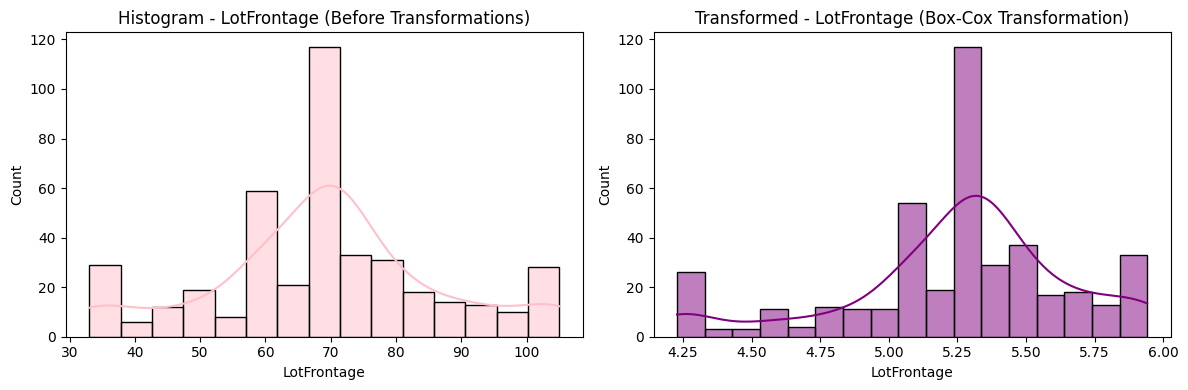

LotFrontage: Skewness (Before): 0.009478192894402625, Kurtosis (Before): 0.003802886234320013
LotFrontage: Skewness (After): -0.7259556697774946, Kurtosis (After): 0.5494171414384903


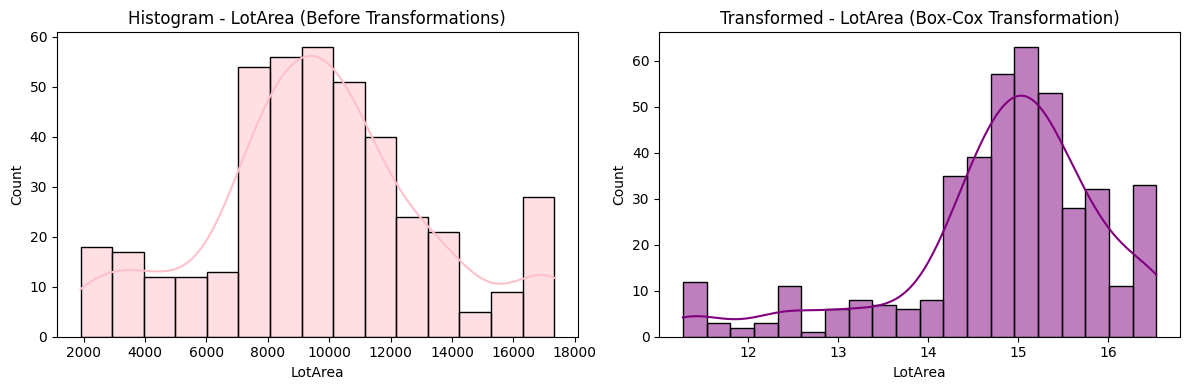

LotArea: Skewness (Before): 0.0799240981485457, Kurtosis (Before): -0.017153899049594745
LotArea: Skewness (After): -1.2104156493396179, Kurtosis (After): 1.6691603010010656


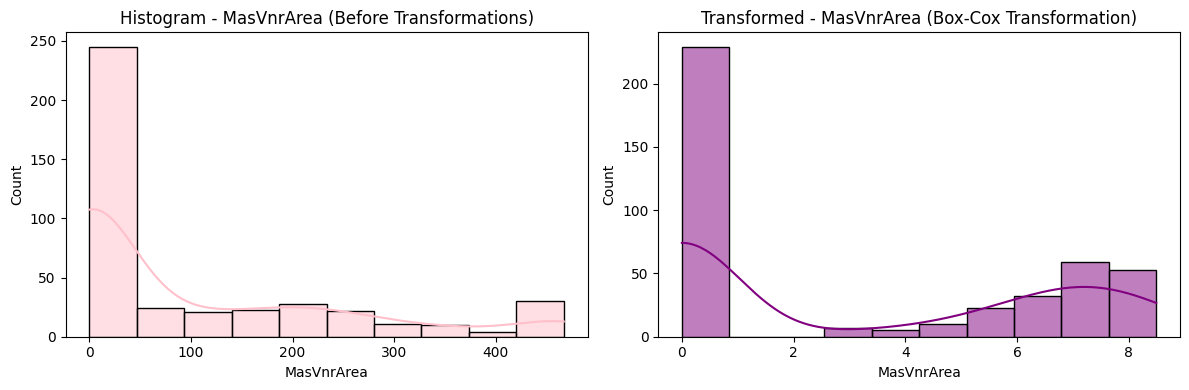

MasVnrArea: Skewness (Before): 1.2937493909168876, Kurtosis (Before): 0.47728557468703503
MasVnrArea: Skewness (After): 0.366828879146426, Kurtosis (After): -1.7025061936541983


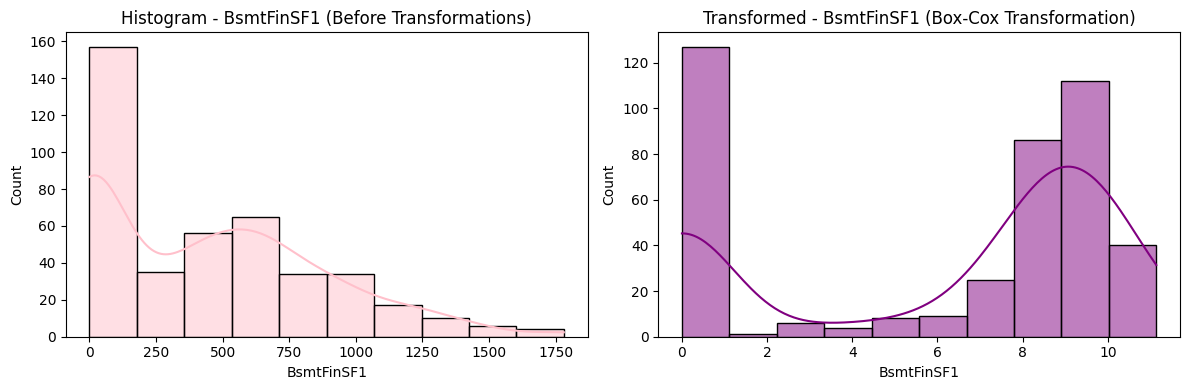

BsmtFinSF1: Skewness (Before): 0.7012792276891733, Kurtosis (Before): -0.19864419979827508
BsmtFinSF1: Skewness (After): -0.6006510667732763, Kurtosis (After): -1.431995187289722


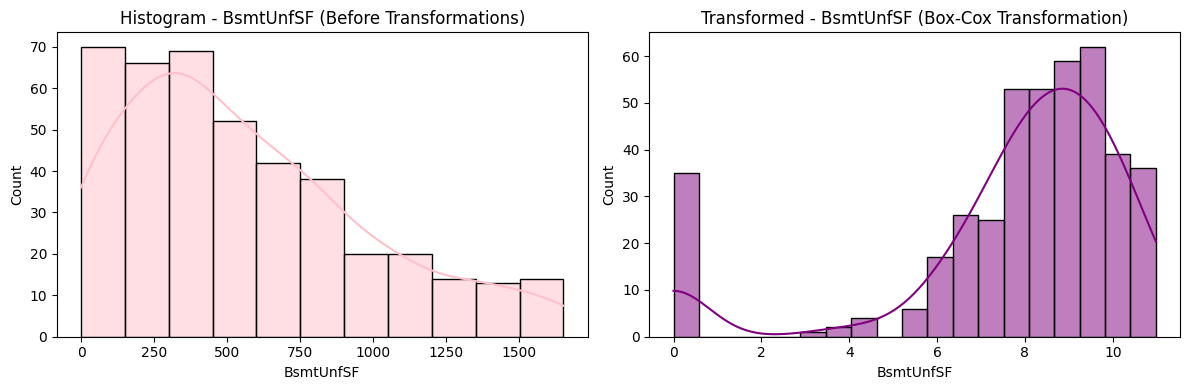

BsmtUnfSF: Skewness (Before): 0.7672006911194177, Kurtosis (Before): -0.11577774566544718
BsmtUnfSF: Skewness (After): -1.8096948877937156, Kurtosis (After): 2.796261212706728


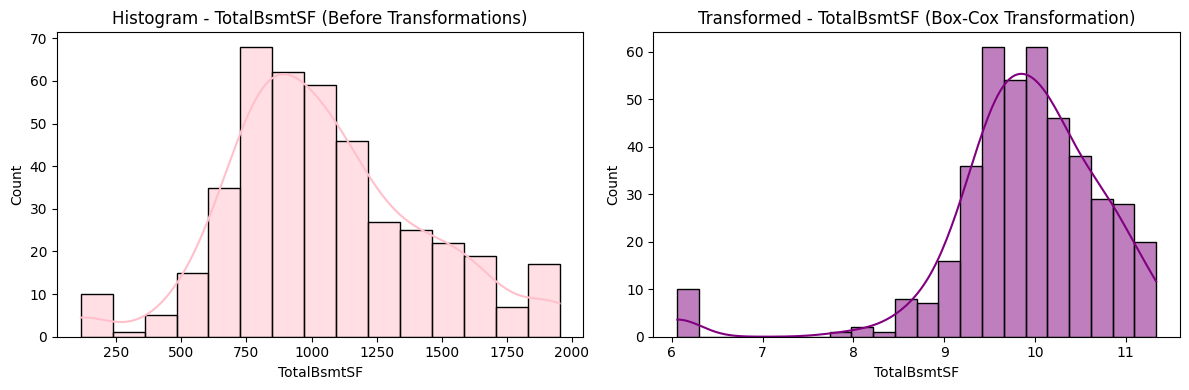

TotalBsmtSF: Skewness (Before): 0.30431711271341255, Kurtosis (Before): 0.1972808650373139
TotalBsmtSF: Skewness (After): -1.8025539339408911, Kurtosis (After): 6.318291378553843


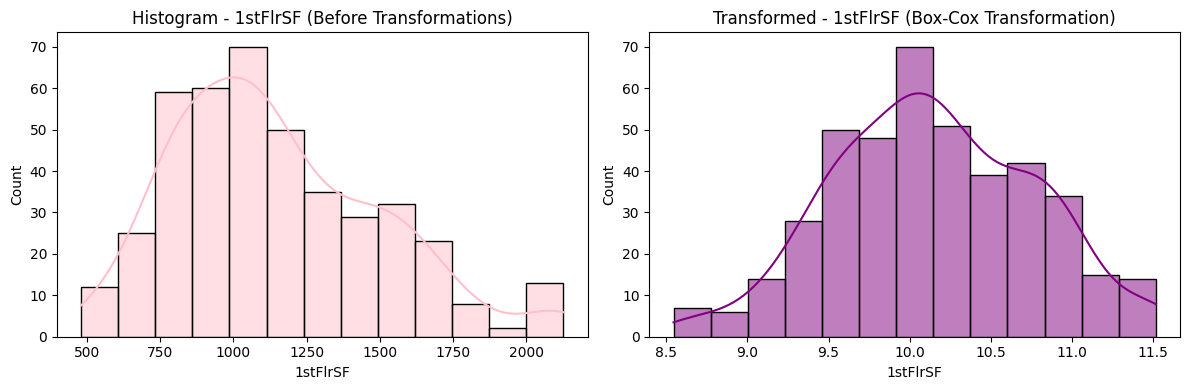

1stFlrSF: Skewness (Before): 0.6566655711480668, Kurtosis (Before): 0.0327909174658938
1stFlrSF: Skewness (After): 0.010814020938916478, Kurtosis (After): -0.373960985240831


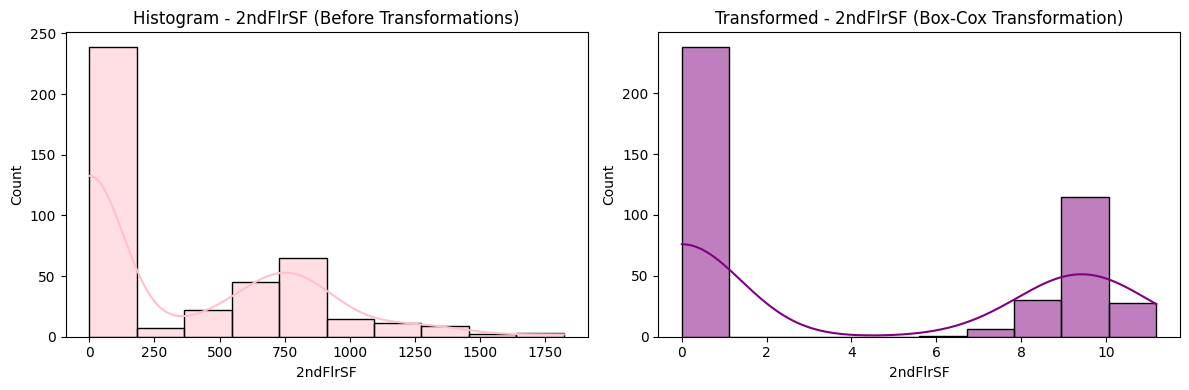

2ndFlrSF: Skewness (Before): 0.9143494652146965, Kurtosis (Before): -0.1822784165525677
2ndFlrSF: Skewness (After): 0.31270695414858546, Kurtosis (After): -1.8620703017630997


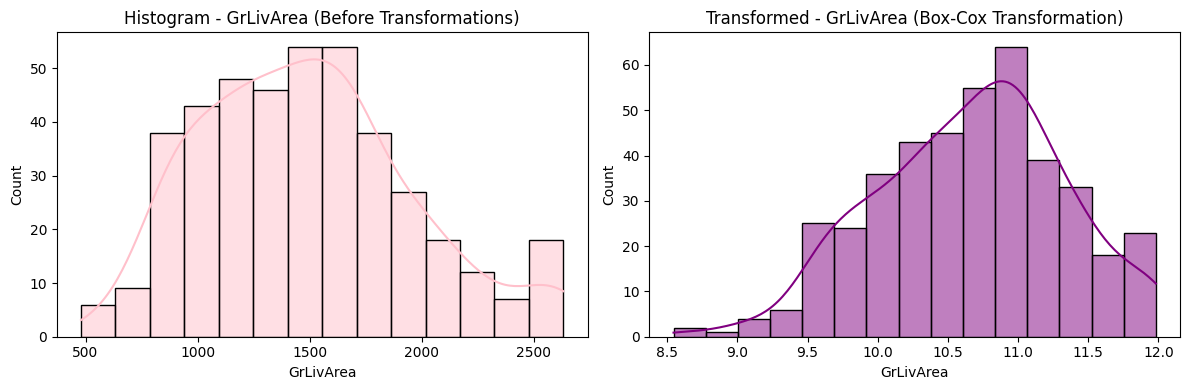

GrLivArea: Skewness (Before): 0.47029880823624015, Kurtosis (Before): -0.20774292126888838
GrLivArea: Skewness (After): -0.21129369075552995, Kurtosis (After): -0.30449292449285936


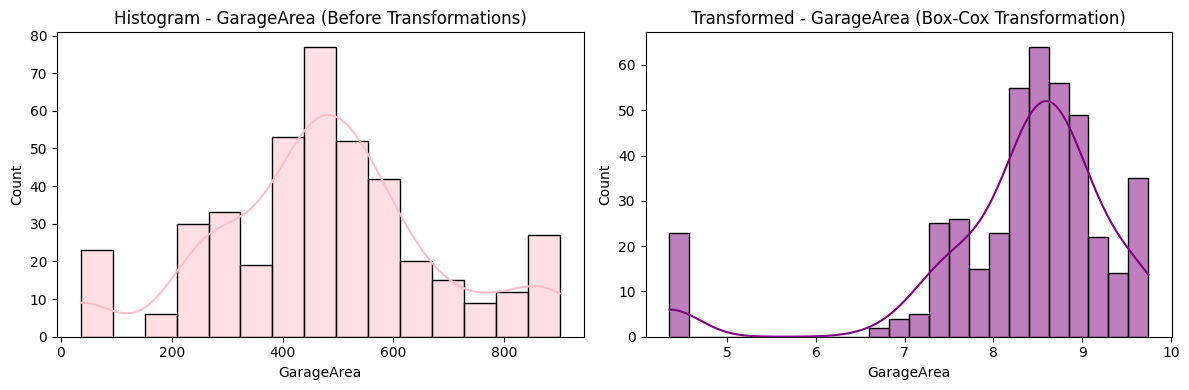

GarageArea: Skewness (Before): 0.03268235779506, Kurtosis (Before): 0.12644272379382038
GarageArea: Skewness (After): -2.067965582805095, Kurtosis (After): 4.945456603793631


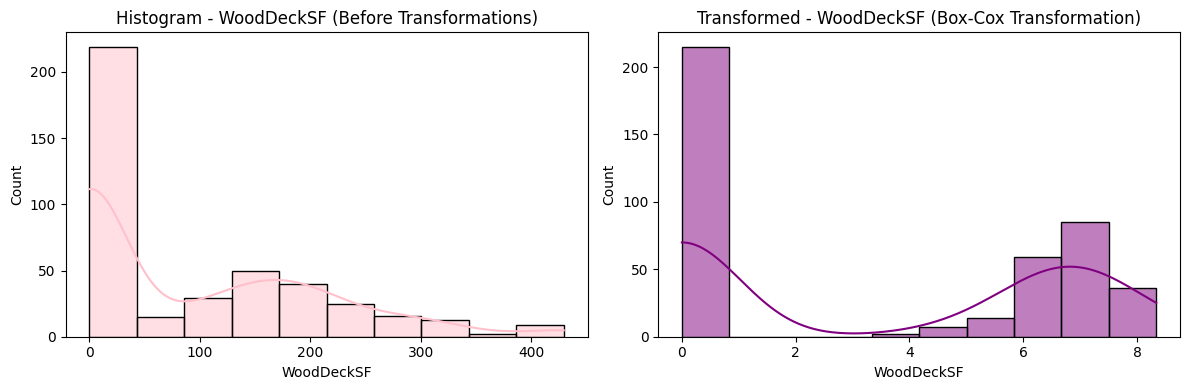

WoodDeckSF: Skewness (Before): 0.9824208902693663, Kurtosis (Before): 0.08884778962108175
WoodDeckSF: Skewness (After): 0.1418752157500762, Kurtosis (After): -1.882524583925461


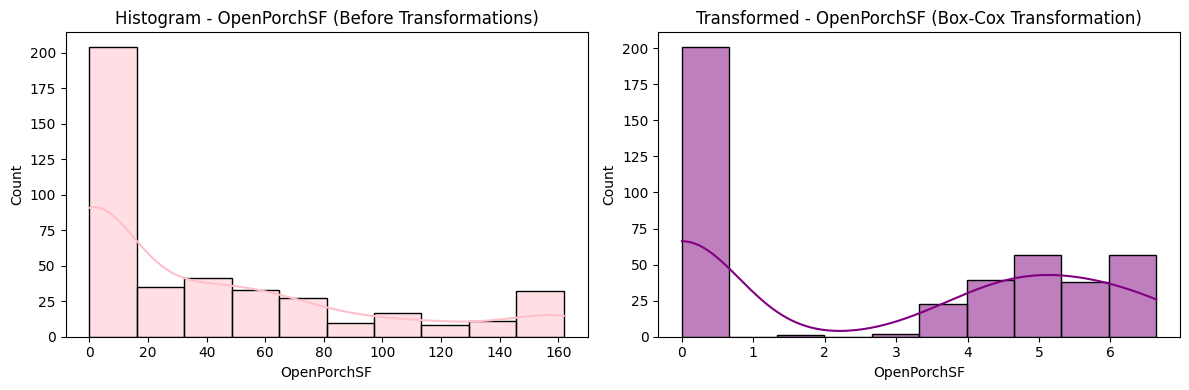

OpenPorchSF: Skewness (Before): 1.1690250849872705, Kurtosis (Before): 0.2118123340075777
OpenPorchSF: Skewness (After): 0.1186021756412411, Kurtosis (After): -1.7651525390244203


In [169]:
# Define a function to apply Box-Cox transformation to specified continuous features
def apply_boxcox_transform_u(df_u):
    # Create a copy of the DataFrame to avoid modifying the original data
    transformed_data_u = df_u.copy()

    # Iterate through each continuous feature in the DataFrame
    for column in df_u[continuous_features_u]:
        # Calculate skewness and kurtosis before applying the transformation
        skewness_before = skew(df_u[column])
        kurt_before = kurtosis(df_u[column])

        # Apply Box-Cox Transformation with a lambda parameter of 0.1
        transformed_data_u[column] = boxcox1p(df_u[column], 0.1)

        # Calculate skewness and kurtosis after applying the transformation
        skewness_after = skew(transformed_data_u[column])
        kurt_after = kurtosis(transformed_data_u[column])

        # Visualization: Create a side-by-side histogram comparison before and after transformation
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

        # Plot the histogram of the original data
        sns.histplot(df_u[column], ax=axes[0], kde=True, color='pink')
        axes[0].set_title(f'Histogram - {column} (Before Transformations)')

        # Plot the histogram of the transformed data
        sns.histplot(transformed_data_u[column], ax=axes[1], kde=True, color='purple')
        axes[1].set_title(f'Transformed - {column} (Box-Cox Transformation)')

        # Adjust layout for better visualization
        plt.tight_layout()
        plt.show()

        # Print skewness and kurtosis information before and after transformation
        print(f"{column}: Skewness (Before): {skewness_before}, Kurtosis (Before): {kurt_before}")
        print(f"{column}: Skewness (After): {skewness_after}, Kurtosis (After): {kurt_after}")

    # Return the DataFrame with Box-Cox transformed data
    return transformed_data_u

# Apply the Box-Cox transformation to the training DataFrame
df_transformed_boxcox_u = apply_boxcox_transform_u(df_u)

In [170]:
# Selecting numerical features from the DataFrame df_transformed_boxcox_u
numerical_features_u = [feature for feature in df_transformed_boxcox_u.columns if df_transformed_boxcox_u[feature].dtypes != 'O']

# Counting the number of numerical features
num_numerical_features_u = len(numerical_features_u)

# Printing the number of numerical features
print("Number of numerical features in the test dataset: ", num_numerical_features_u)

Number of numerical features in the test dataset:  79


In [171]:
# Creating a new DataFrame df_unseen_new with only numerical features
df_unseen_new = df_transformed_boxcox_u[numerical_features_u]

# Displaying the new DataFrame containing only numerical features
df_unseen_new.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,new_Street,new_CentralAir,new_LotShape,new_LandContour,new_LandSlope,new_ExterQual,new_ExterCond,new_BsmtQual,new_BsmtCond,new_BsmtExposure,new_BsmtFinType1,new_BsmtFinType2,new_HeatingQC,new_KitchenQual,new_Functional,new_FireplaceQu,new_GarageFinish,new_GarageQual,new_GarageCond,new_PavedDrive,new_PoolQC,new_Utilities,new_Fence,new_MSSubClass,new_MSZoning,new_Alley,new_LotConfig,new_Neighborhood,new_Condition1,new_Condition2,new_BldgType,new_HouseStyle,new_RoofStyle,new_RoofMatl,new_Exterior1st,new_Exterior2nd,new_MasVnrType,new_Foundation,new_Heating,new_Electrical,new_GarageType,new_MiscFeature,new_SaleType,new_SaleCondition
0,4.228132,12.401839,7,5,2004,2005,0.000000,0.000000,0.0,8.962144,8.962144,8.962144,8.962144,0,10.321432,0,0,2,1,2,1,4,0,2004.0,2,8.544473,0.000000,6.641231,0.0,0,0.0,0,0,6,2010,1,1,4,4,1,4,3,4,3,1,1,1,5,4,7,0,2,3,3,3,0,4,4,1,1,2,4,21,2,2,4,4,1,0,5,8,2,2,0,2,5,1,7,4
1,5.315312,14.684998,6,5,1966,1966,0.000000,6.881685,0.0,0.000000,9.548605,9.774004,0.000000,0,9.774004,1,0,1,0,3,1,6,0,1990.0,1,7.306199,0.000000,0.000000,0.0,0,0.0,0,0,5,2007,1,1,4,4,1,3,3,3,3,4,2,3,4,3,7,0,1,3,3,3,0,4,4,13,3,1,4,19,2,2,0,5,1,0,8,12,2,1,0,2,5,1,7,4
2,5.700162,15.416245,9,5,2002,2002,7.117699,10.069224,0.0,8.855360,10.947816,11.001274,0.000000,0,11.001274,1,0,2,0,3,1,7,1,2002.0,3,9.261741,7.424566,4.664788,0.0,0,0.0,0,0,7,2007,1,1,3,4,1,4,3,4,3,3,6,1,5,4,7,3,3,3,3,3,0,4,4,4,3,1,0,5,2,2,0,2,3,0,8,12,3,2,0,2,1,1,7,4
3,5.336747,14.911643,5,5,1963,1963,0.000000,3.851517,0.0,7.355821,10.224628,10.224628,0.000000,0,10.224628,1,0,1,1,3,1,6,0,1962.0,1,7.896289,0.000000,5.665310,0.0,0,0.0,0,0,8,2008,1,1,4,4,1,3,3,3,3,1,4,3,3,3,7,0,1,3,3,3,0,4,4,4,3,1,4,12,2,2,0,2,1,0,4,6,2,1,0,2,5,1,0,4
4,5.682823,15.504551,7,5,2004,2004,0.000000,0.000000,0.0,9.656234,9.656234,9.656234,9.656234,0,11.065806,0,0,2,1,3,1,7,0,2004.0,2,8.848710,0.000000,5.315312,0.0,0,0.0,0,0,8,2006,1,1,3,4,1,4,3,4,3,1,1,1,5,4,7,0,2,3,3,3,0,4,4,9,3,1,0,5,2,2,0,4,1,0,8,12,2,2,0,2,1,1,7,4


# Regression Algorithms (ML)

In [172]:
# import optuna
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.svm import SVR
# from sklearn.metrics import mean_absolute_error, r2_score

Splitting the dataset into the Training set and Test set

In [173]:
X = df_train_new.iloc[:, :-1].values
y = df_train_new.iloc[:, -1].values

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [175]:
# from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# import optuna

# # Define model names and models
# models = {
#     "SVR": SVR,
#     "DecisionTree": DecisionTreeRegressor,
#     "RandomForest": RandomForestRegressor,
#     "XGBoost": XGBRegressor
# }

# def objective(trial, model_name, X_train, y_train, X_test, y_test):
#     # Define hyperparameter ranges for each model
#     if model_name == "SVR":
#         params = {
#             'C': trial.suggest_loguniform('C', 1e-2, 1e2),
#             'epsilon': trial.suggest_loguniform('epsilon', 1e-2, 1e0),
#             'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf'])
#         }
#     elif model_name == "DecisionTree":
#         params = {
#             'max_depth': trial.suggest_int('max_depth', 3, 15),
#             'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
#             'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10)
#         }
#     elif model_name == "RandomForest":
#         params = {
#             'n_estimators': trial.suggest_int('n_estimators', 50, 3000),
#             'max_depth': trial.suggest_int('max_depth', 3, 15),
#             'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
#             'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10)
#         }
#     elif model_name == "XGBoost":
#         params = {
#             'n_estimators': trial.suggest_int('n_estimators', 50, 3000),
#             'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
#             'max_depth': trial.suggest_int('max_depth', 3, 15),
#             'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
#             'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#             'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0)
#         }

#     # Create and train the model
#     model = models[model_name](**params)
#     model.fit(X_train, y_train)

#     # Make predictions
#     y_pred = model.predict(X_test)

#     # Calculate performance metrics
#     mae = mean_absolute_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#     return mae, r2, rmse

# # Find the best hyperparameters with Optuna for each model
# best_params = {}

# for model_name in models.keys():
#     try:
#         # Create a new study for each model
#         study = optuna.create_study(direction='minimize')
#         study.optimize(lambda trial: objective(trial, model_name, X_train, y_train, X_test, y_test), n_trials=100)

#         if len(study.trials) > 0:
#             best_params[model_name] = study.best_params
#             print(f"{model_name} - Best Parameters: {study.best_params}")
#             print(f"{model_name} - Best Value: {study.best_value}")
#             print("\n")
#         else:
#             print(f"{model_name} - No completed trials.\n")

#         # Print the best parameters and performance metrics
#         params = best_params[model_name]
#         model = models[model_name](**params)
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)

#         mae, r2, rmse = mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

#         print(f"{model_name} - Best Parameters: {params}")
#         print(f"{model_name} - Mean Absolute Error: {mae}")
#         print(f"{model_name} - R2 Score: {r2}")
#         print(f"{model_name} - RMSE: {rmse}")
#         print("\n")

#     except Exception as e:
#         print(f"An error occurred: {e}")

As a result of the research of the Optuna library, the best algorithm was XGBoost among the given algorithms.

[W 2023-12-28 22:45:45,378] Trial 39 failed with parameters: {'n_estimators': 1255, 'learning_rate': 0.012848391869459606, 'max_depth': 14, 'min_child_weight': 3, 'subsample': 0.5858067601346064, 'colsample_bytree': 0.5369052635797733} because of the following error: The number of the values 3 did not match the number of the objectives 1.
[W 2023-12-28 22:45:45,378] Trial 39 failed with value (0.008515058568573408, 0.9165258472016841, 0.012148113665171588).

### Training XGBoost on the Training set

In [176]:
# Import the XGBRegressor from the xgboost library
from xgboost.sklearn import XGBRegressor

# Create an instance of XGBRegressor with specified hyperparameters
regressor = XGBRegressor(
    n_estimators=1255,                  # Number of boosting rounds
    learning_rate=0.012848391869459606, # Step size shrinkage to prevent overfitting
    max_depth=14,                       # Maximum depth of a tree
    min_child_weight=3,                 # Minimum sum of instance weight needed in a child
    subsample=0.5858067601346064,       # Subsample ratio of the training instances
    colsample_bytree=0.5369052635797733 # Subsample ratio of columns when constructing each tree
)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5369052635797733, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.012848391869459606, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=14, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1255, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Applying k-Fold Cross Validation 

In [177]:
# Import necessary library for cross-validation
from sklearn.model_selection import cross_val_score

# Use cross_val_score to perform cross-validation on the XGBoost regressor
cv_scores = cross_val_score(
    estimator=regressor,  # The XGBoost regressor model
    X=X_train,            # Training data
    y=y_train,            # Target variable
    cv=10                 # Number of folds for cross-validation
)

# Print the mean R-squared score across all folds
print("Mean R-squared Score:", cv_scores.mean())

# Print the standard deviation of R-squared scores across all folds
print("Standard Deviation of R-squared Scores:", cv_scores.std())

Mean R-squared Score: 0.8649993297294074
Standard Deviation of R-squared Scores: 0.07188952351808388


### Predicting a new result

In [178]:
#Predict the output using test data

# Use the trained XGBoost to make predictions on the test set
# y_pred =np.exp(regressor.predict(X_test))
y_pred = regressor.predict(X_test)

# Print the predicted values
print(y_pred)

[291936.8   206016.03  170152.19  162012.31  291485.25  162375.19
 186144.75  185549.52  172870.14  228480.28  250948.42  173142.3
 106016.945 115219.945 219887.5   149642.67  120536.44  189692.27
 286244.9   145045.25  213114.97  200375.61  221492.53  118411.14
 207886.66  146666.7   158034.38  137668.1   155380.6   167903.86
 278376.    178117.5   133092.14  313789.28  114896.6   171822.89
 157230.62  165202.69  266063.72  185412.64   79124.46  207859.23
 154214.84  150244.25  166034.    150680.33  176487.89   73380.83
 145031.22  171597.9   181667.2   207161.3    93086.164  88154.53
 107487.805 222319.22  166330.81  192466.53  176452.6    81979.84
 170181.31  156690.05  196384.34  367974.62  122097.1   215284.08
 135558.86  144346.3   139568.38  116214.46  304170.97   75888.38
 229120.78  212242.45  432577.    215839.8   279837.06  160864.95
 134925.02  229750.7   128484.8   166333.75  159894.5   354066.53
 185776.19  186626.47   80408.3   249376.3   125709.74  179219.14
 169656.81 

### Evaluating the model

In [179]:
# Evaluating the model

# Import necessary libraries
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f"R2 Score: {r2}")
print(f"RMSE: {rmse}")
print("\n")

Mean Absolute Error (MAE): 16188.03435257177
R2 Score: 0.9089025283618554
RMSE: 24384.369272284202




### Unseen Data

In [180]:
unseen_dataset = df_unseen_new.iloc[:, :].values
unseen_dataset

array([[ 4.2281322 , 12.4018386 ,  7.        , ...,  1.        ,
         7.        ,  4.        ],
       [ 5.31531152, 14.68499812,  6.        , ...,  1.        ,
         7.        ,  4.        ],
       [ 5.7001622 , 15.4162452 ,  9.        , ...,  1.        ,
         7.        ,  4.        ],
       ...,
       [ 5.3788256 , 15.34137743,  4.        , ...,  1.        ,
         7.        ,  4.        ],
       [ 5.9415515 , 16.53859805,  7.        , ...,  1.        ,
         5.        ,  5.        ],
       [ 5.20387861, 14.69965062,  5.        , ...,  1.        ,
         7.        ,  4.        ]])

In [181]:
y_pred_unseen = regressor.predict(unseen_dataset)
y_pred_unseen

array([150707.58 , 116392.75 , 271514.3  , 125774.06 , 186463.61 ,
       134906.62 , 135851.3  , 147612.69 , 245389.33 , 133279.84 ,
       189231.55 , 341862.9  , 207400.47 , 134853.1  , 109082.24 ,
       121404.43 , 257231.78 , 357619.25 , 200985.7  , 160534.34 ,
       123470.766, 135406.16 , 156910.88 ,  82888.82 , 170485.77 ,
       126356.125, 214357.52 , 328808.2  , 271715.78 , 128757.336,
       146277.14 , 146076.25 , 122168.58 ,  82588.13 , 107674.66 ,
       120122.03 , 189543.61 , 169477.8  ,  95407.9  , 177327.03 ,
       163059.05 , 175010.73 , 172484.14 , 192279.81 , 233261.66 ,
        76479.23 , 132201.94 , 231280.03 , 177548.27 , 147836.38 ,
       113565.8  , 193822.69 , 242280.52 , 214309.33 , 196277.9  ,
       166928.48 , 109101.95 , 193524.6  , 133172.23 , 376271.44 ,
       178601.88 , 113700.12 , 206956.58 , 297152.88 , 124503.516,
       321149.1  , 251107.08 , 175062.33 , 109614.02 , 155599.28 ,
       137034.05 , 162942.94 , 201310.83 , 186965.03 , 160493.

In [182]:
y_pred_unseen_df = pd.DataFrame(y_pred_unseen, columns=["SalePrice"])
y_pred_unseen_df.head(10)

,SalePrice
0,150707.578125
1,116392.750000
2,271514.312500
3,125774.062500
4,186463.609375
5,134906.625000
6,135851.296875
7,147612.687500
8,245389.328125
9,133279.843750


In [183]:
y_pred_unseen_df = pd.DataFrame(y_pred_unseen, columns=["SalePrice"])
submission=pd.read_csv("sample_submission2023.csv")
result = pd.concat([submission['index'], y_pred_unseen_df], axis=1)

result.to_csv('submission.csv', index=False)
result

,index,SalePrice
0,1042,150707.578125
1,1043,116392.750000
2,1044,271514.312500
3,1045,125774.062500
4,1046,186463.609375
5,1047,134906.625000
6,1048,135851.296875
7,1049,147612.687500
8,1050,245389.328125
9,1051,133279.843750
